# Capstone Project_Anomaly and Fraud Detection
__________________________________________________________________________________________________________________

### *** Caution >> Should not to run all

***EDA*** >> Please run from topic **"EDA"**

***Cleaning and Prediction*** with Validation set >> Please run from topic **"Cleaning Train & Test Set"**

***Prediction*** with Testing set >> Please run from topic **"Prediction with Test Set"**

***Note:*** Please run the model one by one

# Problem Statement
___________________________________________________________________________________________________________________________

1. Which factors or behavior of fraudulent customer.
2. To classify and predict new transaction automatically.
3. Which models are the best efficient to predict fraud.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime

from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,plot_confusion_matrix, average_precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import collections
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from scipy.stats import rankdata

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.decomposition import PCA


%matplotlib inline
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'

# Import Data

In [2]:
df_train_tran = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
df_train_id = pd.read_csv('ieee-fraud-detection/train_identity.csv')

In [3]:
df_test_tran = pd.read_csv('ieee-fraud-detection/test_transaction.csv')
df_test_id = pd.read_csv('ieee-fraud-detection/test_identity.csv')

In [4]:
df_train_tran.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [5]:
df_train_tran.shape

(590540, 394)

In [6]:
df_train_id.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

In [7]:
df_train_id.shape

(144233, 41)

In [8]:
train = pd.merge(df_train_tran, df_train_id, on='TransactionID', how='left')

In [9]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 434 columns]

In [10]:
train.shape

(590540, 434)

In [134]:
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
train['TransactionDT_New'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
#test['TransactionDT'] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
train[['TransactionDT_New']]

TransactionDT_New
0      2017-12-02 00:00:00
1      2017-12-02 00:00:01
2      2017-12-02 00:01:09
3      2017-12-02 00:01:39
4      2017-12-02 00:01:46
...                    ...
590535 2018-06-01 23:57:27
590536 2018-06-01 23:57:29
590537 2018-06-01 23:57:59
590538 2018-06-01 23:58:08
590539 2018-06-01 23:58:51

[590540 rows x 1 columns]

In [11]:
list(train.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

# EDA

**Data Description**
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Due to this data has many features so, I will use some feature for exploring the data.

**Features >> TransactionAmt, ProductCD, card1-card6, P_emaildomain, DeviceType**

**Class >> isFraud**
__________________________________________________________________________________________

Imbalance data :
- Fraud = 3.5%
- Not Fraud = 96.5%

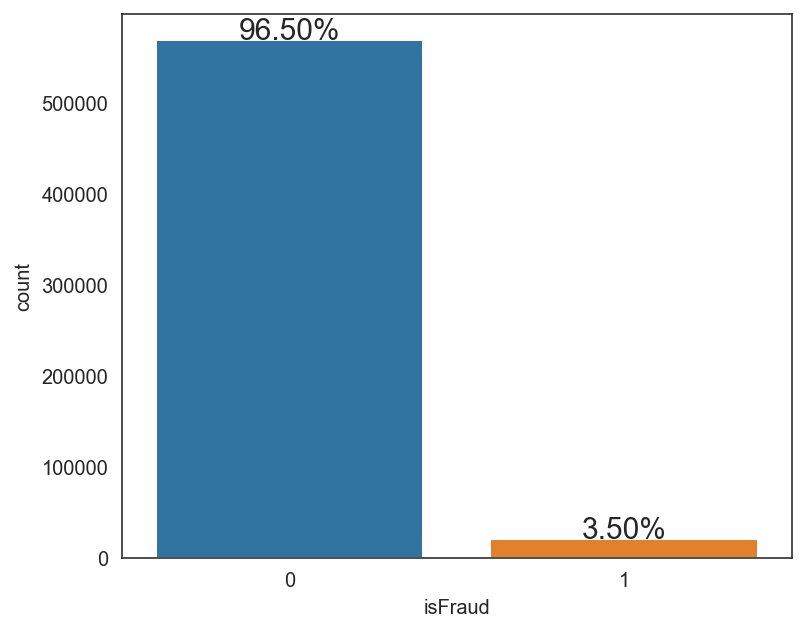

In [12]:
plt.figure(figsize=(6,5))
total = len(train)
total_amt = train.groupby(['isFraud'])['TransactionAmt'].sum().sum()
g = sns.countplot(x='isFraud', data=train)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

## TransactionAmt

In [13]:
train['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99])

0.010       9.2440
0.025      14.5010
0.100      25.9500
0.250      43.3210
0.500      68.7690
0.750     125.0000
0.900     275.2930
0.975     648.3345
0.990    1104.0000
Name: TransactionAmt, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 16.0, 'TransactionAmt')

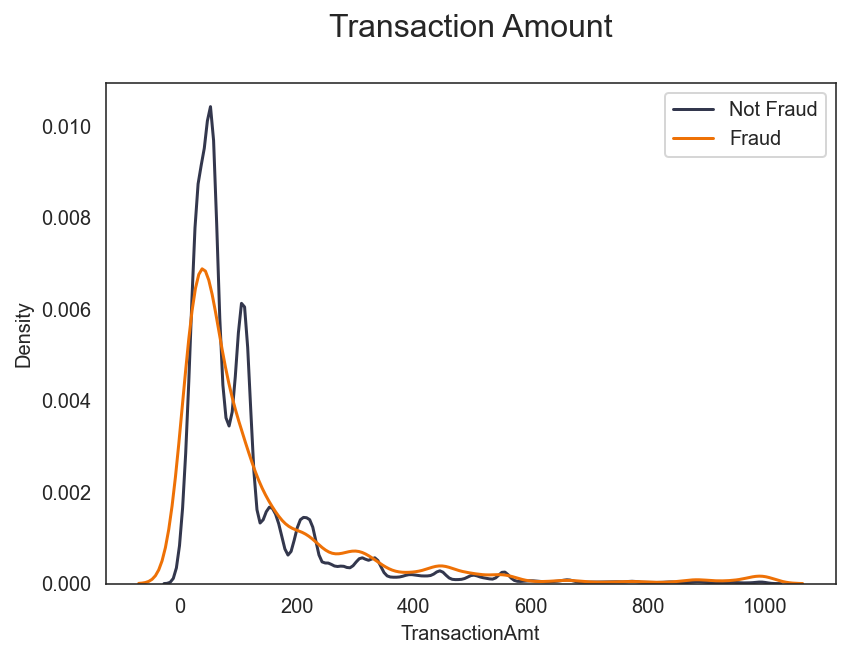

In [221]:
### Plot the distribution of TransactionAmt

sns.distplot(x = train[['isFraud','TransactionAmt']]['TransactionAmt'].loc[(train['isFraud'] == 0) & (train['TransactionAmt'] < 1000)], color='#33374d', hist=False, label = 'Not Fraud')
sns.distplot(x = train[['isFraud','TransactionAmt']]['TransactionAmt'].loc[(train['isFraud'] == 1) & (train['TransactionAmt'] < 1000)], color='#ee7106', hist=False, label = 'Fraud')
plt.tight_layout()
plt.legend()
plt.title('Transaction Amount\n', fontsize= 16)
plt.xlabel('TransactionAmt')


## ProductCD

In [15]:
prod = pd.crosstab(train['ProductCD'], train['isFraud'])
prod = prod.reset_index()
prod.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
prod

isFraud ProductCD  NoFraud  Fraud
0               C    60511   8008
1               H    31450   1574
2               R    36273   1426
3               S    10942    686
4               W   430701   8969

In [16]:
### Normalize

prod = pd.crosstab(train['ProductCD'], train['isFraud'], normalize = 'index') * 100
prod = prod.reset_index()
prod.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
prod

isFraud ProductCD    NoFraud      Fraud
0               C  88.312731  11.687269
1               H  95.233769   4.766231
2               R  96.217406   3.782594
3               S  94.100447   5.899553
4               W  97.960061   2.039939

Text(0, 0.5, '%Fraud')

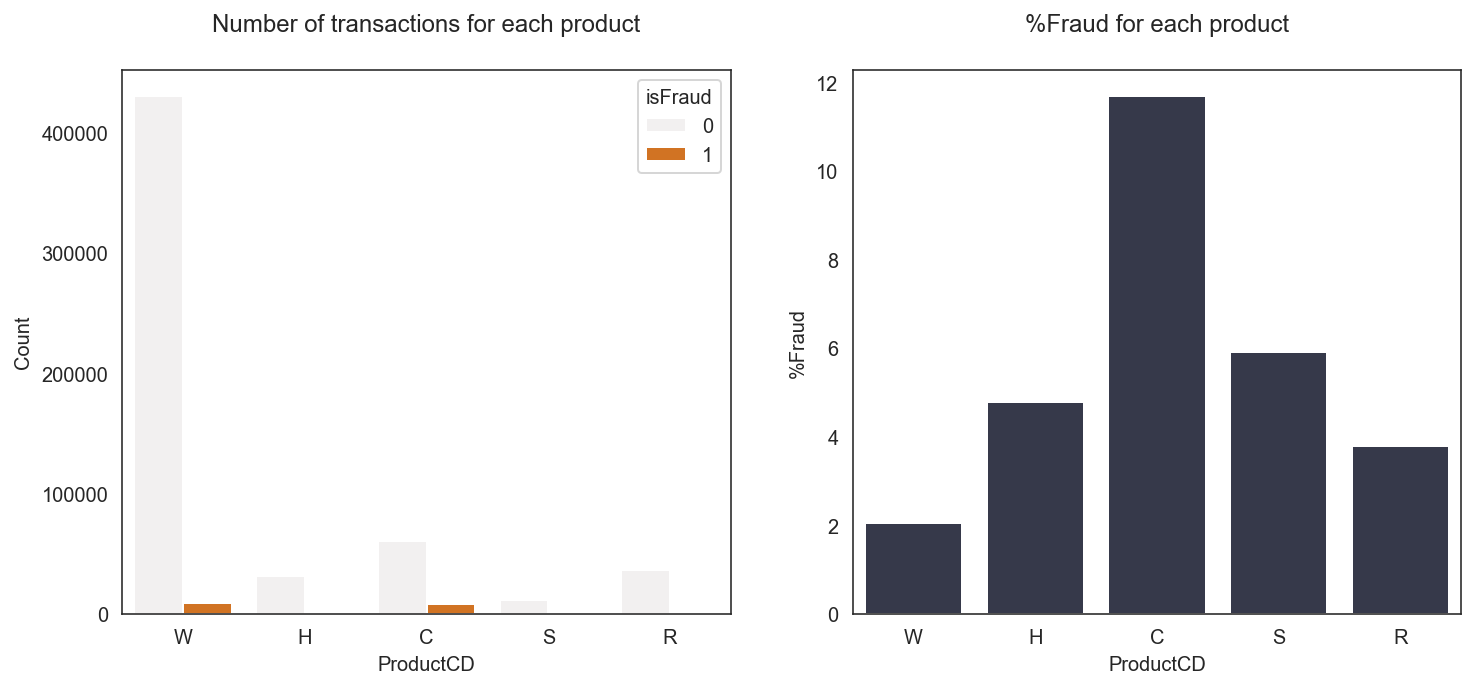

In [18]:
### Plot %fraud & total of transactions for each product

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1 = sns.countplot(x='ProductCD',data = train, hue='isFraud', color = '#ee7106', ax = ax1)
ax2 = sns.barplot(x='ProductCD', y ='Fraud',data = prod, color = '#33374d', order=['W', 'H',"C", "S", "R"], ax = ax2)
ax1.set_title('Number of transactions for each product\n');
ax1.set_xlabel('ProductCD')
ax1.set_ylabel('Count')
ax2.set_title('%Fraud for each product\n');
ax2.set_xlabel('ProductCD')
ax2.set_ylabel('%Fraud')

Text(0.5, 1.0, 'ProductCD\n')

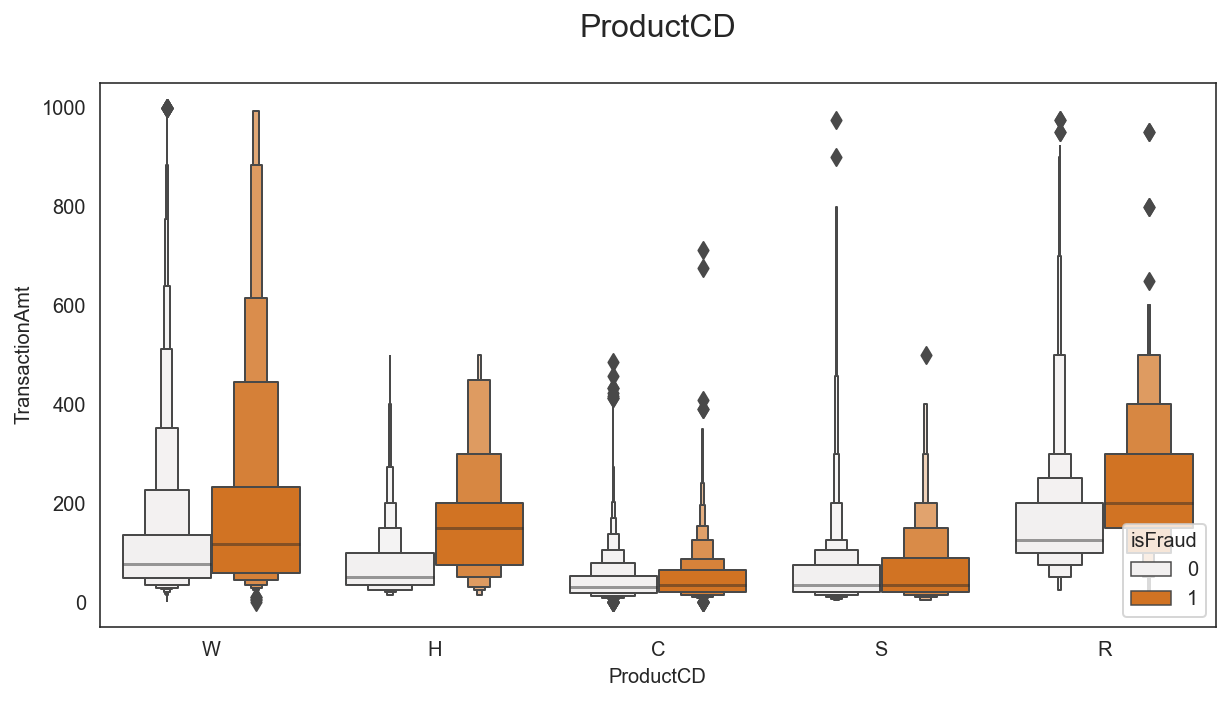

In [189]:
###Behavior of customer by transaction amount of ProductCD

plt.figure(figsize=(10,5))
sns.boxenplot(x = 'ProductCD', y = 'TransactionAmt', hue = 'isFraud', data = train[train['TransactionAmt'] < 1000], color = '#ee7106')
plt.title('ProductCD\n',fontsize=16)

In [19]:
### Product C

prod2 = train[['ProductCD','TransactionAmt','isFraud']]
prod_c = prod2[prod2['ProductCD'] == 'C'].reset_index(drop=True).reset_index().drop(columns = ['ProductCD']).sort_values(by='isFraud')
prod_c

index  TransactionAmt  isFraud
0          0          75.887        0
43936  43936          54.136        0
43937  43937          21.147        0
43938  43938          17.159        0
43939  43939           3.747        0
...      ...             ...      ...
24717  24717          32.356        1
40116  40116          18.851        1
58097  58097          15.247        1
24655  24655          89.024        1
8786    8786         265.498        1

[68519 rows x 3 columns]

In [22]:
### Product H

prod2 = train[['ProductCD','TransactionAmt','isFraud']]
prod_h = prod2[prod2['ProductCD'] == 'H'].reset_index(drop=True).reset_index().drop(columns = ['ProductCD']).sort_values(by='isFraud')
prod_h

index  TransactionAmt  isFraud
0          0            50.0        0
21284  21284            25.0        0
21283  21283            25.0        0
21282  21282           100.0        0
21280  21280            40.0        0
...      ...             ...      ...
30669  30669           100.0        1
30670  30670           100.0        1
30671  30671           100.0        1
23083  23083           200.0        1
4468    4468           300.0        1

[33024 rows x 3 columns]

In [25]:
### Product R

prod2 = train[['ProductCD','TransactionAmt','isFraud']]
prod_r = prod2[prod2['ProductCD'] == 'R'].reset_index(drop=True).reset_index().drop(columns = ['ProductCD']).sort_values(by='isFraud')
prod_r

index  TransactionAmt  isFraud
0          0            75.0        0
24818  24818           300.0        0
24817  24817            50.0        0
24816  24816           250.0        0
24815  24815           200.0        0
...      ...             ...      ...
26747  26747           225.0        1
8660    8660           200.0        1
19140  19140           250.0        1
20505  20505           300.0        1
22668  22668           300.0        1

[37699 rows x 3 columns]

In [28]:
### Product S

prod2 = train[['ProductCD','TransactionAmt','isFraud']]
prod_s = prod2[prod2['ProductCD'] == 'S'].reset_index(drop=True).reset_index().drop(columns = ['ProductCD']).sort_values(by='isFraud')
prod_s

index  TransactionAmt  isFraud
0         0            25.0        0
7650   7650           100.0        0
7651   7651            25.0        0
7652   7652            75.0        0
7653   7653            10.0        0
...     ...             ...      ...
4497   4497            75.0        1
6848   6848            35.0        1
6835   6835            90.0        1
6917   6917            65.0        1
8629   8629            26.0        1

[11628 rows x 3 columns]

In [31]:
### Product W

prod2 = train[['ProductCD','TransactionAmt','isFraud']]
prod_w = prod2[prod2['ProductCD'] == 'W'].reset_index(drop=True).reset_index().drop(columns = ['ProductCD']).sort_values(by='isFraud')
prod_w = prod_w[prod_w['TransactionAmt'] < 10000]
prod_w

index  TransactionAmt  isFraud
0            0           68.50        0
291694  291694          179.95        0
291693  291693           59.00        0
291692  291692          107.95        0
291691  291691           28.95        0
...        ...             ...      ...
132278  132278           77.00        1
119659  119659           59.00        1
49409    49409           49.00        1
49399    49399           24.00        1
368390  368390          171.00        1

[439668 rows x 3 columns]

## Card 1-6

- Card 1, 2, 3 and 5 are numerical data
- Card 4 and 6 are categorical data
- Card 4 >> Discover, Mastercard, Visa and American Express
- Card 6 >> Credit, Debit

In [34]:
cards = train[['card1','card2','card3','card4','card5','card6','TransactionAmt','isFraud']]
cards

card1  card2  card3       card4  card5   card6  TransactionAmt  \
0       13926    NaN  150.0    discover  142.0  credit           68.50   
1        2755  404.0  150.0  mastercard  102.0  credit           29.00   
2        4663  490.0  150.0        visa  166.0   debit           59.00   
3       18132  567.0  150.0  mastercard  117.0   debit           50.00   
4        4497  514.0  150.0  mastercard  102.0  credit           50.00   
...       ...    ...    ...         ...    ...     ...             ...   
590535   6550    NaN  150.0        visa  226.0   debit           49.00   
590536  10444  225.0  150.0  mastercard  224.0   debit           39.50   
590537  12037  595.0  150.0  mastercard  224.0   debit           30.95   
590538   7826  481.0  150.0  mastercard  224.0   debit          117.00   
590539  15066  170.0  150.0  mastercard  102.0  credit          279.95   

        isFraud  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
590535        0  
590536        0  
590537        0  
590538        0  
590539        0  

[590540 rows x 8 columns]

In [35]:
cards.dtypes

card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
TransactionAmt    float64
isFraud             int64
dtype: object

### Card1

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 16.0, 'Transaction of Card 1')

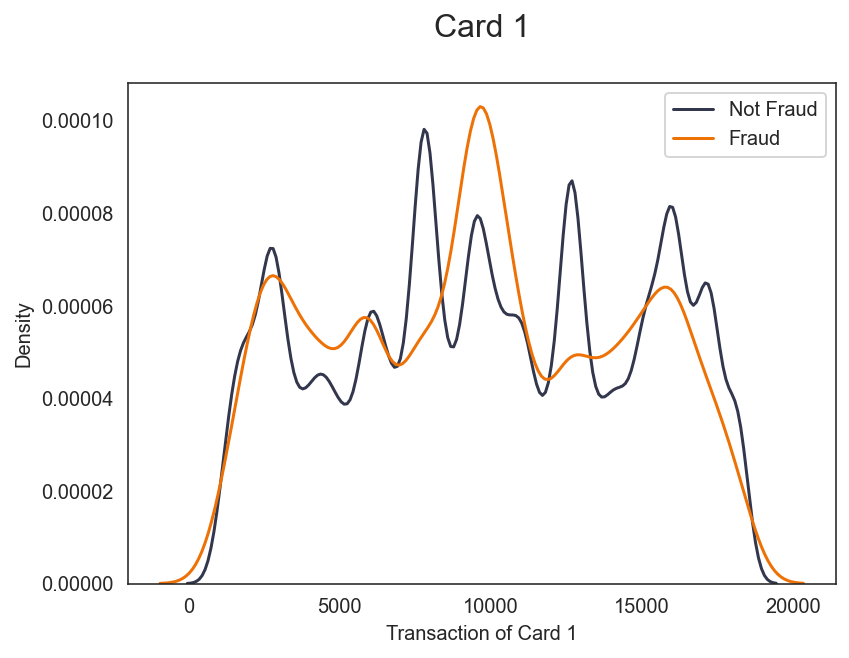

In [214]:
### Plot the distribution of Card 1

sns.distplot(x = cards[['isFraud','card1']]['card1'].loc[cards['isFraud'] == 0], color='#33374d', hist=False, label = 'Not Fraud')
sns.distplot(x = cards[['isFraud','card1']]['card1'].loc[cards['isFraud'] == 1], color='#ee7106', hist=False, label = 'Fraud')
plt.tight_layout()
plt.legend()
plt.title('Card 1\n', fontsize= 16)
plt.xlabel('Transaction of Card 1')

In [37]:
card1 = cards[['card1','TransactionAmt','isFraud']]
card1 = card1.reset_index(drop=True).sort_values(by='isFraud')
card1['color'] = card1['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
card1 = card1[card1['TransactionAmt'] < 10000]
card1

card1  TransactionAmt  isFraud    color
0       13926          68.500        0  #e5e5e5
390062  11757          47.950        0  #e5e5e5
390060   2884          25.950        0  #e5e5e5
390059   6697         100.000        0  #e5e5e5
390058   7207         210.950        0  #e5e5e5
...       ...             ...      ...      ...
415021   9500         150.000        1  #ee7106
231999  14649          59.000        1  #ee7106
199476   9500        2680.000        1  #ee7106
313705   3821         994.000        1  #ee7106
80060    9633          76.023        1  #ee7106

[590538 rows x 4 columns]

### Card2

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 16.0, 'Transaction of Card 2')

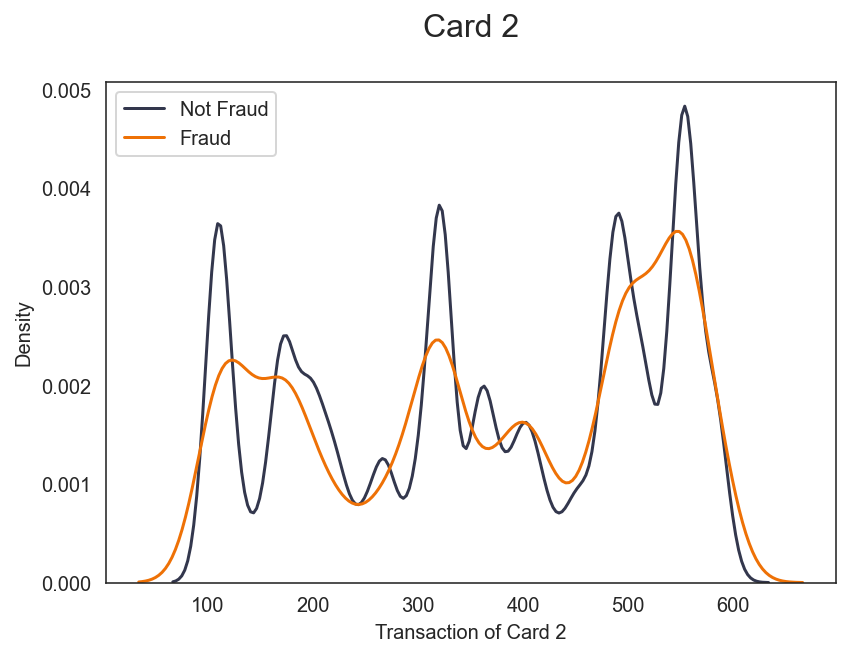

In [213]:
### Plot the distribution of Card 2

sns.distplot(x = cards[['isFraud','card2']]['card2'].loc[cards['isFraud'] == 0], color='#33374d', hist=False, label = 'Not Fraud')
sns.distplot(x = cards[['isFraud','card2']]['card2'].loc[cards['isFraud'] == 1], color='#ee7106', hist=False, label = 'Fraud')
plt.tight_layout()
plt.legend()
plt.title('Card 2\n', fontsize= 16)
plt.xlabel('Transaction of Card 2')

In [41]:
card2 = cards[['card2','TransactionAmt','isFraud']]
card2 = card2.reset_index(drop=True).sort_values(by='isFraud')
card2['color'] = card2['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
card2 = card2[card2['TransactionAmt'] < 10000]
card2 = card2.dropna()
card2

card2  TransactionAmt  isFraud    color
390062  555.0          47.950        0  #e5e5e5
390060  490.0          25.950        0  #e5e5e5
390059  111.0         100.000        0  #e5e5e5
390058  111.0         210.950        0  #e5e5e5
390057  321.0          15.950        0  #e5e5e5
...       ...             ...      ...      ...
415021  321.0         150.000        1  #ee7106
231999  548.0          59.000        1  #ee7106
199476  321.0        2680.000        1  #ee7106
313705  111.0         994.000        1  #ee7106
80060   296.0          76.023        1  #ee7106

[581605 rows x 4 columns]

In [42]:
card22 = pd.crosstab(cards['card2'], cards['isFraud'], normalize = 'index') *100
card22 = card22.reset_index()
card22 = card22.rename(columns={0:'NoFraud', 1:'Fraud'})
card22

isFraud  card2     NoFraud      Fraud
0        100.0   98.718626   1.281374
1        101.0  100.000000   0.000000
2        102.0  100.000000   0.000000
3        103.0   90.051903   9.948097
4        104.0   75.198939  24.801061
..         ...         ...        ...
495      596.0  100.000000   0.000000
496      597.0  100.000000   0.000000
497      598.0  100.000000   0.000000
498      599.0   99.255583   0.744417
499      600.0   98.453608   1.546392

[500 rows x 3 columns]

In [45]:
### Due to this data (card2) likely high variance so, it doesn't suitable for plotting as the graph below

card2['card2'].value_counts(normalize=True)

321.0    0.084138
111.0    0.077701
555.0    0.072205
490.0    0.065586
583.0    0.037488
           ...   
388.0    0.000067
153.0    0.000065
557.0    0.000064
473.0    0.000031
582.0    0.000024
Name: card2, Length: 500, dtype: float64

Text(0, 0.5, '%Fraud')

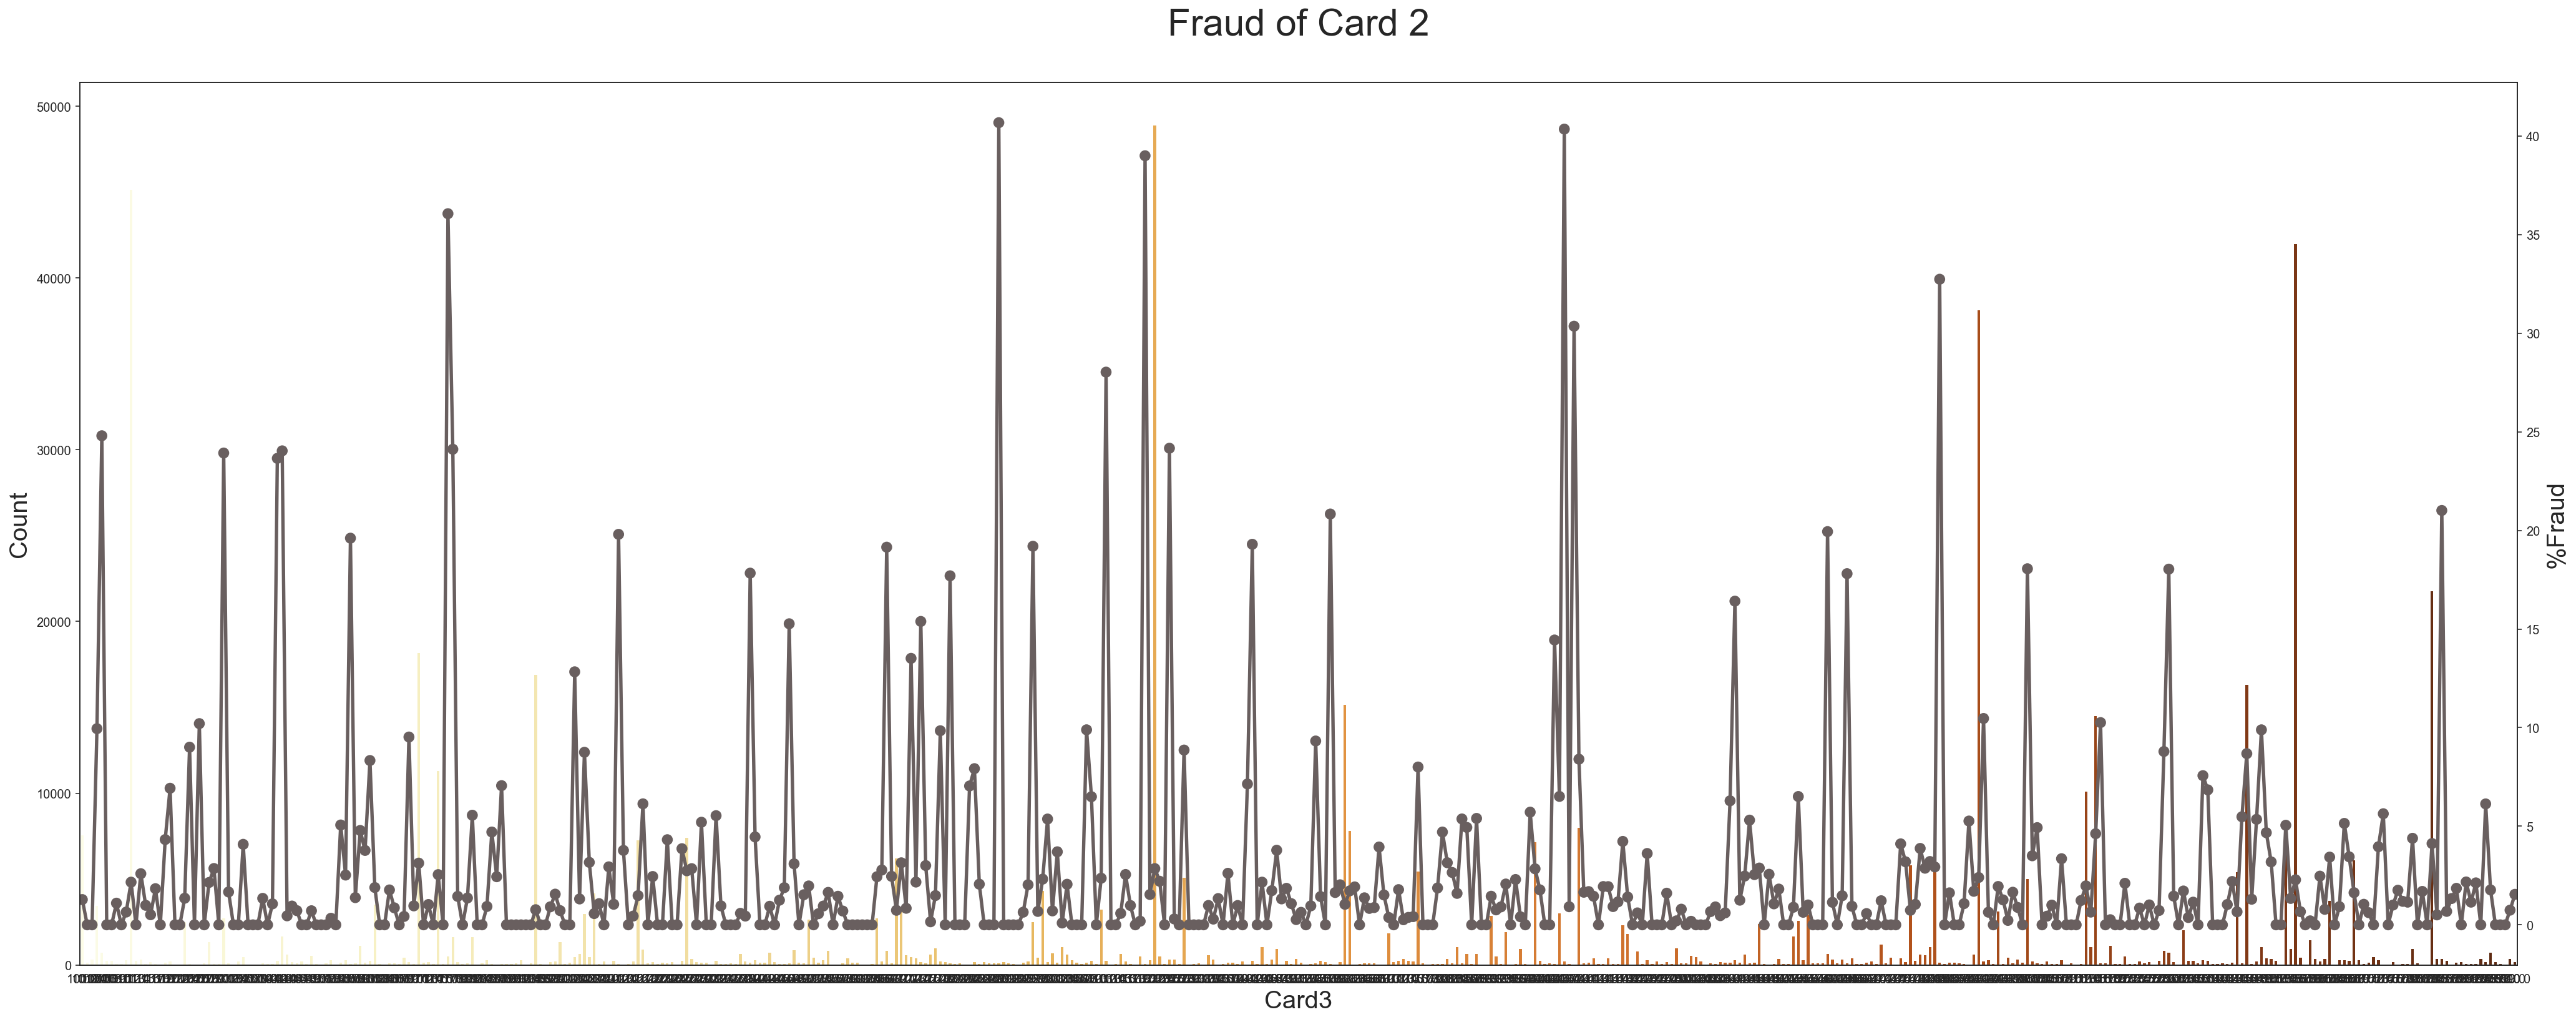

In [46]:
### Checking %fraud for each transaction

plt.figure(figsize = (35,13))
g2 = sns.countplot(x = 'card2', data = card2, palette='YlOrBr')
g22 = g2.twinx()
g22 = sns.pointplot(x = 'card2', y = 'Fraud', data = card22, color = '#695f5f')
plt.title('Fraud of Card 2\n',fontsize=30)
g2.set_xlabel('Card3', fontsize=20)
g2.set_ylabel('Count', fontsize=20)
g22.set_ylabel('%Fraud', fontsize=20)

### Card 3

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 16.0, 'Transaction of Card 3')

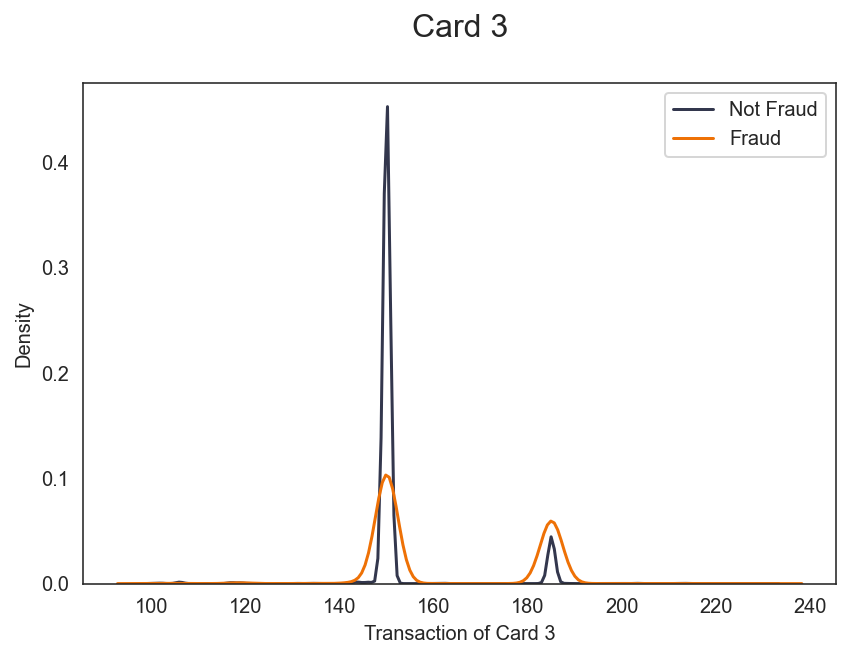

In [216]:
### Plot the distribution of Card 3

sns.distplot(x = cards[['isFraud','card3']]['card3'].loc[cards['isFraud'] == 0], color='#33374d', hist=False, label = 'Not Fraud')
sns.distplot(x = cards[['isFraud','card3']]['card3'].loc[cards['isFraud'] == 1], color='#ee7106', hist=False, label = 'Fraud')
plt.tight_layout()
plt.legend()
plt.title('Card 3\n', fontsize=16)
plt.xlabel('Transaction of Card 3')

In [48]:
card3 = cards[['card3','TransactionAmt','isFraud']]
card3 = card3.reset_index(drop=True).sort_values(by='isFraud')
card3['color'] = card3['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
card3 = card3[card3['TransactionAmt'] < 10000]
card3 = card3.dropna()
card3

card3  TransactionAmt  isFraud    color
0       150.0          68.500        0  #e5e5e5
390062  150.0          47.950        0  #e5e5e5
390060  150.0          25.950        0  #e5e5e5
390059  150.0         100.000        0  #e5e5e5
390058  150.0         210.950        0  #e5e5e5
...       ...             ...      ...      ...
415021  150.0         150.000        1  #ee7106
231999  150.0          59.000        1  #ee7106
199476  150.0        2680.000        1  #ee7106
313705  150.0         994.000        1  #ee7106
80060   185.0          76.023        1  #ee7106

[588973 rows x 4 columns]

In [49]:
card33 = pd.crosstab(cards['card3'], cards['isFraud'], normalize = 'index') *100
card33 = card33.reset_index()
card33 = card33.rename(columns={0:'NoFraud', 1:'Fraud'})
card33

isFraud  card3     NoFraud      Fraud
0        100.0   95.049505   4.950495
1        101.0  100.000000   0.000000
2        102.0   97.608696   2.391304
3        105.0  100.000000   0.000000
4        106.0   98.472311   1.527689
..         ...         ...        ...
109      226.0  100.000000   0.000000
110      227.0  100.000000   0.000000
111      228.0  100.000000   0.000000
112      229.0   99.152542   0.847458
113      231.0   83.333333  16.666667

[114 rows x 3 columns]

In [52]:
### This data has low variance so it suitable for plotting to look for percentage of fraud per card3

card3['card3'].value_counts(normalize=True)

150.0    0.885075
185.0    0.095668
106.0    0.002667
144.0    0.002126
146.0    0.002126
           ...   
101.0    0.000002
170.0    0.000002
125.0    0.000002
172.0    0.000002
209.0    0.000002
Name: card3, Length: 114, dtype: float64

Text(0, 0.5, '%Fraud')

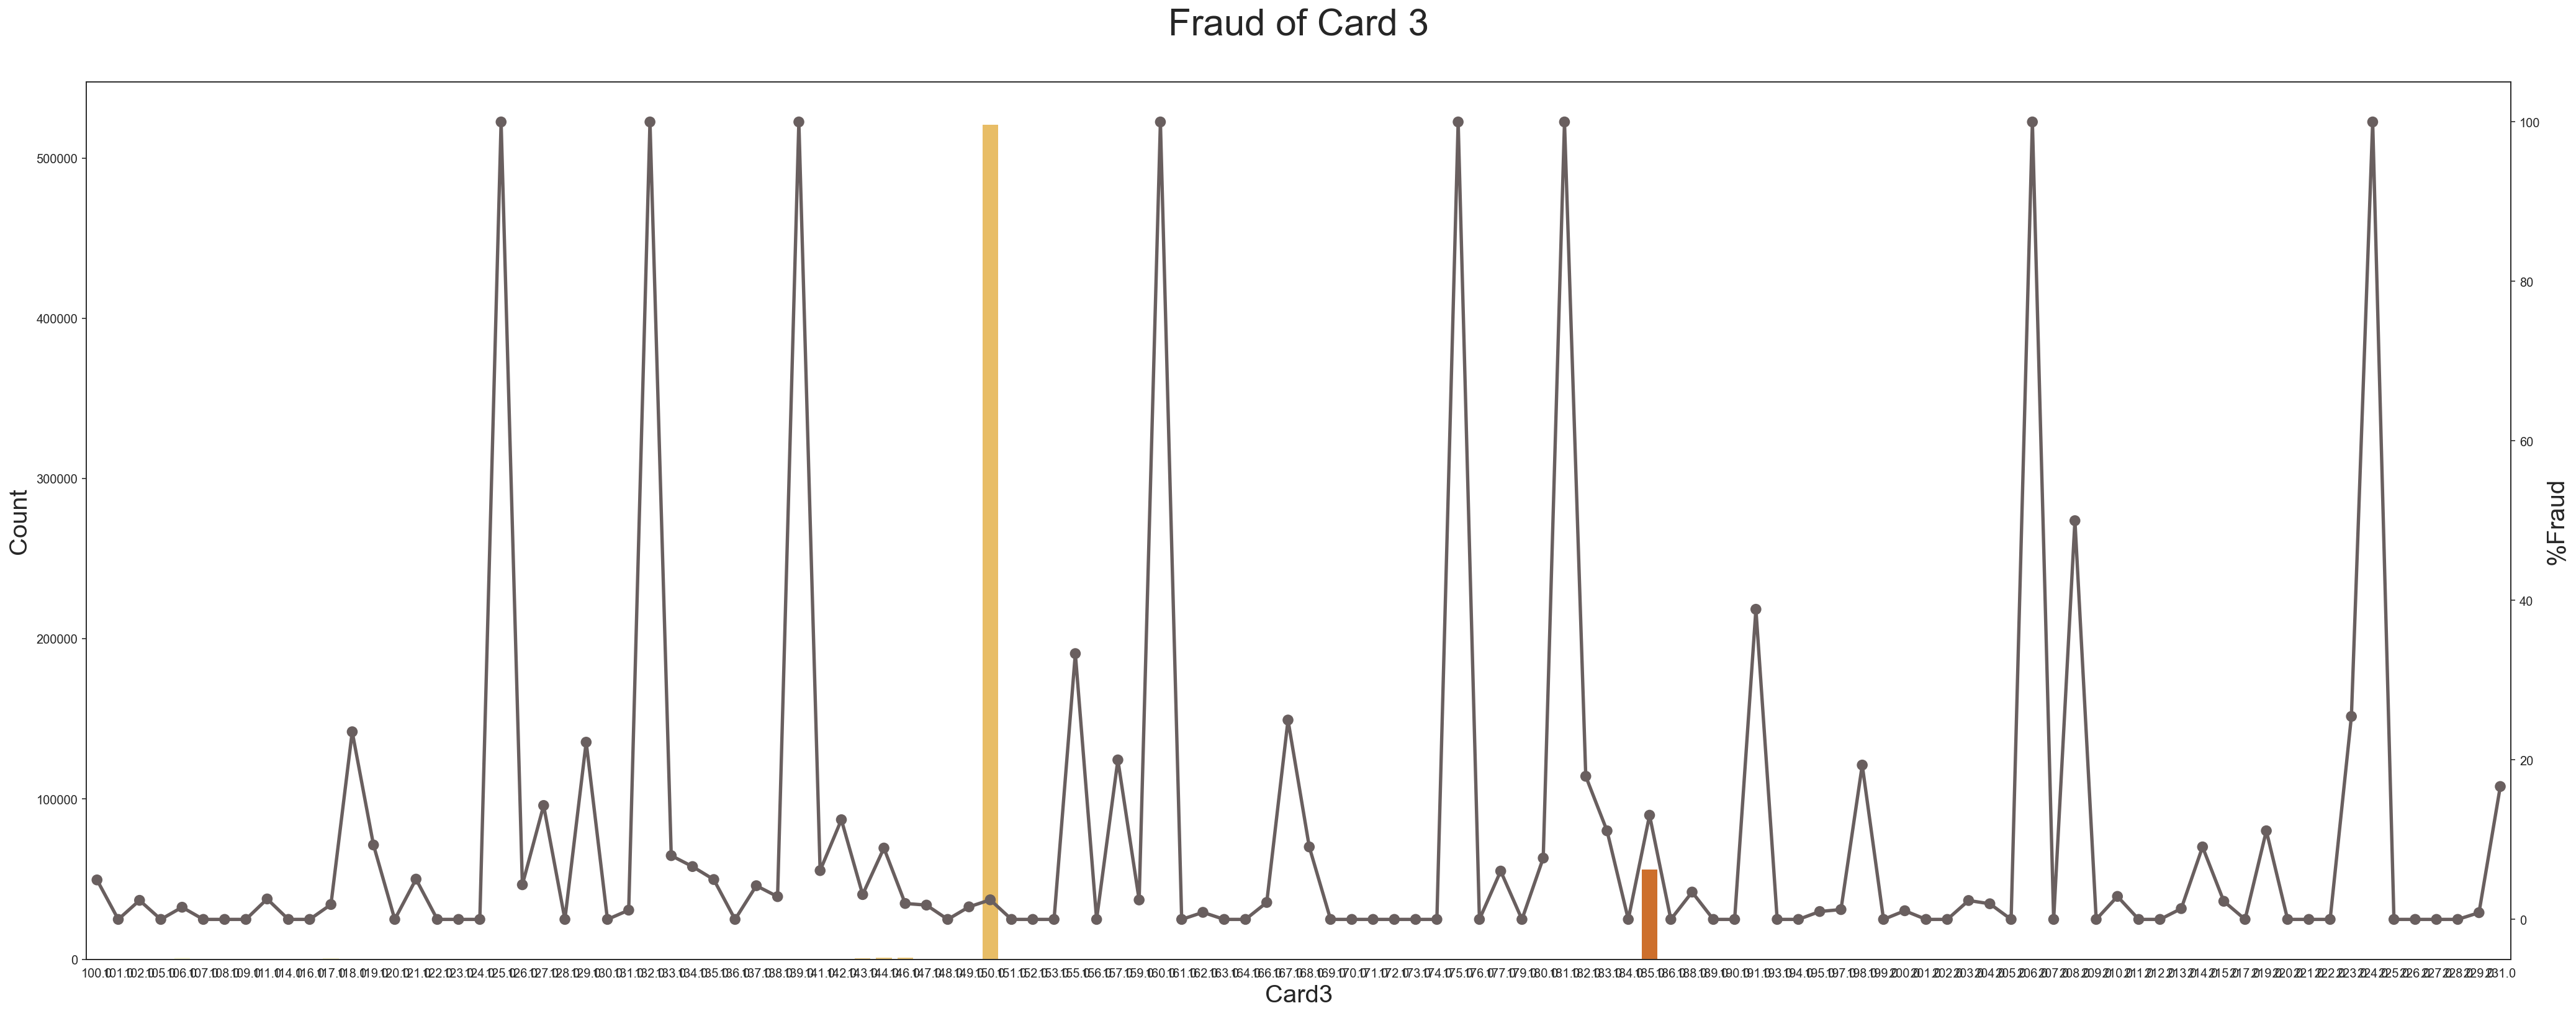

In [53]:
### Checking %fraud for each transaction

plt.figure(figsize = (35,13))
g3 = sns.countplot(x = 'card3', data = card3, palette='YlOrBr')
g33 = g3.twinx()
g33 = sns.pointplot(x = 'card3', y = 'Fraud', data = card33, color = '#695f5f')
plt.title('Fraud of Card 3\n',fontsize=30)
g3.set_xlabel('Card3', fontsize=20)
g3.set_ylabel('Count', fontsize=20)
g33.set_ylabel('%Fraud', fontsize=20)

### Card4

In [54]:
card4 = cards[['card4','TransactionAmt','isFraud']]
card4 = card4.reset_index(drop=True).reset_index().sort_values(by='isFraud')
card4['color'] = card4['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
card4 = card4.dropna()
card4

index       card4  TransactionAmt  isFraud    color
0            0    discover          68.500        0  #e5e5e5
390062  390062        visa          47.950        0  #e5e5e5
390060  390060        visa          25.950        0  #e5e5e5
390059  390059        visa         100.000        0  #e5e5e5
390058  390058        visa         210.950        0  #e5e5e5
...        ...         ...             ...      ...      ...
415021  415021        visa         150.000        1  #ee7106
231999  231999        visa          59.000        1  #ee7106
199476  199476        visa        2680.000        1  #ee7106
313705  313705  mastercard         994.000        1  #ee7106
80060    80060        visa          76.023        1  #ee7106

[588963 rows x 5 columns]

In [55]:
card4.card4.value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

Text(0.5, 1.0, 'Type of card\n')

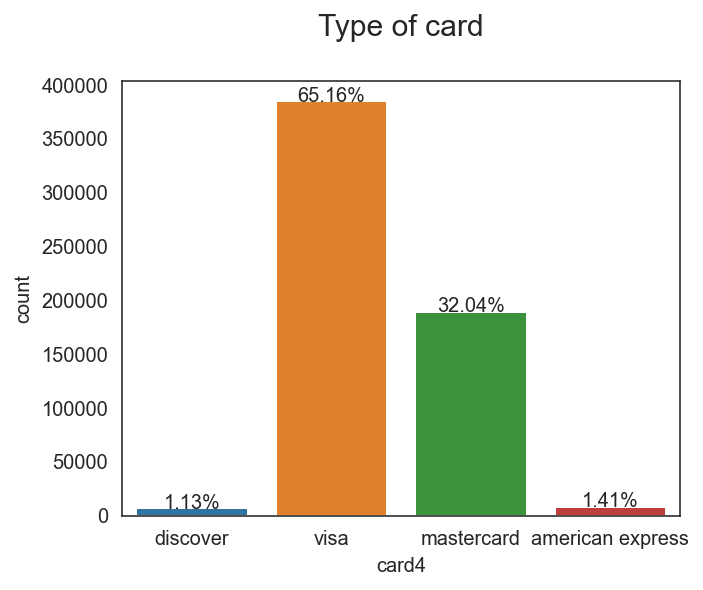

In [56]:
### Ratio of each type of Card 4

plt.figure(figsize=(5,4))
g4 = sns.countplot(x='card4', data = card4)
for p in g4.patches:
    height = p.get_height()
    g4.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=10)

plt.title('Type of card\n', fontsize=15)

In [57]:
card44 = pd.crosstab(cards['card4'], cards['isFraud'], normalize = 'index') *100
card44 = card44.reset_index()
card44 = card44.rename(columns={0:'NoFraud', 1:'Fraud'})
card44

isFraud             card4    NoFraud     Fraud
0        american express  97.130163  2.869837
1                discover  92.271839  7.728161
2              mastercard  96.566905  3.433095
3                    visa  96.524390  3.475610

Text(0, 0.5, '%Fraud')

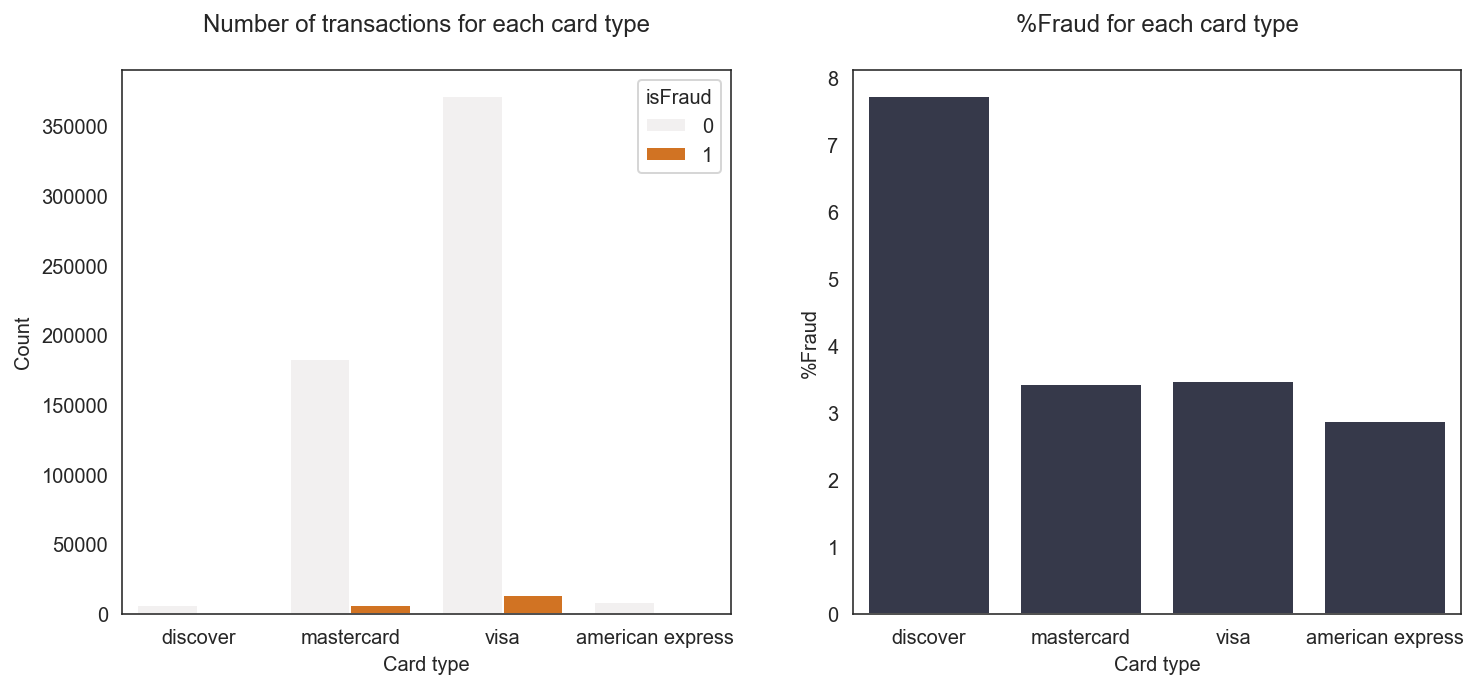

In [107]:
# ### Plot %fraud & total of transactions for Card 4

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1 = sns.countplot(x='card4',data = train, hue='isFraud', color = '#ee7106', ax = ax1)
ax2 = sns.barplot(x='card4', y ='Fraud',data = card44, color = '#33374d', order=['discover', 'mastercard', 'visa', 'american express'], ax = ax2)
ax1.set_title('Number of transactions for each card type\n');
ax1.set_xlabel('Card type')
ax1.set_ylabel('Count')
ax2.set_title('%Fraud for each card type\n');
ax2.set_xlabel('Card type')
ax2.set_ylabel('%Fraud')

In [60]:
card4_fraud = card4[card4['isFraud'] == 1]

card4_visa = card4[card4['card4'] == 'visa']
card4_master = card4[card4['card4'] == 'mastercard']
card4_dis = card4[card4['card4'] == 'discover']
card4_american = card4[card4['card4'] == 'american express']

Text(0.5, 1.0, 'Card 4\n')

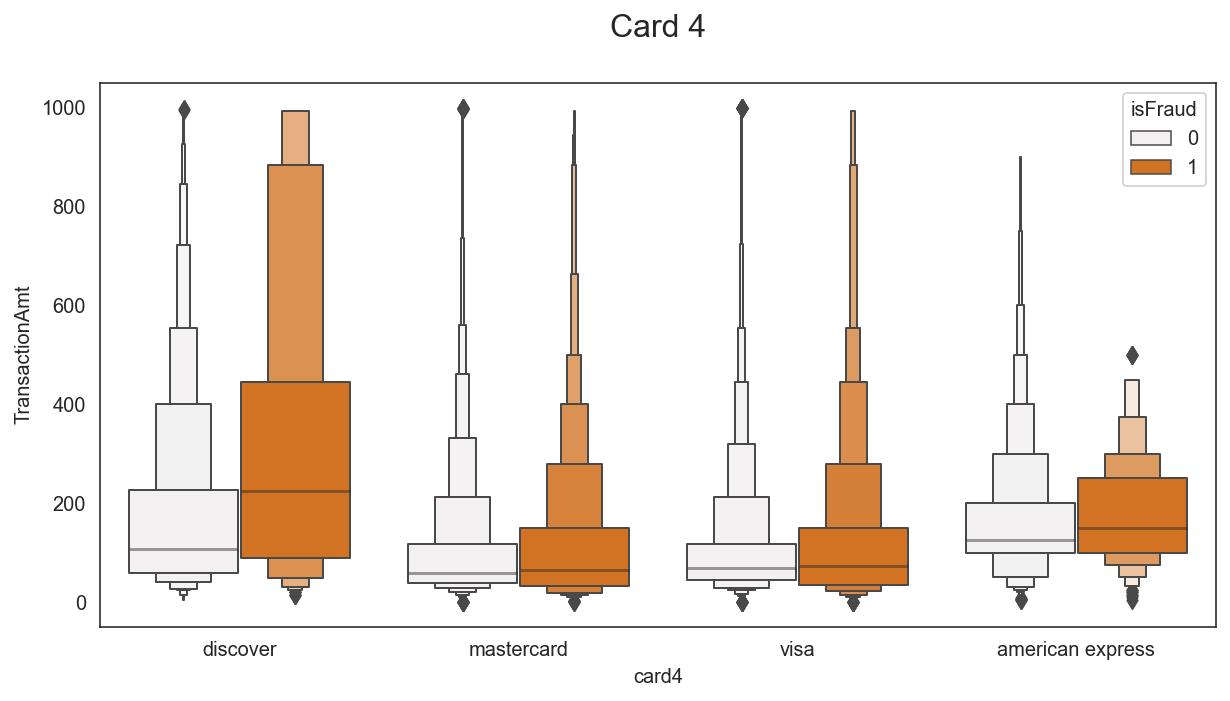

In [190]:
###Behavior of customer by transaction amount of Card 4

plt.figure(figsize=(10,5))
sns.boxenplot(x = 'card4', y = 'TransactionAmt', hue = 'isFraud', data = train[train['TransactionAmt'] < 1000], color = '#ee7106')
plt.title('Card 4\n',fontsize=16)

Text(0.5, 1.0, 'Fraud of Card 4\n')

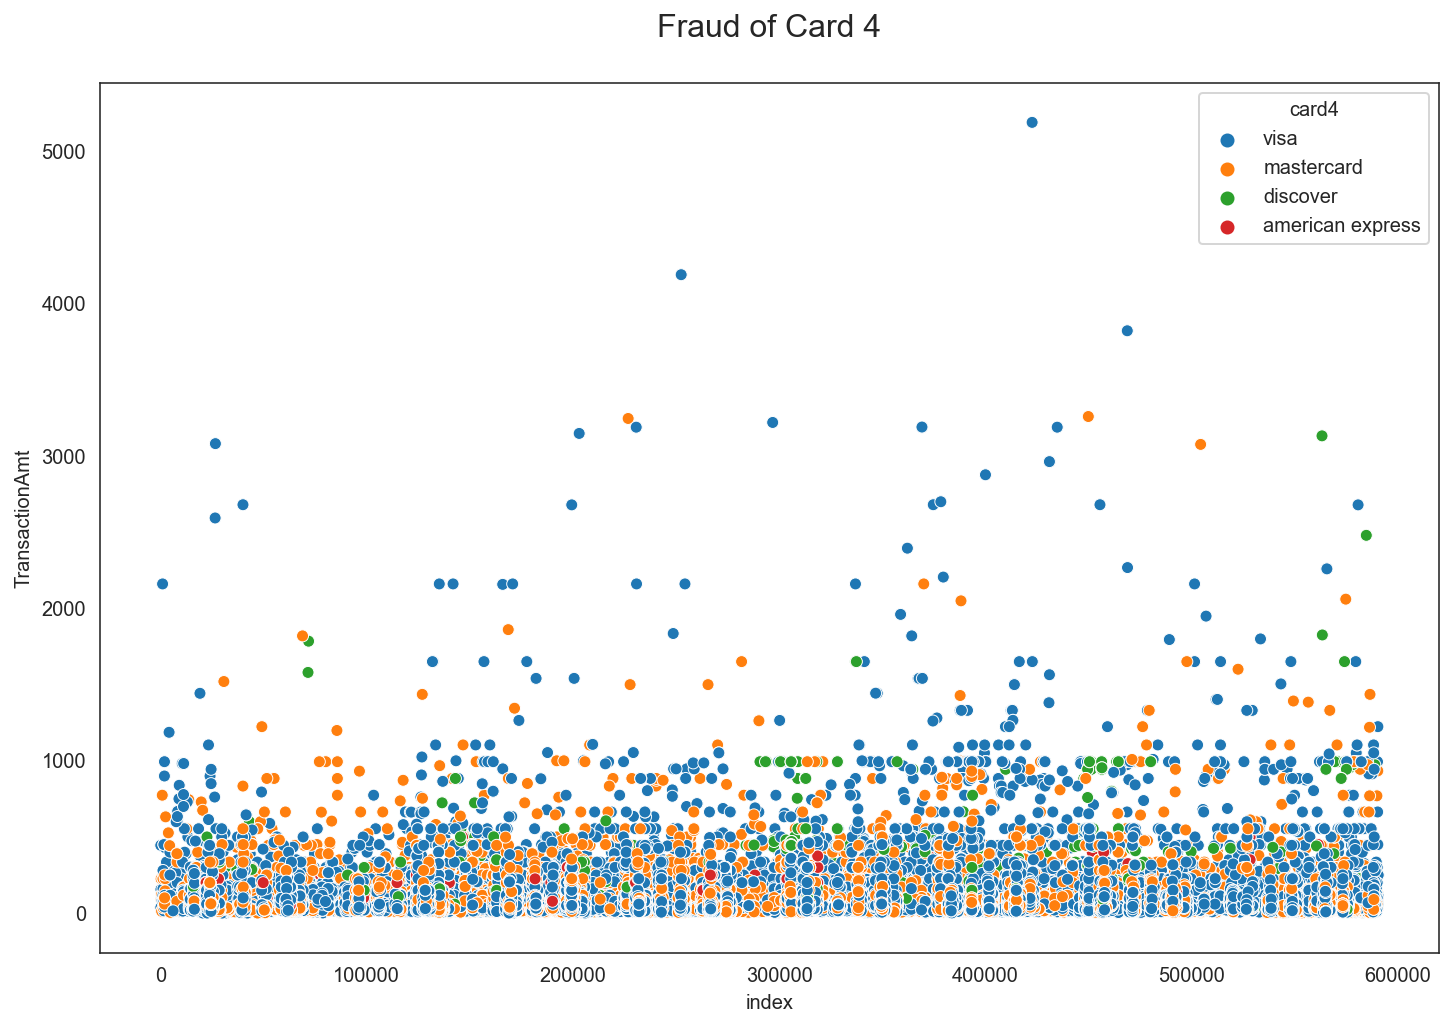

In [61]:
### The detail of fraud and not fraud of Card 4

plt.figure(figsize = (12,8))
sns.scatterplot(x='index', y='TransactionAmt', data = card4_fraud, hue = 'card4')
plt.title('Fraud of Card 4\n',fontsize=16)

### Card 5

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 16.0, 'Transaction of Card 5')

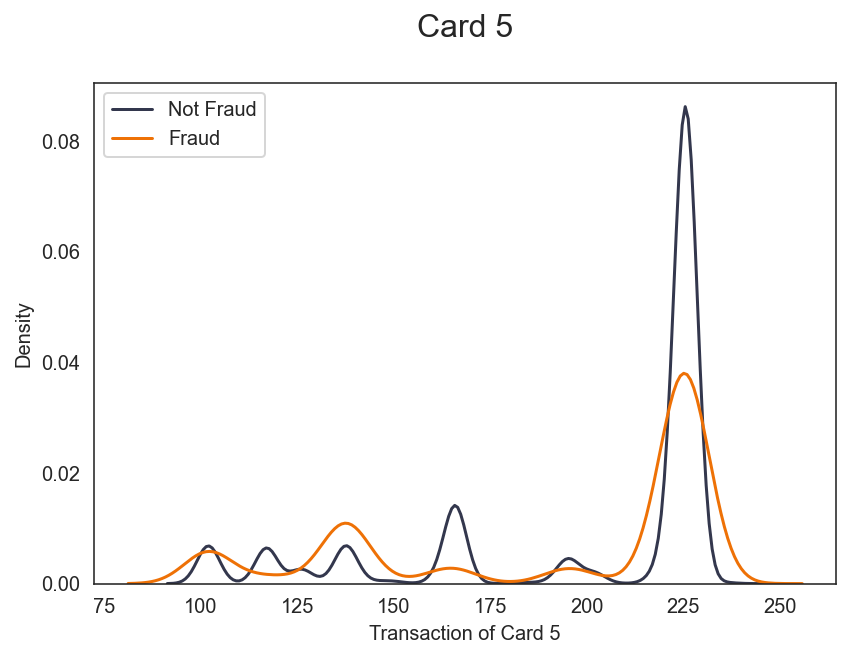

In [218]:
### Plot the distribution of Card 5

sns.distplot(x = cards[['isFraud','card5']]['card5'].loc[cards['isFraud'] == 0], color='#33374d', hist=False, label = 'Not Fraud')
sns.distplot(x = cards[['isFraud','card5']]['card5'].loc[cards['isFraud'] == 1], color='#ee7106', hist=False, label = 'Fraud')
plt.tight_layout()
plt.legend()
plt.title('Card 5\n', fontsize=16)
plt.xlabel('Transaction of Card 5')

In [71]:
card5 = cards[['card5','TransactionAmt','isFraud']]
card5 = card5.reset_index(drop=True).sort_values(by='isFraud')
card5['color'] = card5['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
card5 = card5[card5['TransactionAmt'] < 10000]
card5 = card5.dropna()
card5

card5  TransactionAmt  isFraud    color
0       142.0          68.500        0  #e5e5e5
390062  226.0          47.950        0  #e5e5e5
390060  226.0          25.950        0  #e5e5e5
390059  195.0         100.000        0  #e5e5e5
390058  226.0         210.950        0  #e5e5e5
...       ...             ...      ...      ...
415021  226.0         150.000        1  #ee7106
231999  226.0          59.000        1  #ee7106
199476  226.0        2680.000        1  #ee7106
313705  219.0         994.000        1  #ee7106
80060   138.0          76.023        1  #ee7106

[586279 rows x 4 columns]

In [72]:
card55 = pd.crosstab(cards['card5'], cards['isFraud'], normalize = 'index') *100
card55 = card55.reset_index()
card55 = card55.rename(columns={0:'NoFraud', 1:'Fraud'})
card55

isFraud  card5     NoFraud     Fraud
0        100.0   98.159509  1.840491
1        101.0  100.000000  0.000000
2        102.0   93.705549  6.294451
3        104.0  100.000000  0.000000
4        105.0  100.000000  0.000000
..         ...         ...       ...
114      233.0  100.000000  0.000000
115      234.0  100.000000  0.000000
116      235.0  100.000000  0.000000
117      236.0   96.908810  3.091190
118      237.0   95.918367  4.081633

[119 rows x 3 columns]

In [75]:
### This data has low variance so it suitable for plotting to look for percentage of fraud per card3

card5['card5'].value_counts(normalize=True)

226.0    0.505810
224.0    0.139034
166.0    0.097462
102.0    0.049640
117.0    0.044247
           ...   
234.0    0.000002
204.0    0.000002
196.0    0.000002
165.0    0.000002
167.0    0.000002
Name: card5, Length: 119, dtype: float64

Text(0, 0.5, '%Fraud')

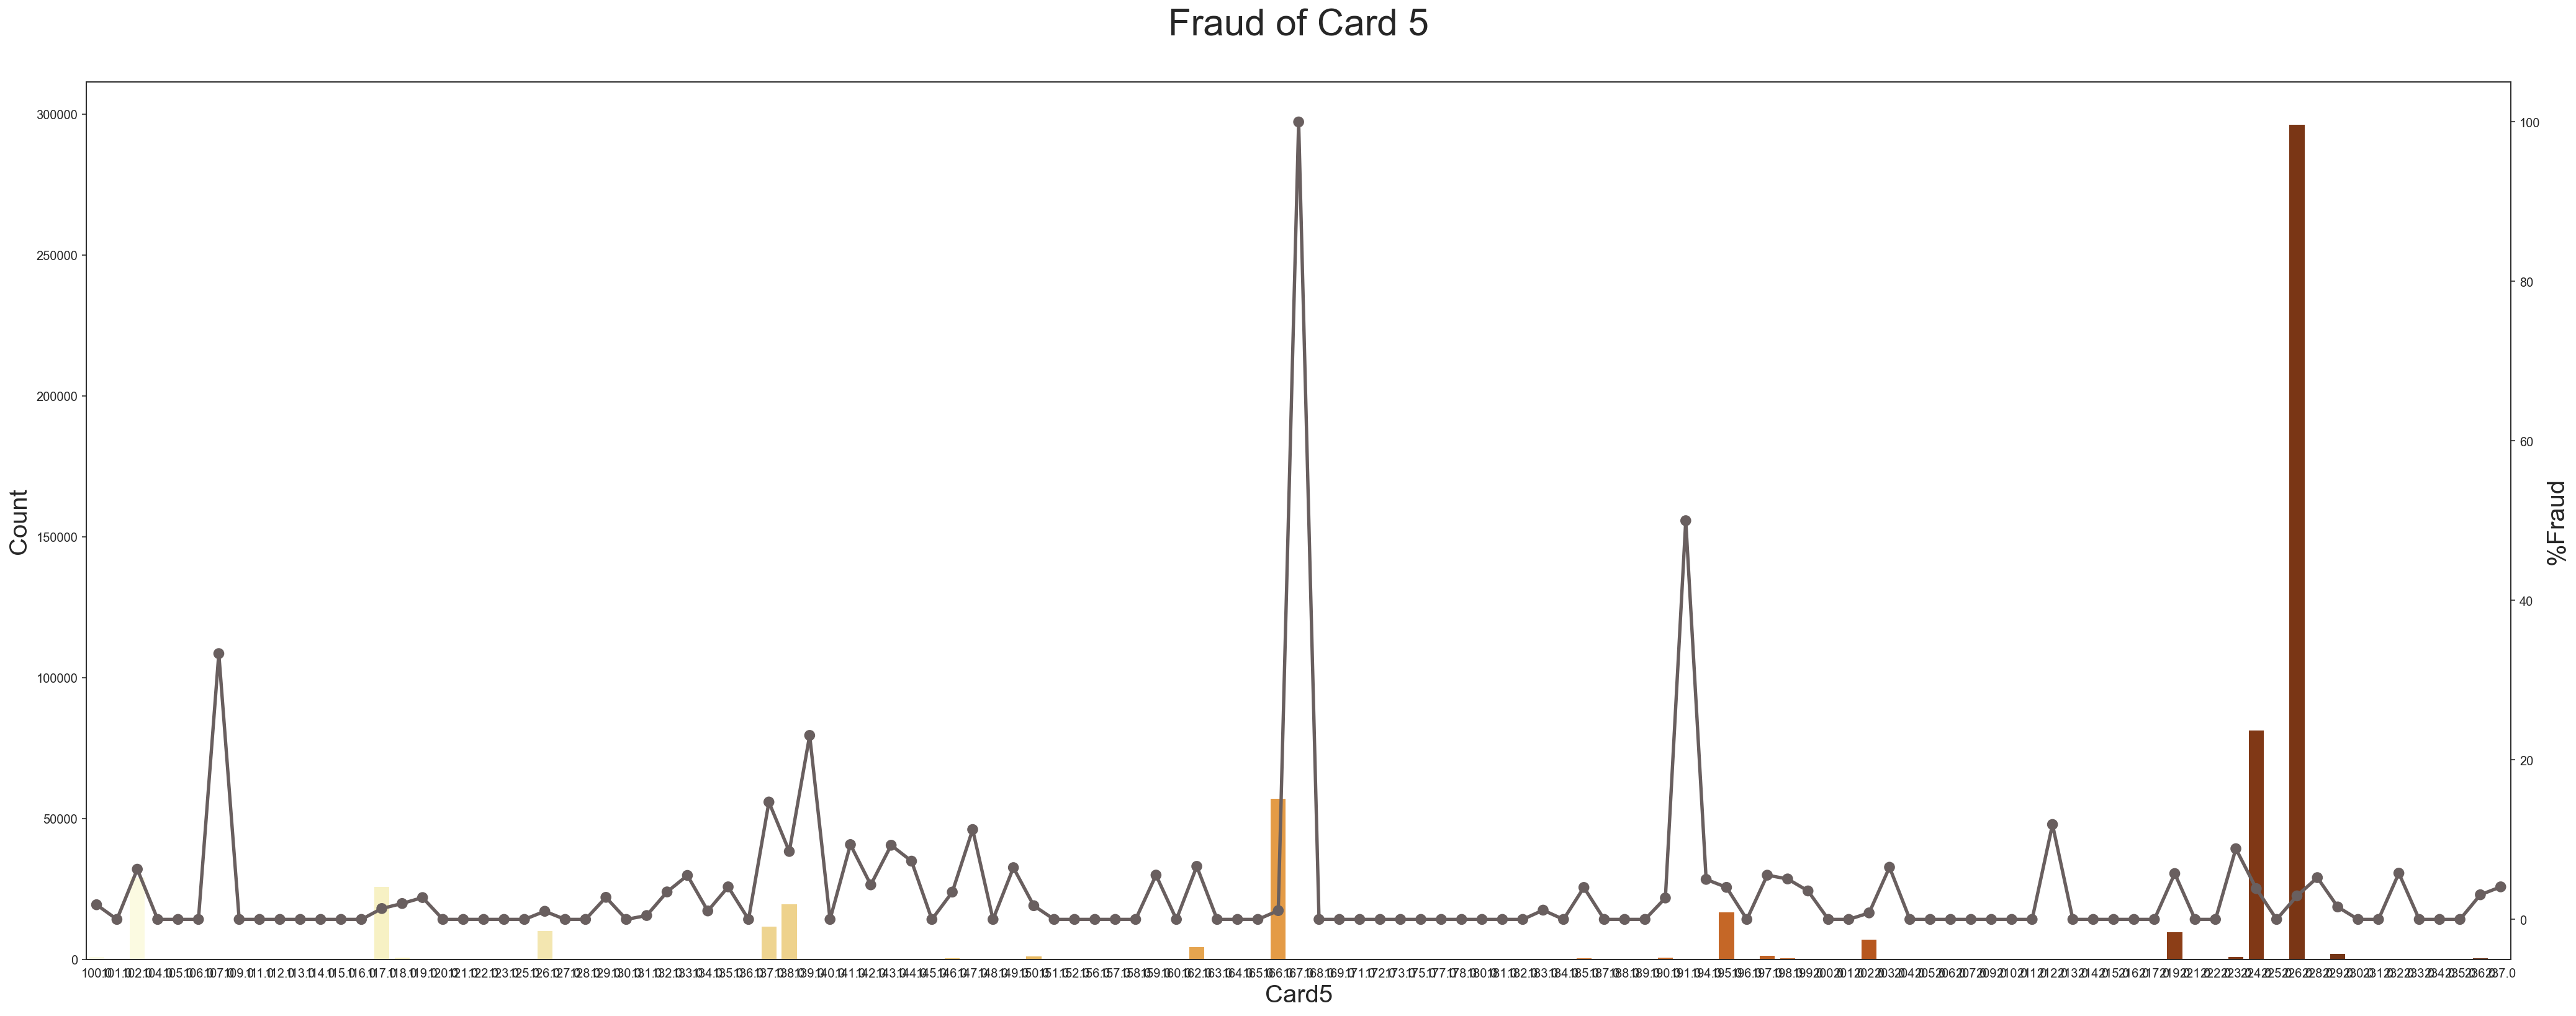

In [76]:
### Checking %fraud for each transaction

plt.figure(figsize = (35,13))
g5 = sns.countplot(x = 'card5', data = card5, palette='YlOrBr')
g55 = g5.twinx()
g55 = sns.pointplot(x = 'card5', y = 'Fraud', data = card55, color = '#695f5f')
plt.title('Fraud of Card 5\n',fontsize=30)
g5.set_xlabel('Card5', fontsize=20)
g5.set_ylabel('Count', fontsize=20)
g55.set_ylabel('%Fraud', fontsize=20)

### Card 6

In [77]:
card6 = cards[['card6','TransactionAmt','isFraud']]
card6 = card6.reset_index(drop=True).reset_index().sort_values(by='isFraud')
card6['color'] = card6['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
card6 = card6.dropna()
card6

index   card6  TransactionAmt  isFraud    color
0            0  credit          68.500        0  #e5e5e5
390062  390062   debit          47.950        0  #e5e5e5
390060  390060   debit          25.950        0  #e5e5e5
390059  390059   debit         100.000        0  #e5e5e5
390058  390058   debit         210.950        0  #e5e5e5
...        ...     ...             ...      ...      ...
415021  415021   debit         150.000        1  #ee7106
231999  231999   debit          59.000        1  #ee7106
199476  199476   debit        2680.000        1  #ee7106
313705  313705  credit         994.000        1  #ee7106
80060    80060   debit          76.023        1  #ee7106

[588969 rows x 5 columns]

In [78]:
card6.card6.value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

Text(0.5, 1.0, 'Type of card\n')

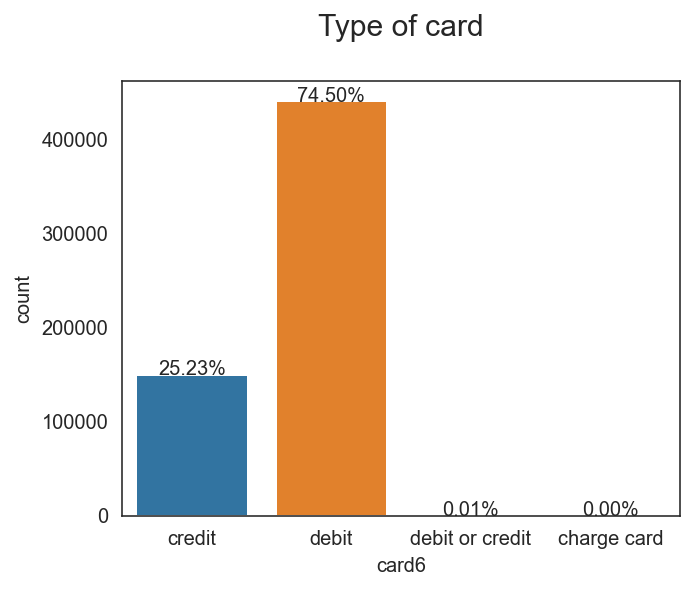

In [79]:
### Ratio of each type of Card 6

plt.figure(figsize=(5,4))
g6 = sns.countplot(x='card6', data = card6)
for p in g6.patches:
    height = p.get_height()
    g6.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=10)

plt.title('Type of card\n', fontsize=15)

In [80]:
card66 = pd.crosstab(cards['card6'], cards['isFraud'], normalize = 'index') *100
card66 = card66.reset_index()
card66 = card66.rename(columns={0:'NoFraud', 1:'Fraud'})
card66

isFraud            card6     NoFraud     Fraud
0            charge card  100.000000  0.000000
1                 credit   93.321520  6.678480
2                  debit   97.573749  2.426251
3        debit or credit  100.000000  0.000000

In [82]:
card6_fraud = card6[card6['isFraud'] == 1]

card6_credit = card6[card6['card6'] == 'credit']
card6_debit = card6[card6['card6'] == 'debit']
card6_decre = card6[card6['card6'] == 'debit or credit']
card6_charge = card6[card6['card6'] == 'charge card']

Text(0, 0.5, '%Fraud')

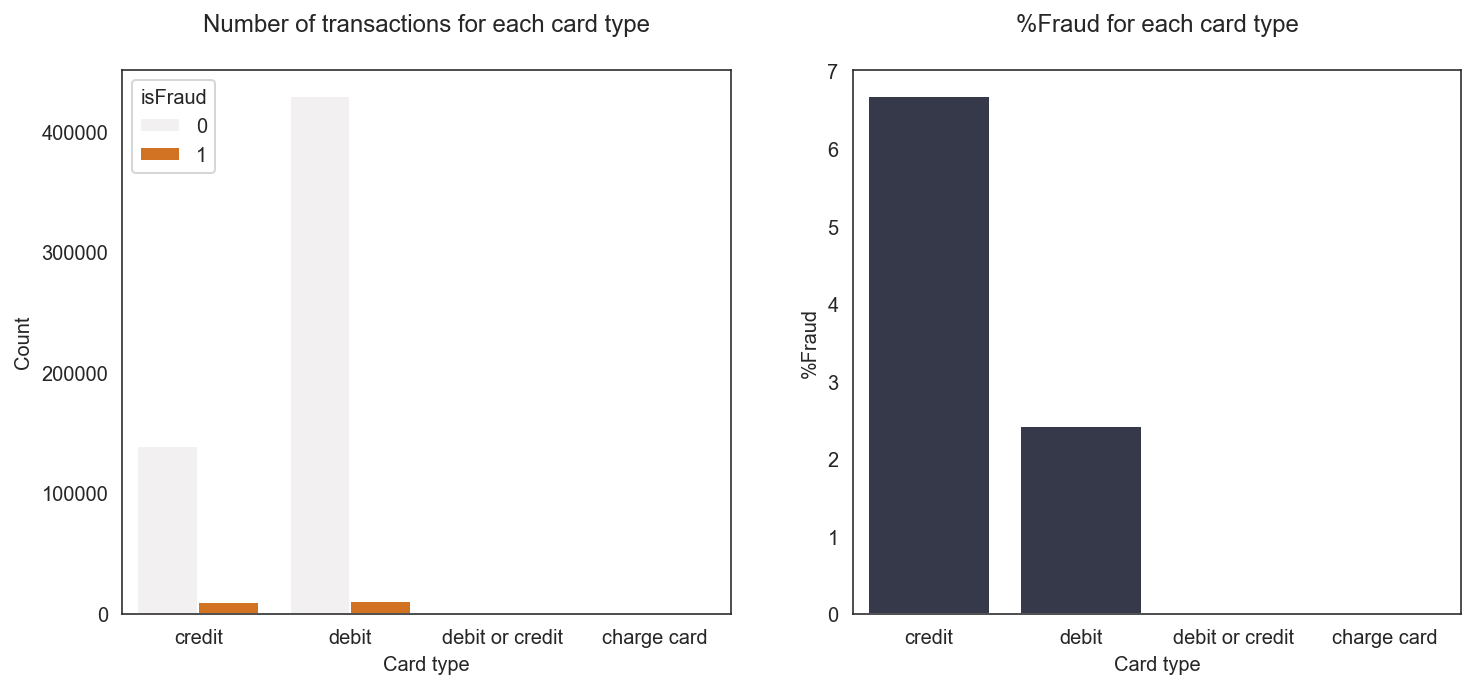

In [188]:
### Plot %fraud & total of transactions for each card

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1 = sns.countplot(x='card6',data = train, hue='isFraud', color = '#ee7106', ax = ax1)
ax2 = sns.barplot(x='card6', y ='Fraud',data = card66, color = '#33374d', order=['credit', 'debit', 'debit or credit', 'charge card'], ax = ax2)
ax1.set_title('Number of transactions for each card type\n');
ax1.set_xlabel('Card type')
ax1.set_ylabel('Count')
ax2.set_title('%Fraud for each card type\n');
ax2.set_xlabel('Card type')
ax2.set_ylabel('%Fraud')

Text(0.5, 1.0, 'Card 6\n')

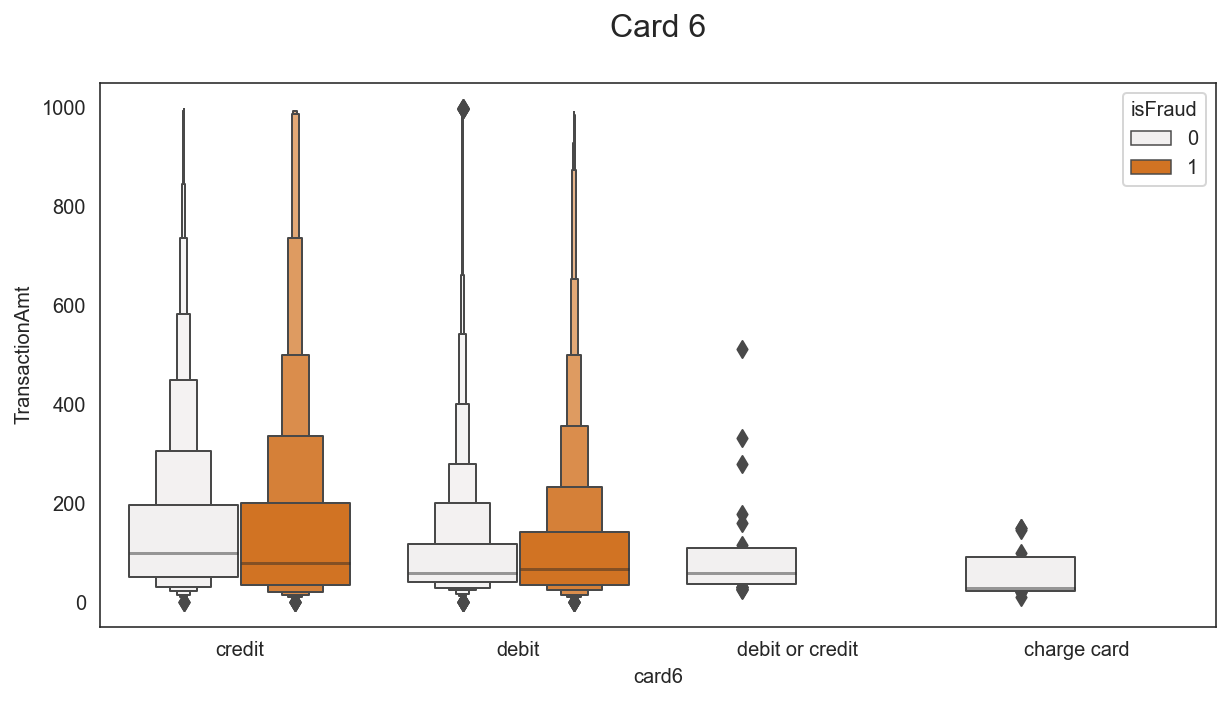

In [191]:
###Behavior of customer by transaction amount of Card 6

plt.figure(figsize=(10,5))
sns.boxenplot(x = 'card6', y = 'TransactionAmt', hue = 'isFraud', data = train[train['TransactionAmt'] < 1000], color = '#ee7106')
plt.title('Card 6\n',fontsize=16)

Text(0.5, 1.0, 'Fraud of Card 6\n')

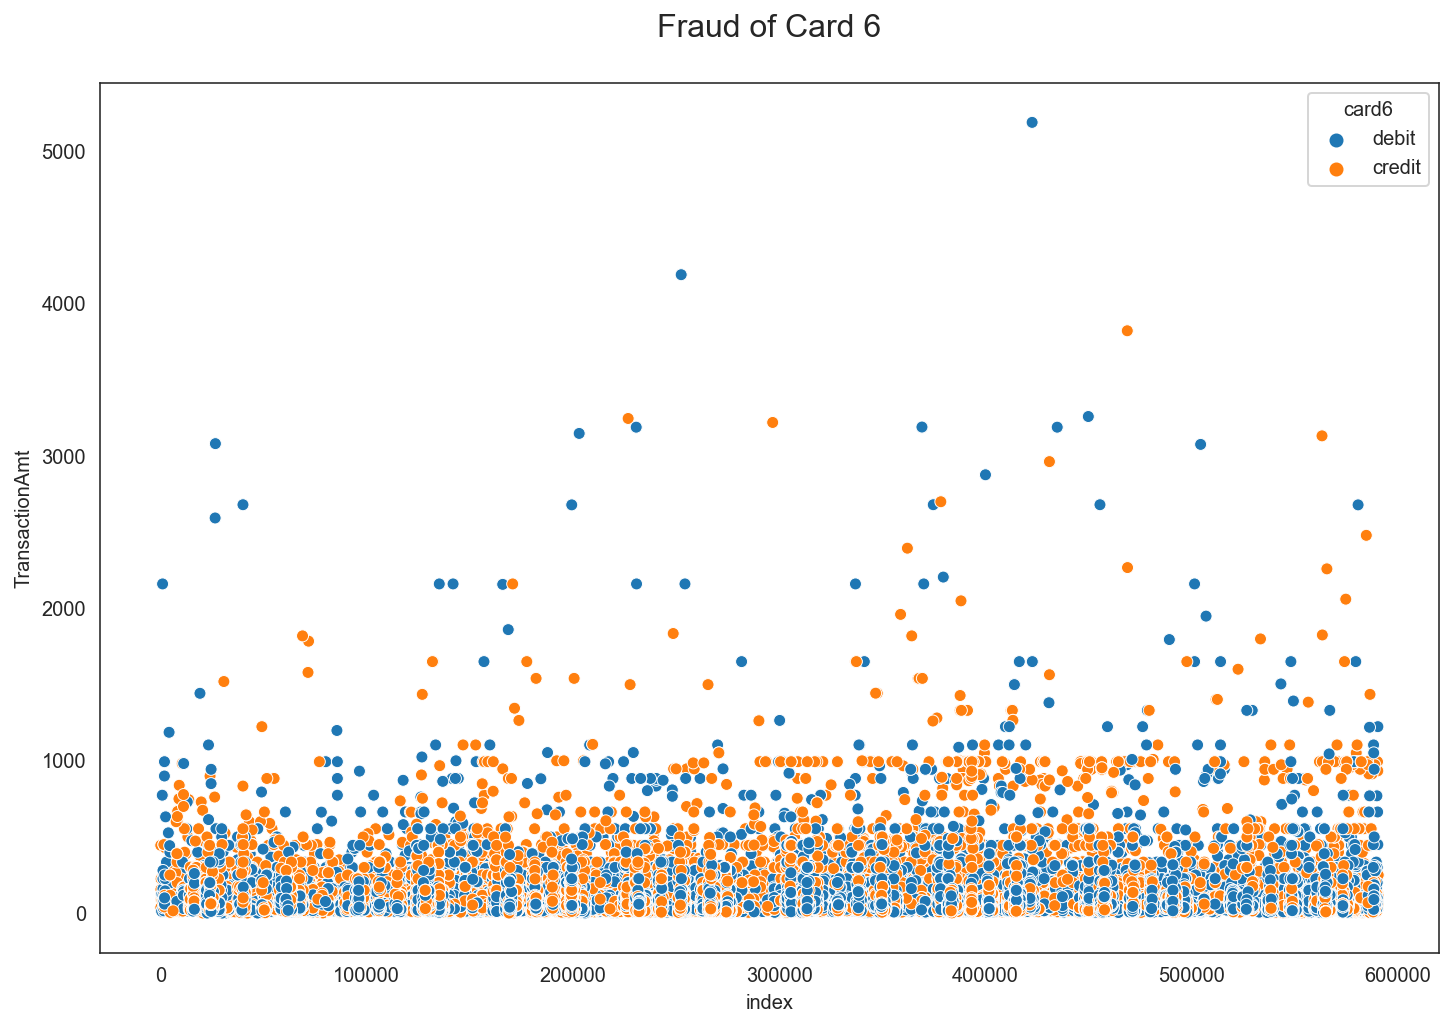

In [83]:
### The detail of fraud and not fraud of Card 6

plt.figure(figsize = (12,8))
sns.scatterplot(x='index', y='TransactionAmt', data = card6_fraud, hue = 'card6')
plt.title('Fraud of Card 6\n',fontsize=16)

## Email

In [88]:
train['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
roadrunner.com         305
windstream.net         305
hotmail.es             305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

In [89]:
email = train.copy()

In [90]:
### Grouping to "Google" domain

email.loc[email['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

In [91]:
### Grouping to "Yahoo" domain

email.loc[email['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

In [92]:
### Grouping to "Microsoft" domain

email.loc[email['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

In [93]:
### Grouping only the email that has less than 2000 transactions to "Others"

email.loc[email['P_emaildomain'].isin(email['P_emaildomain'].value_counts()[email['P_emaildomain'].value_counts() <= 2000 ].index), 'P_emaildomain'] = "Others"

In [94]:
email['P_emaildomain'].value_counts()

Google           228851
Yahoo            102909
Microsoft         59477
anonymous.com     36998
aol.com           28289
Others            13301
comcast.net        7888
icloud.com         6267
att.net            4033
sbcglobal.net      2970
verizon.net        2705
ymail.com          2396
Name: P_emaildomain, dtype: int64

In [95]:
email1 = email[['P_emaildomain','TransactionAmt','isFraud']]
email1 = email1.reset_index(drop=True).reset_index().sort_values(by='isFraud')
email1['color'] = email1['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
email1 = email1.dropna()
email1

index  P_emaildomain  TransactionAmt  isFraud    color
390059  390059  anonymous.com         100.000        0  #e5e5e5
390058  390058          Yahoo         210.950        0  #e5e5e5
390056  390056  anonymous.com         100.000        0  #e5e5e5
390055  390055          Yahoo         117.000        0  #e5e5e5
390054  390054     icloud.com         114.950        0  #e5e5e5
...        ...            ...             ...      ...      ...
199488  199488         Google         226.000        1  #ee7106
415021  415021         Google         150.000        1  #ee7106
231999  231999          Yahoo          59.000        1  #ee7106
313705  313705    comcast.net         994.000        1  #ee7106
80060    80060          Yahoo          76.023        1  #ee7106

[496084 rows x 5 columns]

Text(0.5, 1.0, 'P_Email\n')

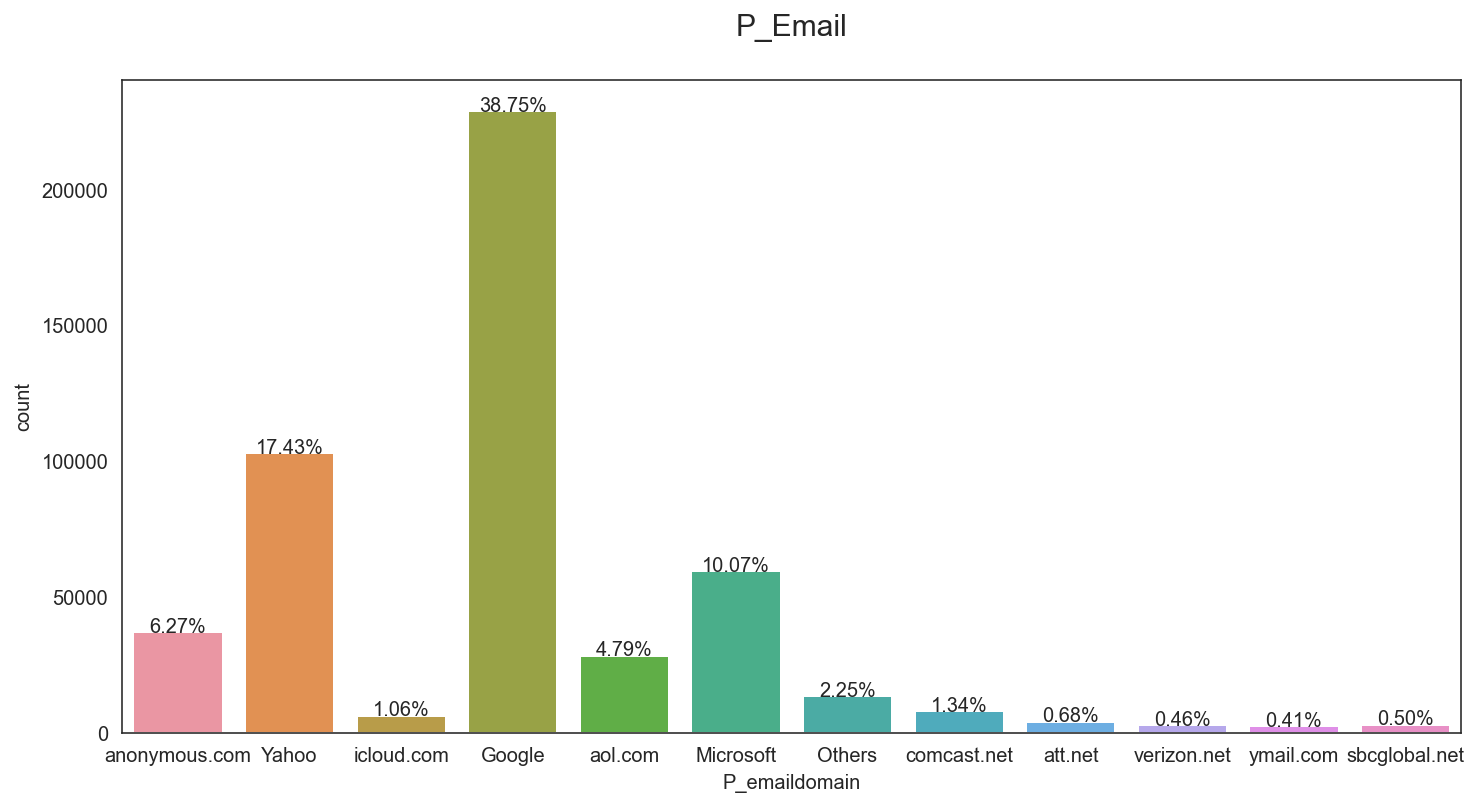

In [96]:
### Ratio of each type for email domain

plt.figure(figsize=(12,6))
e1 = sns.countplot(x='P_emaildomain', data = email1)
for p in e1.patches:
    height = p.get_height()
    e1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=10)

plt.title('P_Email\n', fontsize=15)

In [97]:
email11 = pd.crosstab(email['P_emaildomain'], email['isFraud'], normalize = 'index') *100
email11 = email11.reset_index()
email11 = email11.rename(columns={0:'NoFraud', 1:'Fraud'})
email11

isFraud  P_emaildomain    NoFraud     Fraud
0               Google  95.650445  4.349555
1            Microsoft  94.670209  5.329791
2               Others  97.022780  2.977220
3                Yahoo  97.745581  2.254419
4        anonymous.com  97.678253  2.321747
5              aol.com  97.818940  2.181060
6              att.net  99.256137  0.743863
7          comcast.net  96.881339  3.118661
8           icloud.com  96.856550  3.143450
9        sbcglobal.net  99.595960  0.404040
10         verizon.net  99.186691  0.813309
11           ymail.com  97.913189  2.086811

Text(0, 0.5, 'Count')

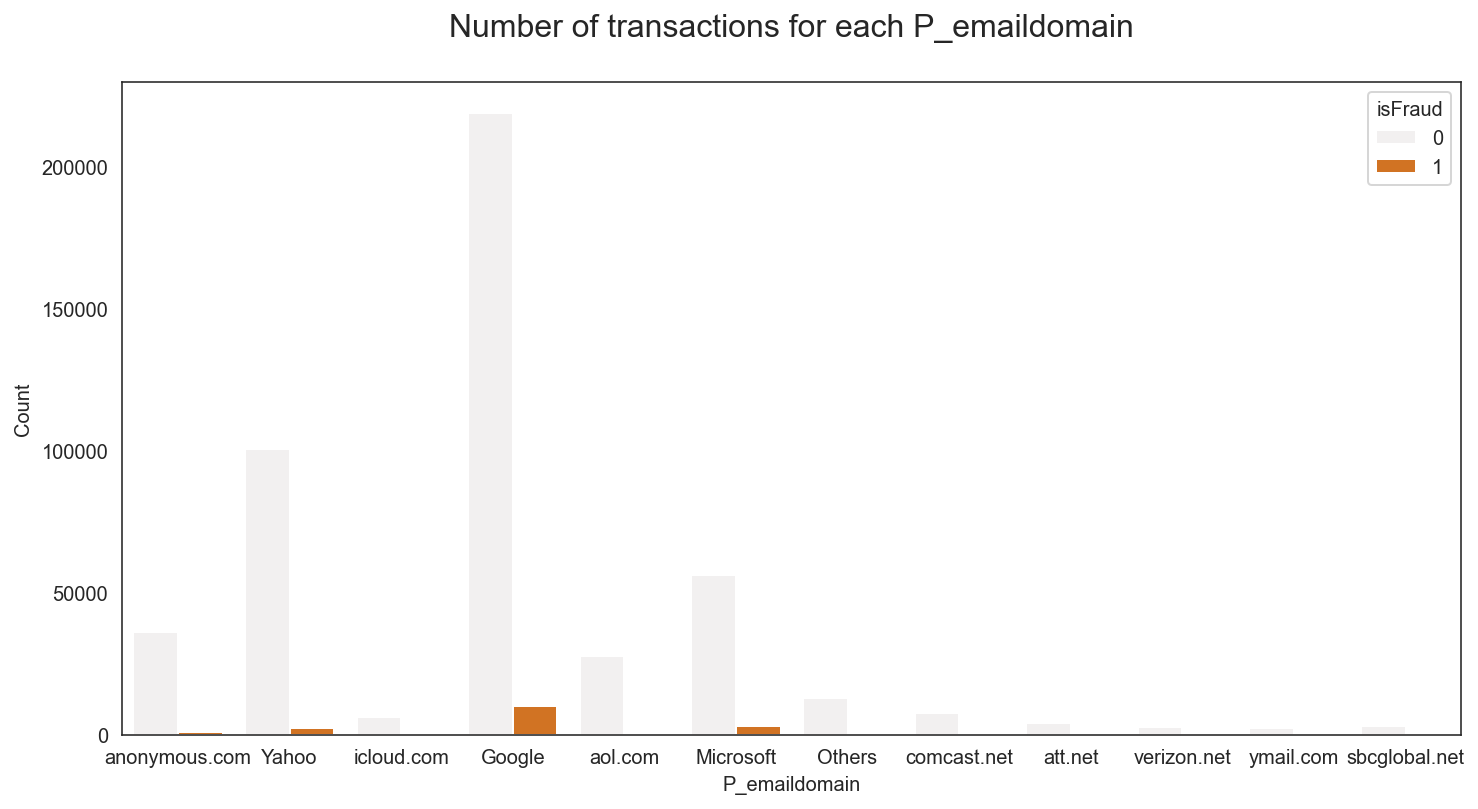

In [175]:
### Plot %fraud & total of transactions for Purchaser email (Count)
plt.figure(figsize=(12,6))
sns.countplot(x='P_emaildomain',data = email1, hue='isFraud', color = '#ee7106')
plt.title('Number of transactions for each P_emaildomain\n', fontsize=16);
plt.xlabel('P_emaildomain')
plt.ylabel('Count')

Text(0, 0.5, '%Fraud')

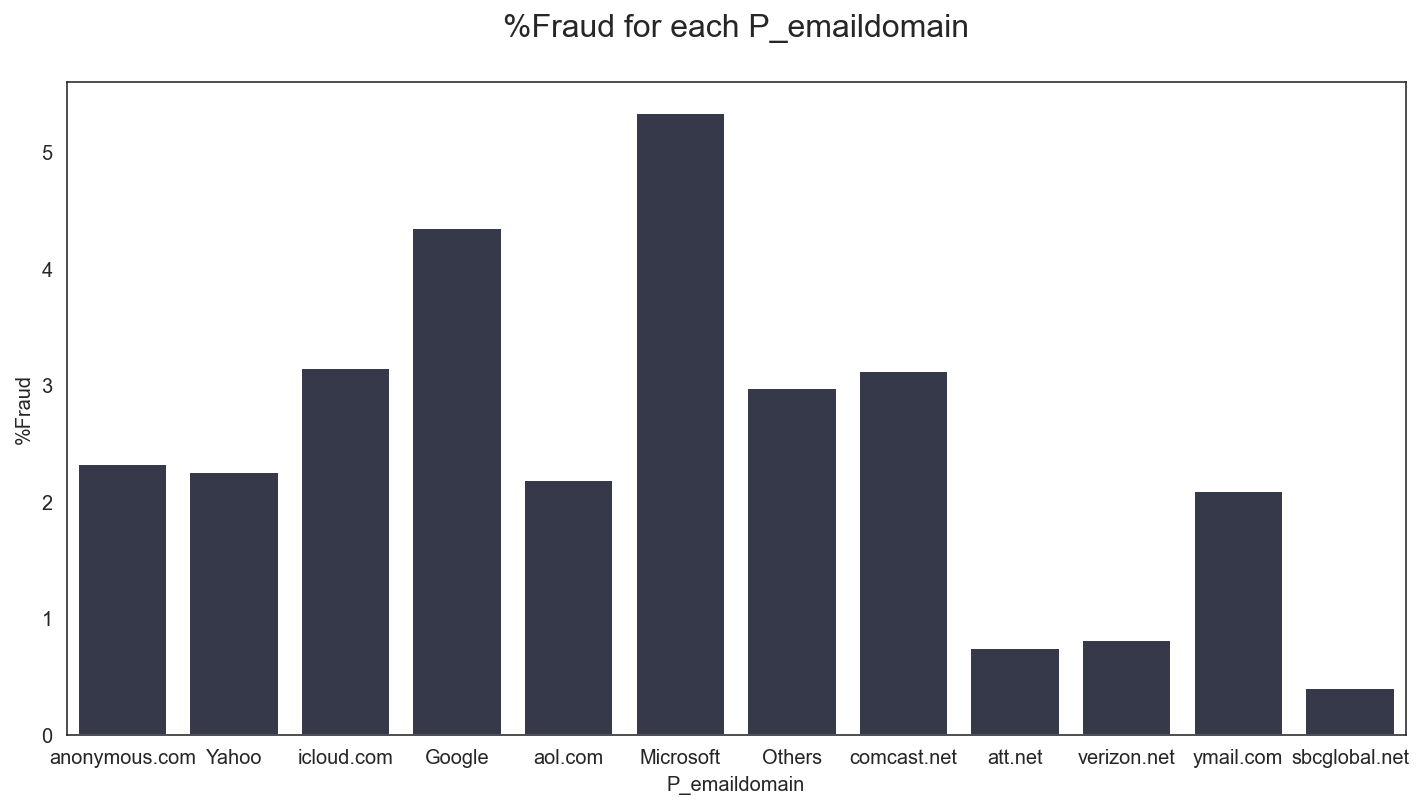

In [176]:
### Plot %fraud & total of transactions for Purchaser email (%Fraud)
plt.figure(figsize=(12,6))
sns.barplot(x='P_emaildomain', y ='Fraud',data = email11, color = '#33374d', order=['anonymous.com','Yahoo','icloud.com','Google','aol.com','Microsoft','Others','comcast.net','att.net','verizon.net','ymail.com','sbcglobal.net'])
plt.title('%Fraud for each P_emaildomain\n', fontsize=16);
plt.xlabel('P_emaildomain')
plt.ylabel('%Fraud')

Text(0.5, 1.0, 'P_emaildomain\n')

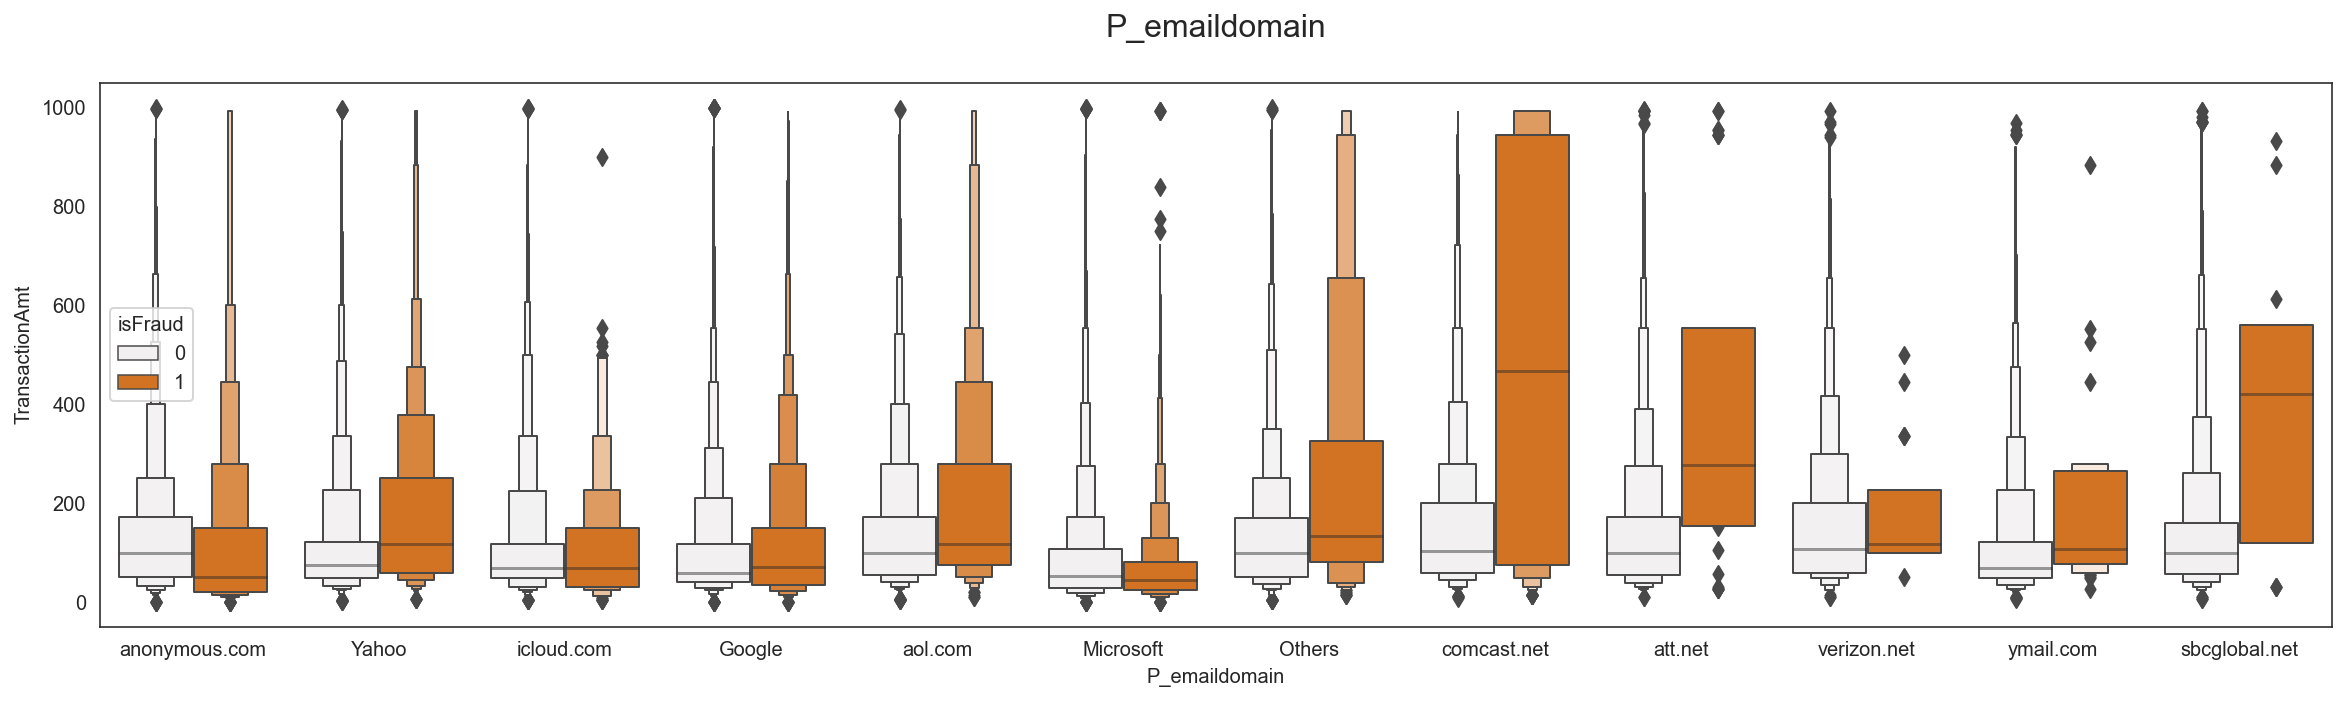

In [196]:
###Behavior of customer by transaction amount of P_emaildomain

plt.figure(figsize=(20,5))
sns.boxenplot(x = 'P_emaildomain', y = 'TransactionAmt', hue = 'isFraud', data = email1[email1['TransactionAmt'] < 1000], color = '#ee7106')
plt.title('P_emaildomain\n',fontsize=16)

## DeviceType

In [99]:
train['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [100]:
device1 = train[['DeviceType','TransactionAmt','isFraud']]
device1 = device1.reset_index(drop=True).reset_index().sort_values(by='isFraud')
device1['color'] = device1['isFraud'].map(lambda x:'#ee7106' if x == 1 else '#e5e5e5')
device1 = device1.dropna()
device1

index DeviceType  TransactionAmt  isFraud    color
390059  390059     mobile         100.000        0  #e5e5e5
390056  390056     mobile         100.000        0  #e5e5e5
390053  390053     mobile          15.000        0  #e5e5e5
390052  390052    desktop          52.686        0  #e5e5e5
390047  390047    desktop          11.359        0  #e5e5e5
...        ...        ...             ...      ...      ...
128406  128406     mobile         150.000        1  #ee7106
24497    24497     mobile          56.311        1  #ee7106
24507    24507    desktop          61.628        1  #ee7106
415021  415021    desktop         150.000        1  #ee7106
80060    80060     mobile          76.023        1  #ee7106

[140810 rows x 5 columns]

Text(0.5, 1.0, 'Device Type\n')

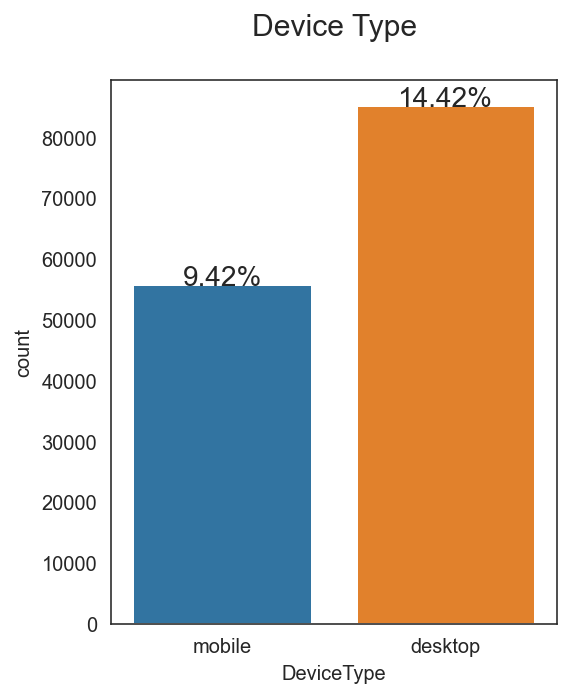

In [101]:
### Ratio of each type for Device type

plt.figure(figsize=(4,5))
d1 = sns.countplot(x='DeviceType', data = device1)
for p in d1.patches:
    height = p.get_height()
    d1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14)

plt.title('Device Type\n', fontsize=15)

In [102]:
device11 = pd.crosstab(train['DeviceType'], train['isFraud'], normalize = 'index') *100
device11 = device11.reset_index()
device11 = device11.rename(columns={0:'NoFraud', 1:'Fraud'})
device11

isFraud DeviceType    NoFraud      Fraud
0          desktop  93.478542   6.521458
1           mobile  89.833768  10.166232

In [194]:
device1_fraud = device1[device1['isFraud'] == 1]

Text(0.5, 1.0, 'Fraud of Device Type\n')

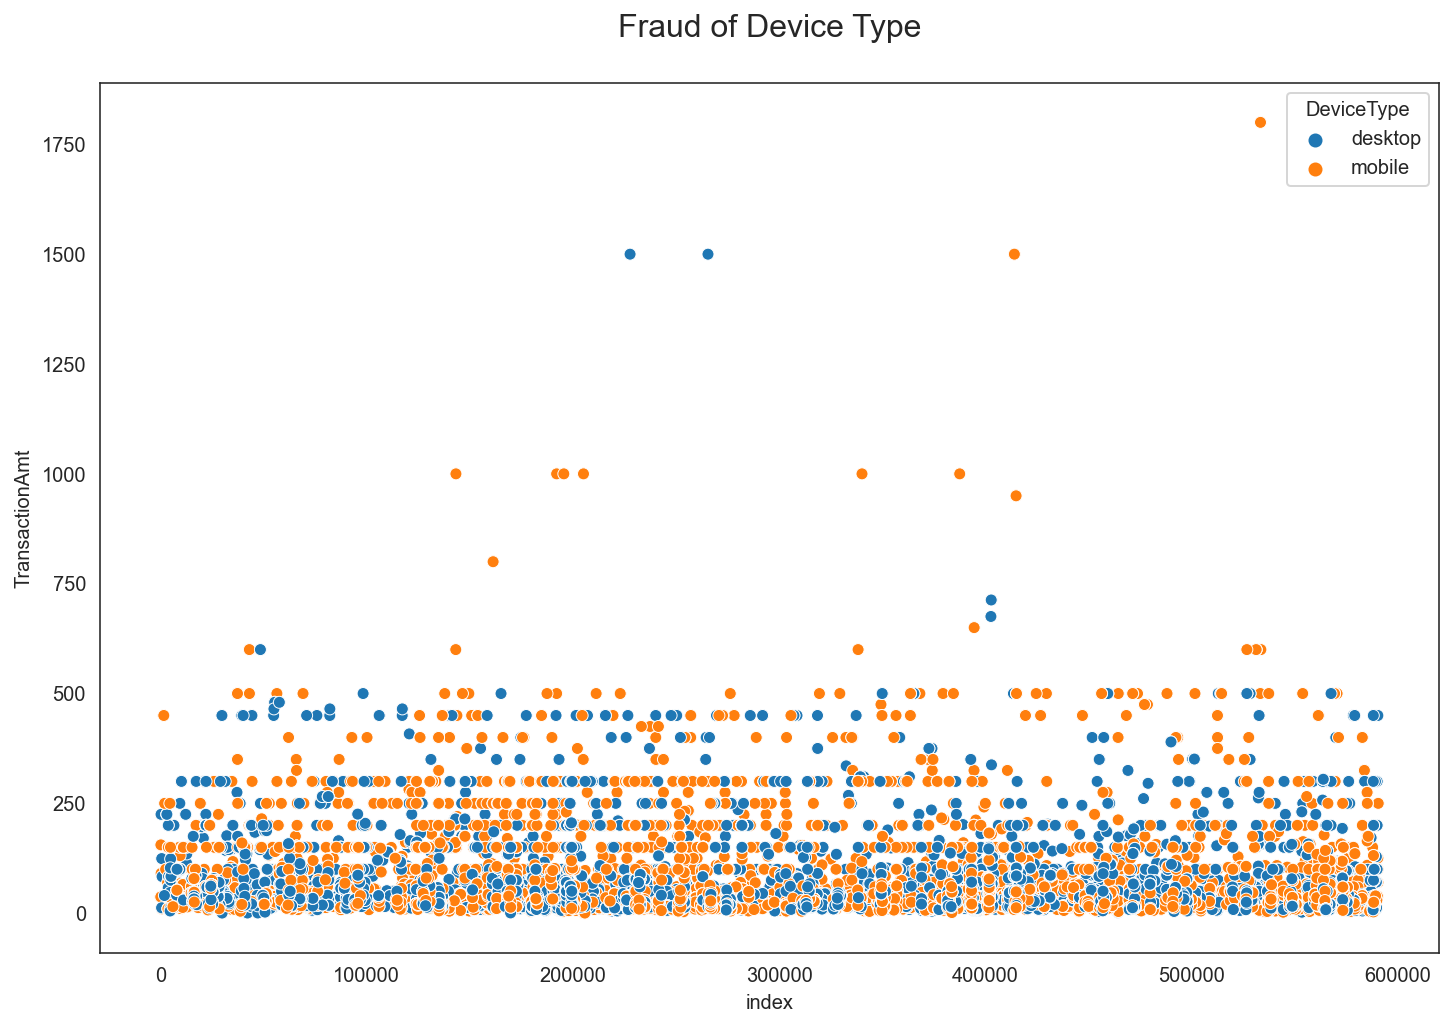

In [195]:
### The detail of fraud and not fraud of Card 6

plt.figure(figsize = (12,8))
sns.scatterplot(x='index', y='TransactionAmt', data = device1_fraud, hue = 'DeviceType')
plt.title('Fraud of Device Type\n',fontsize=16)

Text(0, 0.5, '%Fraud')

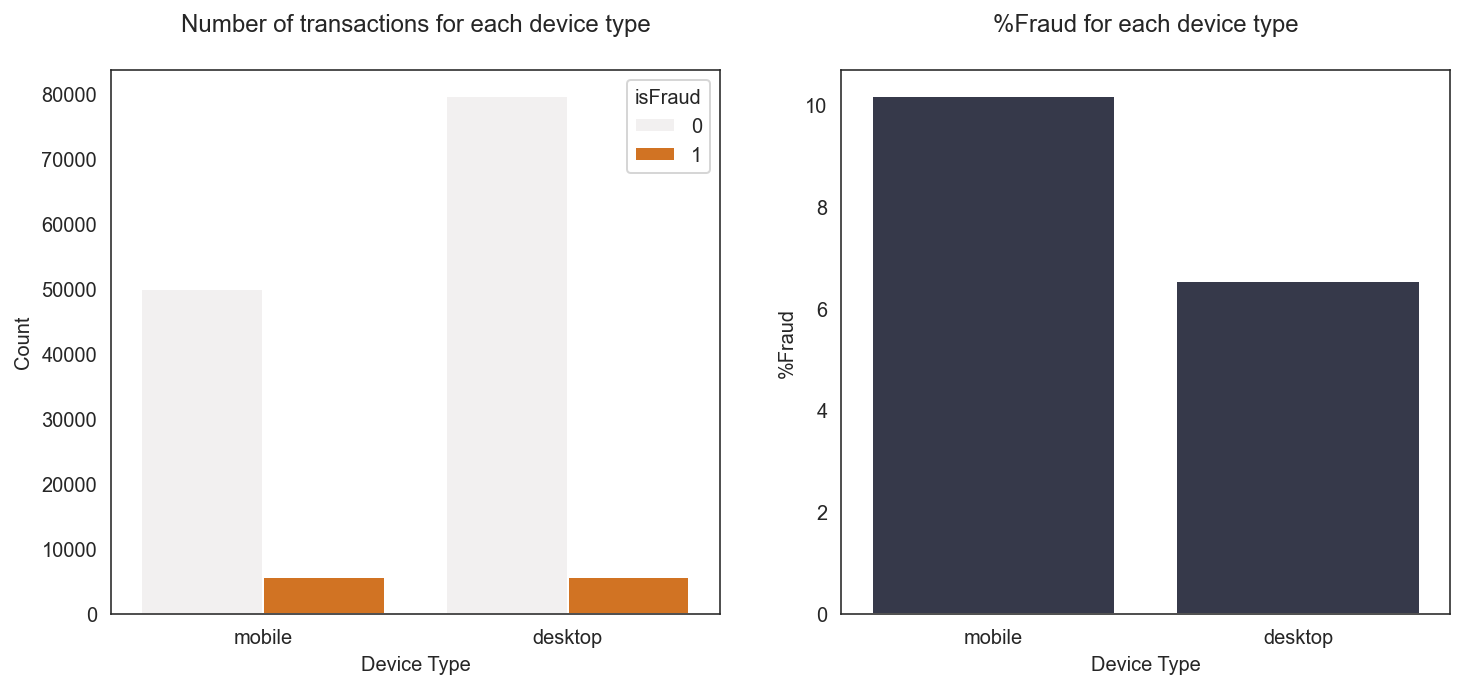

In [178]:
### Plot %fraud & total of transactions for device type

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1 = sns.countplot(x='DeviceType',data = train, hue='isFraud', color = '#ee7106', ax = ax1)
ax2 = sns.barplot(x='DeviceType', y ='Fraud',data = device11, color = '#33374d', order=['mobile','desktop'], ax = ax2)
ax1.set_title('Number of transactions for each device type\n');
ax1.set_xlabel('Device Type')
ax1.set_ylabel('Count')
ax2.set_title('%Fraud for each device type\n');
ax2.set_xlabel('Device Type')
ax2.set_ylabel('%Fraud')

Text(0.5, 1.0, 'Device Type\n')

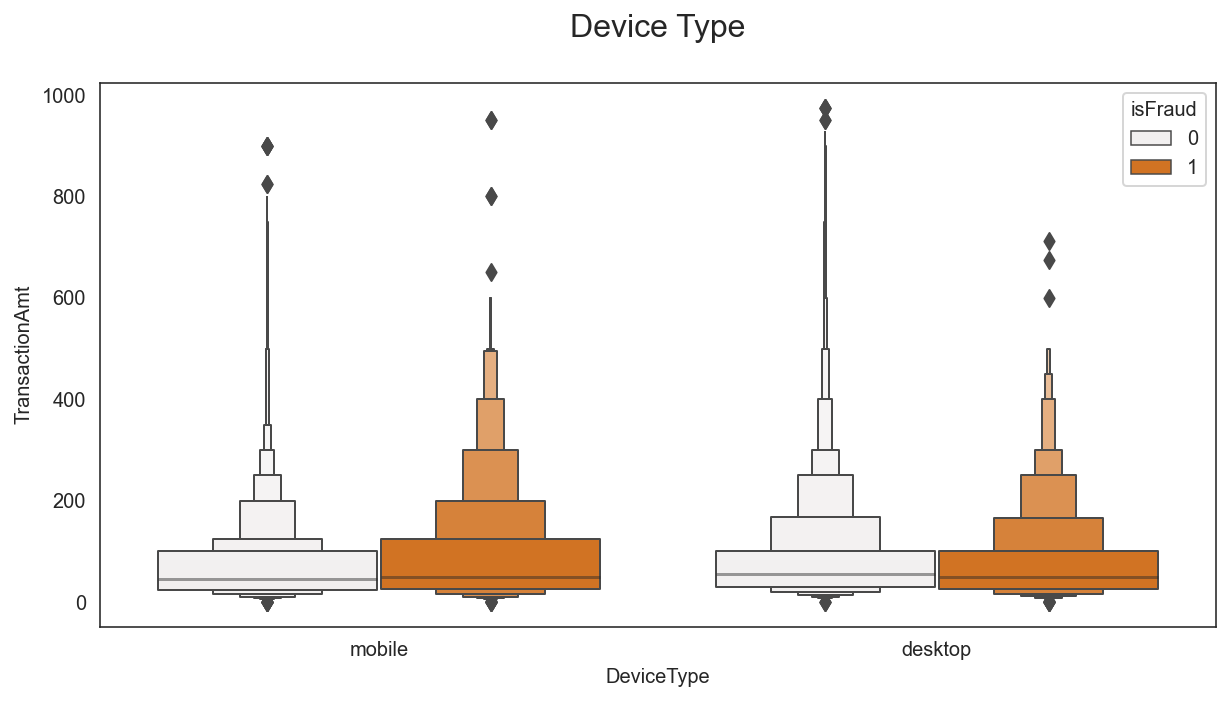

In [192]:
###Behavior of customer by transaction amount of Device type

plt.figure(figsize=(10,5))
sns.boxenplot(x = 'DeviceType', y = 'TransactionAmt', hue = 'isFraud', data = train[train['TransactionAmt'] < 1000], color = '#ee7106')
plt.title('Device Type\n',fontsize=16)

In [104]:
train_dev = train[train['DeviceType'].isnull()]
train_dev.groupby('ProductCD').count()

TransactionID  isFraud  TransactionDT  TransactionAmt   card1  \
ProductCD                                                                  
C                   7504     7504           7504            7504    7504   
H                    926      926            926             926     926   
R                   1270     1270           1270            1270    1270   
S                    360      360            360             360     360   
W                 439670   439670         439670          439670  439670   

            card2   card3   card4   card5   card6  ...  id_31  id_32  id_33  \
ProductCD                                          ...                        
C            7476    7481    7481    7251    7481  ...      0      0      0   
H             917     926     926     923     926  ...      1      0      0   
R            1260    1270    1270    1255    1270  ...     49      0      0   
S             357     360     360     360     360  ...      0      0      0   
W          431665  438299  438299  436617  438299  ...      0      0      0   

           id_34  id_35  id_36  id_37  id_38  DeviceType  DeviceInfo  
ProductCD                                                             
C              0      1      1      1      1           0           0  
H             46     48     48     48     48           0           1  
R             63    108    108    108    108           0          44  
S              8     18     18     18     18           0           0  
W              0      0      0      0      0           0           0  

[5 rows x 433 columns]

In [105]:
train.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

# Cleaning Train & Test Set

In [3]:
### Import data again

df_train_tran = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
df_train_id = pd.read_csv('ieee-fraud-detection/train_identity.csv')
df_test_tran = pd.read_csv('ieee-fraud-detection/test_transaction.csv')
df_test_id = pd.read_csv('ieee-fraud-detection/test_identity.csv')

In [4]:
print(df_train_tran.shape)
print(df_train_id.shape)
print(df_test_tran.shape)
print(df_test_id.shape)

(590540, 394)
(144233, 41)
(506691, 393)
(141907, 41)


## Train Set

In [5]:
train = pd.merge(df_train_tran, df_train_id, on='TransactionID', how='left')

In [6]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ...                id_31  \
0       13926    NaN  150.0    discover  142.0  ...                  NaN   
1        2755  404.0  150.0  mastercard  102.0  ...                  NaN   
2        4663  490.0  150.0        visa  166.0  ...                  NaN   
3       18132  567.0  150.0  mastercard  117.0  ...                  NaN   
4        4497  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   
...       ...    ...    ...         ...    ...  ...                  ...   
590535   6550    NaN  150.0        visa  226.0  ...                  NaN   
590536  10444  225.0  150.0  mastercard  224.0  ...                  NaN   
590537  12037  595.0  150.0  mastercard  224.0  ...                  NaN   
590538   7826  481.0  150.0  mastercard  224.0  ...                  NaN   
590539  15066  170.0  150.0  mastercard  102.0  ...                  NaN   

        id_32      id_33           id_34  id_35 id_36 id_37  id_38  \
0         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
1         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
2         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
3         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
4        32.0  2220x1080  match_status:2      T     F     T      T   
...       ...        ...             ...    ...   ...   ...    ...   
590535    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590536    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590537    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590538    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590539    NaN        NaN             NaN    NaN   NaN   NaN    NaN   

        DeviceType                     DeviceInfo  
0              NaN                            NaN  
1              NaN                            NaN  
2              NaN                            NaN  
3              NaN                            NaN  
4           mobile  SAMSUNG SM-G892A Build/NRD90M  
...            ...                            ...  
590535         NaN                            NaN  
590536         NaN                            NaN  
590537         NaN                            NaN  
590538         NaN                            NaN  
590539         NaN                            NaN  

[590540 rows x 434 columns]

In [7]:
### Separate null value with mode value

for col in train.columns:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)

In [8]:
### Grouping the email

train.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
train.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
train.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train.loc[train['P_emaildomain'].isin(train['P_emaildomain'].value_counts()[train['P_emaildomain'].value_counts() <= 10000 ].index), 'P_emaildomain'] = "Others"

In [9]:
train.P_emaildomain.value_counts()

Google           323307
Yahoo            102909
Microsoft         59477
Others            39560
anonymous.com     36998
aol.com           28289
Name: P_emaildomain, dtype: int64

In [10]:
### OneHotEncoding only categorical data from EDA
### Categorical data >> ProductCD, card4, card6, P_emaildomain, DeviceType

train_new = pd.get_dummies(train, columns = ['ProductCD', 'card4', 'P_emaildomain', 'DeviceType'])

In [11]:
train_new.drop(columns = ['TransactionID', 'TransactionDT'], inplace= True)

In [12]:
train_new

isFraud  TransactionAmt  card1  card2  card3  card5   card6  addr1  \
0             0           68.50  13926  321.0  150.0  142.0  credit  315.0   
1             0           29.00   2755  404.0  150.0  102.0  credit  325.0   
2             0           59.00   4663  490.0  150.0  166.0   debit  330.0   
3             0           50.00  18132  567.0  150.0  117.0   debit  476.0   
4             0           50.00   4497  514.0  150.0  102.0  credit  420.0   
...         ...             ...    ...    ...    ...    ...     ...    ...   
590535        0           49.00   6550  321.0  150.0  226.0   debit  272.0   
590536        0           39.50  10444  225.0  150.0  224.0   debit  204.0   
590537        0           30.95  12037  595.0  150.0  224.0   debit  231.0   
590538        0          117.00   7826  481.0  150.0  224.0   debit  387.0   
590539        0          279.95  15066  170.0  150.0  102.0  credit  299.0   

        addr2  dist1  ...  card4_mastercard card4_visa  P_emaildomain_Google  \
0        87.0   19.0  ...                 0          0                     1   
1        87.0    0.0  ...                 1          0                     1   
2        87.0  287.0  ...                 0          1                     0   
3        87.0    0.0  ...                 1          0                     0   
4        87.0    0.0  ...                 1          0                     1   
...       ...    ...  ...               ...        ...                   ...   
590535   87.0   48.0  ...                 0          1                     1   
590536   87.0    0.0  ...                 1          0                     1   
590537   87.0    0.0  ...                 1          0                     1   
590538   87.0    3.0  ...                 1          0                     0   
590539   87.0    0.0  ...                 1          0                     1   

        P_emaildomain_Microsoft  P_emaildomain_Others  P_emaildomain_Yahoo  \
0                             0                     0                    0   
1                             0                     0                    0   
2                             1                     0                    0   
3                             0                     0                    1   
4                             0                     0                    0   
...                         ...                   ...                  ...   
590535                        0                     0                    0   
590536                        0                     0                    0   
590537                        0                     0                    0   
590538                        0                     0                    0   
590539                        0                     0                    0   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   
...                             ...                    ...   
590535                            0                      0   
590536                            0                      0   
590537                            0                      0   
590538                            0                      1   
590539                            0                      0   

        DeviceType_desktop  DeviceType_mobile  
0                        1                  0  
1                        1                  0  
2                        1                  0  
3                        1                  0  
4                        0                  1  
...                    ...                ...  
590535                   1                  0  
590536                   1                  

In [13]:
### Use only numerical data into the model

train_new = train_new._get_numeric_data()

In [14]:
train_new

isFraud  TransactionAmt  card1  card2  card3  card5  addr1  addr2  \
0             0           68.50  13926  321.0  150.0  142.0  315.0   87.0   
1             0           29.00   2755  404.0  150.0  102.0  325.0   87.0   
2             0           59.00   4663  490.0  150.0  166.0  330.0   87.0   
3             0           50.00  18132  567.0  150.0  117.0  476.0   87.0   
4             0           50.00   4497  514.0  150.0  102.0  420.0   87.0   
...         ...             ...    ...    ...    ...    ...    ...    ...   
590535        0           49.00   6550  321.0  150.0  226.0  272.0   87.0   
590536        0           39.50  10444  225.0  150.0  224.0  204.0   87.0   
590537        0           30.95  12037  595.0  150.0  224.0  231.0   87.0   
590538        0          117.00   7826  481.0  150.0  224.0  387.0   87.0   
590539        0          279.95  15066  170.0  150.0  102.0  299.0   87.0   

        dist1  dist2  ...  card4_mastercard  card4_visa  P_emaildomain_Google  \
0        19.0    7.0  ...                 0           0                     1   
1         0.0    7.0  ...                 1           0                     1   
2       287.0    7.0  ...                 0           1                     0   
3         0.0    7.0  ...                 1           0                     0   
4         0.0    7.0  ...                 1           0                     1   
...       ...    ...  ...               ...         ...                   ...   
590535   48.0    7.0  ...                 0           1                     1   
590536    0.0    7.0  ...                 1           0                     1   
590537    0.0    7.0  ...                 1           0                     1   
590538    3.0    7.0  ...                 1           0                     0   
590539    0.0    7.0  ...                 1           0                     1   

        P_emaildomain_Microsoft  P_emaildomain_Others  P_emaildomain_Yahoo  \
0                             0                     0                    0   
1                             0                     0                    0   
2                             1                     0                    0   
3                             0                     0                    1   
4                             0                     0                    0   
...                         ...                   ...                  ...   
590535                        0                     0                    0   
590536                        0                     0                    0   
590537                        0                     0                    0   
590538                        0                     0                    0   
590539                        0                     0                    0   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   
...                             ...                    ...   
590535                            0                      0   
590536                            0                      0   
590537                            0                      0   
590538                            0                      1   
590539                            0                      0   

        DeviceType_desktop  DeviceType_mobile  
0                        1                  0  
1                        1                  0  
2                        1                  0  
3                        1                  0  
4                        0                  1  
...                    ...                ...  
590535                   1                  0  
590536                   1                  

## Test Set

In [15]:
test = pd.merge(df_test_tran, df_test_id, on='TransactionID', how='left')

In [16]:
### Separate null value with mode value

for col in test.columns:
    mode = test[col].mode()[0]
    test[col] = test[col].fillna(mode)

In [17]:
### Grouping the email

test.loc[test['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
test.loc[test['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
test.loc[test['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
test.loc[test['P_emaildomain'].isin(test['P_emaildomain'].value_counts()[test['P_emaildomain'].value_counts() <= 10000 ].index), 'P_emaildomain'] = "Others"

In [18]:
### OneHotEncoding only categorical data from EDA
### Categorical data >> ProductCD, card4, card6, P_emaildomain, DeviceType

test_new = pd.get_dummies(test, columns = ['ProductCD', 'card4', 'P_emaildomain', 'DeviceType'])

In [19]:
test_new.drop(columns = ['TransactionID', 'TransactionDT'], inplace= True)

In [20]:
test_new

TransactionAmt  card1  card2  card3  card5   card6  addr1  addr2  \
0               31.950  10409  111.0  150.0  226.0   debit  170.0   87.0   
1               49.000   4272  111.0  150.0  226.0   debit  299.0   87.0   
2              171.000   4476  574.0  150.0  226.0   debit  472.0   87.0   
3              284.950  10989  360.0  150.0  166.0   debit  205.0   87.0   
4               67.950  18018  452.0  150.0  117.0   debit  264.0   87.0   
...                ...    ...    ...    ...    ...     ...    ...    ...   
506686          94.679  13832  375.0  185.0  224.0   debit  284.0   60.0   
506687          12.173   3154  408.0  185.0  224.0   debit  299.0   87.0   
506688          49.000  16661  490.0  150.0  226.0   debit  327.0   87.0   
506689         202.000  16621  516.0  150.0  224.0   debit  177.0   87.0   
506690          24.346   5713  168.0  144.0  147.0  credit  299.0   87.0   

         dist1  dist2  ... card4_mastercard  card4_visa  P_emaildomain_Google  \
0          1.0    0.0  ...                0           1                     1   
1          4.0    0.0  ...                0           1                     0   
2       2635.0    0.0  ...                0           1                     0   
3         17.0    0.0  ...                0           1                     1   
4          6.0    0.0  ...                1           0                     1   
...        ...    ...  ...              ...         ...                   ...   
506686     0.0    0.0  ...                1           0                     1   
506687     0.0  157.0  ...                1           0                     0   
506688     0.0    0.0  ...                0           1                     0   
506689     0.0    0.0  ...                1           0                     0   
506690     0.0    0.0  ...                0           1                     0   

        P_emaildomain_Microsoft  P_emaildomain_Others  P_emaildomain_Yahoo  \
0                             0                     0                    0   
1                             0                     0                    0   
2                             1                     0                    0   
3                             0                     0                    0   
4                             0                     0                    0   
...                         ...                   ...                  ...   
506686                        0                     0                    0   
506687                        1                     0                    0   
506688                        1                     0                    0   
506689                        1                     0                    0   
506690                        1                     0                    0   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                                 0                      0   
1                                 0                      1   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   
...                             ...                    ...   
506686                            0                      0   
506687                            0                      0   
506688                            0                      0   
506689                            0                      0   
506690                            0                      0   

        DeviceType_desktop  DeviceType_mobile  
0                        1                  0  
1                        1                  0  
2                        1                  0  
3                        1                  0  
4                        1                  0  
...                    ...                ...  
506686                   1                  0  
506687                   0                  1  
506688  

In [21]:
### Use only numerical data into the model

test_new = test_new._get_numeric_data()

In [22]:
test_new

TransactionAmt  card1  card2  card3  card5  addr1  addr2   dist1  \
0               31.950  10409  111.0  150.0  226.0  170.0   87.0     1.0   
1               49.000   4272  111.0  150.0  226.0  299.0   87.0     4.0   
2              171.000   4476  574.0  150.0  226.0  472.0   87.0  2635.0   
3              284.950  10989  360.0  150.0  166.0  205.0   87.0    17.0   
4               67.950  18018  452.0  150.0  117.0  264.0   87.0     6.0   
...                ...    ...    ...    ...    ...    ...    ...     ...   
506686          94.679  13832  375.0  185.0  224.0  284.0   60.0     0.0   
506687          12.173   3154  408.0  185.0  224.0  299.0   87.0     0.0   
506688          49.000  16661  490.0  150.0  226.0  327.0   87.0     0.0   
506689         202.000  16621  516.0  150.0  224.0  177.0   87.0     0.0   
506690          24.346   5713  168.0  144.0  147.0  299.0   87.0     0.0   

        dist2   C1  ...  card4_mastercard  card4_visa  P_emaildomain_Google  \
0         0.0  6.0  ...                 0           1                     1   
1         0.0  3.0  ...                 0           1                     0   
2         0.0  2.0  ...                 0           1                     0   
3         0.0  5.0  ...                 0           1                     1   
4         0.0  6.0  ...                 1           0                     1   
...       ...  ...  ...               ...         ...                   ...   
506686    0.0  1.0  ...                 1           0                     1   
506687  157.0  1.0  ...                 1           0                     0   
506688    0.0  1.0  ...                 0           1                     0   
506689    0.0  1.0  ...                 1           0                     0   
506690    0.0  1.0  ...                 0           1                     0   

        P_emaildomain_Microsoft  P_emaildomain_Others  P_emaildomain_Yahoo  \
0                             0                     0                    0   
1                             0                     0                    0   
2                             1                     0                    0   
3                             0                     0                    0   
4                             0                     0                    0   
...                         ...                   ...                  ...   
506686                        0                     0                    0   
506687                        1                     0                    0   
506688                        1                     0                    0   
506689                        1                     0                    0   
506690                        1                     0                    0   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                                 0                      0   
1                                 0                      1   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   
...                             ...                    ...   
506686                            0                      0   
506687                            0                      0   
506688                            0                      0   
506689                            0                      0   
506690                            0                      0   

        DeviceType_desktop  DeviceType_mobile  
0                        1                  0  
1                        1                  0  
2                        1                  0  
3                        1                  0  
4                        1                  0  
...                    ...                ...  
506686                   1                  0  
506687                   0                  1  
506688                   1      

# Supervised Method

In [22]:
X = train_new.drop(columns= ['isFraud'])
y = train_new['isFraud']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=101)

In [24]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(472432, 417)
(118108, 417)
(472432,)
(118108,)


In [25]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

In [26]:
y_train.value_counts() ### Imbalance Data

0    455920
1     16512
Name: isFraud, dtype: int64

## SMOTE

In [53]:
### For solving the imbalance data

sm = SMOTE()

Xsm_train, ysm_train = sm.fit_resample(X_train_sc, y_train)

In [28]:
ysm_train.value_counts() ### Balance Data

0    455920
1    455920
Name: isFraud, dtype: int64

In [29]:
print(Xsm_train.shape)
print(X_val.shape)
print(ysm_train.shape)
print(y_val.shape)

(911840, 417)
(118108, 417)
(911840,)
(118108,)


## PCA

In [30]:
list(X_train.columns)

['TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',


In [31]:
columns_pca = [i for i in X_train.columns][5:]

In [32]:
X_train_pca1 = pd.DataFrame(Xsm_train, columns=X_train.columns)
X_val_pca1 = pd.DataFrame(X_val.reset_index(drop=True), columns=X_val.columns)

In [33]:
X_val_pca1

TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1  \
0                15.00  13734  491.0  150.0  226.0  337.0   87.0    0.0   
1                25.95  11207  361.0  150.0  226.0  325.0   87.0   11.0   
2                44.00   7919  194.0  150.0  202.0  327.0   87.0    0.0   
3                88.50   4249  555.0  150.0  102.0  325.0   87.0   59.0   
4                97.00   6481  111.0  150.0  226.0  251.0   87.0   17.0   
...                ...    ...    ...    ...    ...    ...    ...    ...   
118103           87.95   2803  100.0  150.0  226.0  315.0   87.0   86.0   
118104           56.95   2803  100.0  150.0  226.0  315.0   87.0   11.0   
118105          107.95   2755  404.0  150.0  102.0  143.0   87.0    0.0   
118106          445.00   6019  583.0  150.0  226.0  325.0   87.0    0.0   
118107           82.95   9500  321.0  150.0  226.0  330.0   87.0    3.0   

        dist2    C1  ...  card4_mastercard  card4_visa  P_emaildomain_Google  \
0         7.0   1.0  ...                 0           1                     1   
1         7.0   4.0  ...                 0           1                     0   
2         7.0   3.0  ...                 1           0                     1   
3         7.0   1.0  ...                 1           0                     0   
4         7.0   2.0  ...                 0           1                     1   
...       ...   ...  ...               ...         ...                   ...   
118103    7.0   5.0  ...                 0           1                     1   
118104    7.0   1.0  ...                 0           1                     1   
118105    7.0   4.0  ...                 1           0                     1   
118106    7.0   2.0  ...                 0           1                     0   
118107    7.0  13.0  ...                 0           1                     0   

        P_emaildomain_Microsoft  P_emaildomain_Others  P_emaildomain_Yahoo  \
0                             0                     0                    0   
1                             0                     0                    1   
2                             0                     0                    0   
3                             0                     0                    0   
4                             0                     0                    0   
...                         ...                   ...                  ...   
118103                        0                     0                    0   
118104                        0                     0                    0   
118105                        0                     0                    0   
118106                        0                     1                    0   
118107                        0                     0                    1   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 1                      0   
4                                 0                      0   
...                             ...                    ...   
118103                            0                      0   
118104                            0                      0   
118105                            0                      0   
118106                            0                      0   
118107                            0                      0   

        DeviceType_desktop  DeviceType_mobile  
0                        1                  0  
1                        1                  0  
2                        1                  0  
3                        1                  0  
4                        1                  0  
...                    ...                ...  
118103                   1                  0  
118104                   1                  0  
118105                   1      

In [34]:
X_val_pca1 = ss.transform(X_val_pca1)

In [35]:
X_val_pca1 = pd.DataFrame(X_val_pca1, columns = X_train_pca1.columns)
X_val_pca1

TransactionAmt     card1     card2    card3     card5     addr1  \
0            -0.497394  0.782725  0.822962 -0.28128  0.644887  0.471856   
1            -0.452031  0.267214 -0.006452 -0.28128  0.644887  0.346758   
2            -0.377256 -0.403542 -1.071929 -0.28128  0.062051  0.367608   
3            -0.192907 -1.152226  1.231288 -0.28128 -2.366432  0.346758   
4            -0.157695 -0.696895 -1.601478 -0.28128  0.644887 -0.424680   
...                ...       ...       ...      ...       ...       ...   
118103       -0.195186 -1.447212 -1.671659 -0.28128  0.644887  0.242510   
118104       -0.323608 -1.447212 -1.671659 -0.28128  0.644887  0.242510   
118105       -0.112332 -1.457004  0.267893 -0.28128 -2.366432 -1.550562   
118106        1.283955 -0.791144  1.409931 -0.28128  0.644887  0.346758   
118107       -0.215899 -0.081016 -0.261656 -0.28128  0.644887  0.398882   

           addr2     dist1     dist2        C1  ...  card4_mastercard  \
0       0.069716 -0.196397 -0.098731 -0.097862  ...         -0.686204   
1       0.069716 -0.151161 -0.098731 -0.075571  ...         -0.686204   
2       0.069716 -0.196397 -0.098731 -0.083001  ...          1.457293   
3       0.069716  0.046230 -0.098731 -0.097862  ...          1.457293   
4       0.069716 -0.126487 -0.098731 -0.090432  ...         -0.686204   
...          ...       ...       ...       ...  ...               ...   
118103  0.069716  0.157262 -0.098731 -0.068141  ...         -0.686204   
118104  0.069716 -0.151161 -0.098731 -0.097862  ...         -0.686204   
118105  0.069716 -0.196397 -0.098731 -0.075571  ...          1.457293   
118106  0.069716 -0.196397 -0.098731 -0.090432  ...         -0.686204   
118107  0.069716 -0.184060 -0.098731 -0.008700  ...         -0.686204   

        card4_visa  P_emaildomain_Google  P_emaildomain_Microsoft  \
0         0.726389              0.908578                -0.334339   
1         0.726389             -1.100621                -0.334339   
2        -1.376673              0.908578                -0.334339   
3        -1.376673             -1.100621                -0.334339   
4         0.726389              0.908578                -0.334339   
...            ...                   ...                      ...   
118103    0.726389              0.908578                -0.334339   
118104    0.726389              0.908578                -0.334339   
118105   -1.376673              0.908578                -0.334339   
118106    0.726389             -1.100621                -0.334339   
118107    0.726389             -1.100621                -0.334339   

        P_emaildomain_Others  P_emaildomain_Yahoo  \
0                  -0.267345            -0.459571   
1                  -0.267345             2.175941   
2                  -0.267345            -0.459571   
3                  -0.267345            -0.459571   
4                  -0.267345            -0.459571   
...                      ...                  ...   
118103             -0.267345            -0.459571   
118104             -0.267345            -0.459571   
118105             -0.267345            -0.459571   
118106              3.740478            -0.459571   
118107             -0.267345             2.175941   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                         -0.258581              -0.224322   
1                         -0.258581              -0.224322   
2                         -0.258581              -0.224322   
3                          3.867259              -0.224322   
4                         -0.258581              -0.224322   
...                             ...                    ...   
118103                    -0.258581              -0.224322   
118104                    -0.258581              -0.224322   
118105                    -0.258581              -0.224322   
118106                    -0.258581              -0.224322   
118107                    -0.258581              -0.224322   

        DeviceType_

In [36]:
X_train_pca = X_train_pca1[columns_pca]
X_val_pca = X_val_pca1[columns_pca]

In [37]:
print(X_train_pca.shape)
print(X_val_pca.shape)

(911840, 412)
(118108, 412)


In [38]:
pca = PCA()
X_pca = pca.fit_transform(X_train_pca)

In [ ]:
exp_variance = pca.explained_variance_ratio_
exp_variance[:50]

In [110]:
np.cumsum(pca.explained_variance_ratio_)[:50]

array([0.20506552, 0.31085464, 0.37465744, 0.42907011, 0.46923389,
       0.49517314, 0.52046998, 0.54480796, 0.56427247, 0.58098723,
       0.59643827, 0.61073344, 0.62413323, 0.63674569, 0.64904893,
       0.6612021 , 0.67289977, 0.68384704, 0.69400238, 0.70341313,
       0.71218915, 0.72043453, 0.72787999, 0.73515523, 0.74203229,
       0.74868393, 0.75489189, 0.76076997, 0.76633922, 0.77165604,
       0.77683475, 0.78183178, 0.78679643, 0.79146648, 0.79611558,
       0.80065836, 0.80498585, 0.80925421, 0.81325389, 0.81717616,
       0.82096837, 0.8246955 , 0.82829072, 0.83172649, 0.83494143,
       0.83807483, 0.84120279, 0.84424092, 0.84713202, 0.85000598])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of Components')

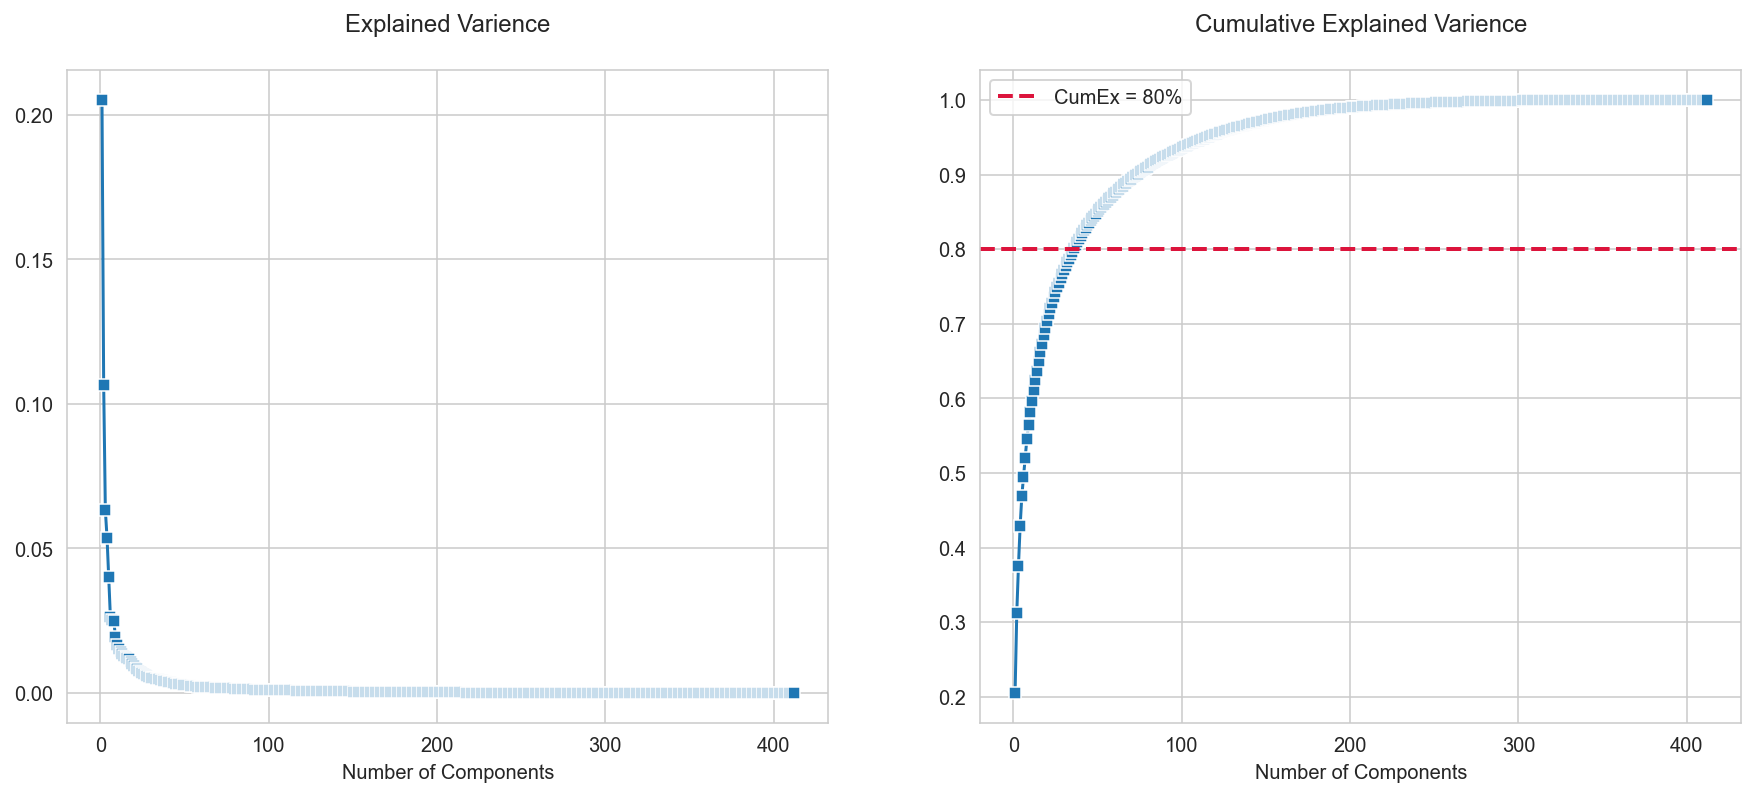

In [78]:
### Suitable number of components = 100 (Cumulative Explained Varience = 95%)

sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
x = list(range(1, len(exp_variance)+1));
ax1 = sns.lineplot(x, exp_variance, marker = 's', markersize=6, ax=ax1);
ax2 = sns.lineplot(x, np.cumsum(exp_variance), marker = 's', markersize=6, ax=ax2);
ax2.axhline(0.80,ls='--',lw=2,c='crimson',label='CumEx = 80%')
ax2.legend()
#plt.xticks(x);
ax1.set_title('Explained Varience\n');
ax1.set_xlabel('Number of Components')
ax2.set_title('Cumulative Explained Varience\n');
ax2.set_xlabel('Number of Components')

In [111]:
ysm_train_pca = pd.DataFrame(ysm_train, columns=['isFraud'])

In [112]:
df_pca = ysm_train_pca.copy()
df_pca['pca1'] = X_pca[:,0]
df_pca['pca2'] = X_pca[:,1]
df_pca['pca3'] = X_pca[:,2]
df_pca['pca4'] = X_pca[:,3]

In [113]:
df_pca.head()

isFraud      pca1       pca2      pca3       pca4
0        0 -4.556207   1.566596 -1.017223   0.967742
1        0 -1.947846   5.728228  0.504833  -0.678529
2        0 -9.167767 -10.800005 -1.587832   4.126752
3        0 -4.874528   1.333594 -1.797929   1.509959
4        0  3.139286  -7.786771  5.634346 -11.665222

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pca2', ylabel='Density'>

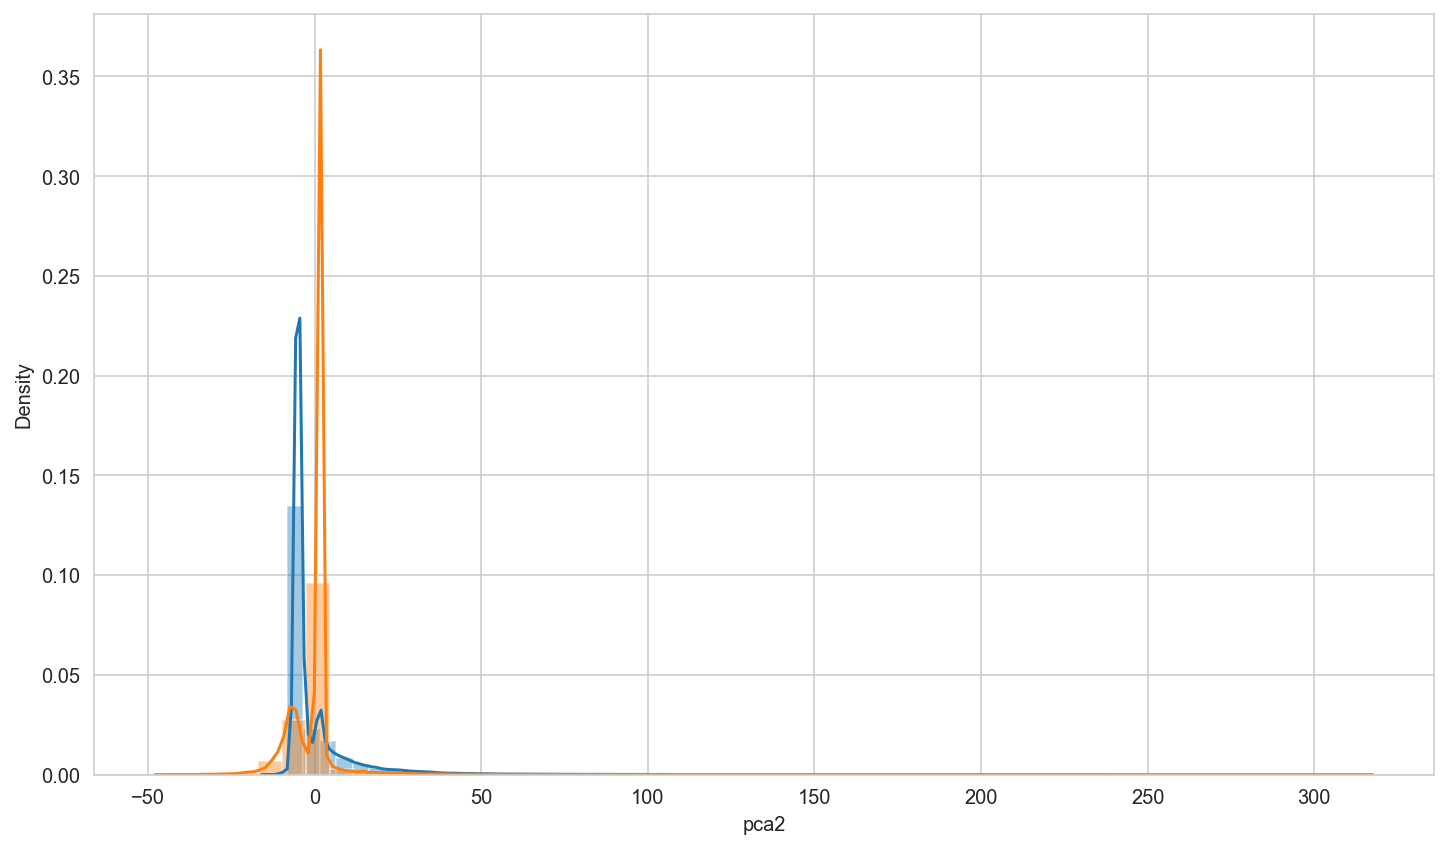

In [82]:
plt.figure(figsize=(12,7))
sns.distplot(df_pca['pca1'])
sns.distplot(df_pca['pca2'])

In [83]:
### From Cumulative Explained Varience = 95% --> n_components = 100

pca2 = PCA(n_components=100,random_state=1)
X_train_pca2 = pca2.fit_transform(X_train_pca)
X_val_pca2 = pca2.transform(X_val_pca)

In [84]:
column_pca = ['pca'+str(i) for i in range(1,101)]

X_train_pca2 = pd.DataFrame(X_train_pca2, columns = column_pca)
X_val_pca2 = pd.DataFrame(X_val_pca2, columns = column_pca)

X_train_pca2.head()

pca1       pca2      pca3       pca4      pca5      pca6      pca7  \
0 -4.543673   1.565321 -1.046306   0.946945 -0.392814 -0.035596  0.499342   
1 -1.947537   5.709598  0.497378  -0.644109  2.716137  0.579671 -0.534958   
2 -9.167878 -10.839463 -1.710649   4.097650  6.540354  4.403448  3.084639   
3 -4.860843   1.338207 -1.833636   1.455919 -0.827922 -0.109479  0.162452   
4  3.164799  -7.759718  5.959285 -11.553792 -0.925271 -1.122439 -0.084683   

       pca8      pca9     pca10  ...      pca39     pca40     pca41     pca42  \
0 -0.046502  1.060848  1.650102  ...   0.503292 -0.458069  0.503988 -0.260440   
1 -0.595203  3.187859  2.319327  ... -11.830431  6.614482  0.493654 -2.726187   
2  1.891849  3.773703  3.844243  ...  -0.079324  0.916447  2.566796  1.587063   
3 -0.286547 -1.130308  0.301137  ...  -0.119961 -0.212871 -0.215600 -0.477875   
4 -1.180577 -1.999252 -2.009115  ...   0.022483  1.954969 -0.605084  2.228865   

      pca43     pca44     pca45     pca46     pca47     pca48  
0 -0.770788 -0.574426 -0.584395 -1.577452 -1.247828  0.136217  
1  3.496272  3.589403 -0.071689 -2.562206 -1.072238  2.610955  
2 -2.412830  1.688703  0.525639  4.476392 -0.955491 -2.487203  
3 -0.175168  0.580241  0.096808  0.478445  0.829835 -0.129865  
4 -0.104001 -3.995976  3.758567 -7.757163  3.472864  2.239505  

[5 rows x 48 columns]

In [85]:
X_val_pca1

TransactionAmt     card1     card2    card3     card5     addr1  \
0            -0.497394  0.782725  0.822962 -0.28128  0.644887  0.471856   
1            -0.452031  0.267214 -0.006452 -0.28128  0.644887  0.346758   
2            -0.377256 -0.403542 -1.071929 -0.28128  0.062051  0.367608   
3            -0.192907 -1.152226  1.231288 -0.28128 -2.366432  0.346758   
4            -0.157695 -0.696895 -1.601478 -0.28128  0.644887 -0.424680   
...                ...       ...       ...      ...       ...       ...   
118103       -0.195186 -1.447212 -1.671659 -0.28128  0.644887  0.242510   
118104       -0.323608 -1.447212 -1.671659 -0.28128  0.644887  0.242510   
118105       -0.112332 -1.457004  0.267893 -0.28128 -2.366432 -1.550562   
118106        1.283955 -0.791144  1.409931 -0.28128  0.644887  0.346758   
118107       -0.215899 -0.081016 -0.261656 -0.28128  0.644887  0.398882   

           addr2     dist1     dist2        C1  ...  card4_mastercard  \
0       0.069716 -0.196397 -0.098731 -0.097862  ...         -0.686204   
1       0.069716 -0.151161 -0.098731 -0.075571  ...         -0.686204   
2       0.069716 -0.196397 -0.098731 -0.083001  ...          1.457293   
3       0.069716  0.046230 -0.098731 -0.097862  ...          1.457293   
4       0.069716 -0.126487 -0.098731 -0.090432  ...         -0.686204   
...          ...       ...       ...       ...  ...               ...   
118103  0.069716  0.157262 -0.098731 -0.068141  ...         -0.686204   
118104  0.069716 -0.151161 -0.098731 -0.097862  ...         -0.686204   
118105  0.069716 -0.196397 -0.098731 -0.075571  ...          1.457293   
118106  0.069716 -0.196397 -0.098731 -0.090432  ...         -0.686204   
118107  0.069716 -0.184060 -0.098731 -0.008700  ...         -0.686204   

        card4_visa  P_emaildomain_Google  P_emaildomain_Microsoft  \
0         0.726389              0.908578                -0.334339   
1         0.726389             -1.100621                -0.334339   
2        -1.376673              0.908578                -0.334339   
3        -1.376673             -1.100621                -0.334339   
4         0.726389              0.908578                -0.334339   
...            ...                   ...                      ...   
118103    0.726389              0.908578                -0.334339   
118104    0.726389              0.908578                -0.334339   
118105   -1.376673              0.908578                -0.334339   
118106    0.726389             -1.100621                -0.334339   
118107    0.726389             -1.100621                -0.334339   

        P_emaildomain_Others  P_emaildomain_Yahoo  \
0                  -0.267345            -0.459571   
1                  -0.267345             2.175941   
2                  -0.267345            -0.459571   
3                  -0.267345            -0.459571   
4                  -0.267345            -0.459571   
...                      ...                  ...   
118103             -0.267345            -0.459571   
118104             -0.267345            -0.459571   
118105             -0.267345            -0.459571   
118106              3.740478            -0.459571   
118107             -0.267345             2.175941   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                         -0.258581              -0.224322   
1                         -0.258581              -0.224322   
2                         -0.258581              -0.224322   
3                          3.867259              -0.224322   
4                         -0.258581              -0.224322   
...                             ...                    ...   
118103                    -0.258581              -0.224322   
118104                    -0.258581              -0.224322   
118105                    -0.258581              -0.224322   
118106                    -0.258581              -0.224322   
118107                    -0.258581              -0.224322   

        DeviceType_

In [86]:
print(X_train_pca2.shape)
print(X_val_pca2.shape)

(911840, 48)
(118108, 48)


In [87]:
X_train_pca11 = X_train_pca1.drop(columns = columns_pca)
X_val_pca11 = X_val_pca1.reset_index(drop=True).drop(columns = columns_pca)

In [88]:
X_train_pca2 = pd.concat([X_train_pca11, X_train_pca2],axis=1)
X_val_pca2 = pd.concat([X_val_pca11, X_val_pca2],axis=1)

In [89]:
X_val_pca2

TransactionAmt     card1     card2    card3     card5      pca1  \
0            -0.497394  0.782725  0.822962 -0.28128  0.644887 -4.771226   
1            -0.452031  0.267214 -0.006452 -0.28128  0.644887 -5.405584   
2            -0.377256 -0.403542 -1.071929 -0.28128  0.062051 -5.160020   
3            -0.192907 -1.152226  1.231288 -0.28128 -2.366432 -4.747051   
4            -0.157695 -0.696895 -1.601478 -0.28128  0.644887 -5.200818   
...                ...       ...       ...      ...       ...       ...   
118103       -0.195186 -1.447212 -1.671659 -0.28128  0.644887 -5.333567   
118104       -0.323608 -1.447212 -1.671659 -0.28128  0.644887 -5.475160   
118105       -0.112332 -1.457004  0.267893 -0.28128 -2.366432 -3.691808   
118106        1.283955 -0.791144  1.409931 -0.28128  0.644887 -5.304062   
118107       -0.215899 -0.081016 -0.261656 -0.28128  0.644887 -5.331047   

            pca2      pca3      pca4      pca5  ...     pca39     pca40  \
0       1.603148 -1.697024  1.398292 -0.249119  ...  0.623357  0.738587   
1       1.895680 -2.578999  2.444788 -0.821077  ...  0.167554  0.151271   
2       1.640753 -1.613838  3.349524 -0.133162  ... -0.086576 -0.461903   
3       1.146294 -1.694249  1.186370 -1.079157  ... -0.388399 -0.428542   
4       1.796713 -2.270949  2.162769 -0.578192  ...  0.349308  0.556568   
...          ...       ...       ...       ...  ...       ...       ...   
118103  1.578097 -2.510939  2.377757 -1.396846  ... -0.576396 -0.128731   
118104  1.947529 -2.680542  2.667815 -1.255417  ...  0.134398  0.518529   
118105 -0.082441  2.767652  7.227059 -0.537488  ... -1.392139  1.008710   
118106  1.794723 -2.194148  2.953236  1.989552  ... -0.311328  0.067175   
118107  1.816658 -2.463519  2.317454 -0.875193  ...  0.126609  0.184599   

           pca41     pca42     pca43     pca44     pca45     pca46     pca47  \
0       0.679869  1.091198  0.746841  0.265666 -1.090272 -0.834877  1.228009   
1       0.328619  1.069783  0.166388 -0.487277 -1.074668  0.026143 -0.148161   
2       0.296360  0.761074  0.571397  0.741362  0.869838  1.175993 -2.972003   
3      -0.170039 -0.675161 -0.436620  0.856633  1.240158  0.319228  1.258548   
4      -0.440382 -0.049300  0.672200 -0.290994 -0.792927  0.182899 -0.082629   
...          ...       ...       ...       ...       ...       ...       ...   
118103 -0.580618 -1.462878 -0.749799 -0.200609  1.824821 -1.482809  1.267711   
118104 -0.051623  0.223853  0.250948 -0.391114 -0.492560 -0.751515  0.247604   
118105  1.066969  0.801540  0.741149 -1.745841  0.383221  0.925391 -3.847998   
118106 -0.238647 -0.741358 -0.542242 -1.756232 -0.540952 -0.395094 -0.441988   
118107 -0.051950  0.395254  0.345987 -0.468894 -0.160409 -0.166404  0.382205   

           pca48  
0      -0.920525  
1      -0.822437  
2      -0.665607  
3       0.643196  
4      -0.544029  
...          ...  
118103  1.572607  
118104  0.107331  
118105  3.563957  
118106 -0.014555  
118107  0.173041  

[118108 rows x 53 columns]

In [90]:
print(X_train_pca2.shape)
print(X_val_pca2.shape)

(911840, 53)
(118108, 53)


In [91]:
Xsm_train = X_train_pca2
X_val_sc = X_val_pca2

## Decision Tree

In [128]:
tree = DecisionTreeClassifier(random_state=101)
tree.fit(Xsm_train, ysm_train)

DecisionTreeClassifier(random_state=101)

In [129]:
pred_proba_tree = tree.predict_proba(X_val_sc)
pred_proba_tree[:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [130]:
pred_tree = tree.predict(X_val_sc)

In [131]:
pred_proba_tree = pd.DataFrame(pred_proba_tree).reset_index().rename(columns={'index':'Id',0:'NoFraud',1:'Fraud'})
pred_proba_tree['Id'] = [i for i in range(1,len(pred_proba_tree)+1)]
pred_proba_tree = pred_proba_tree.drop(columns=['NoFraud'])

In [132]:
pred_proba_tree.head(10)

Id  Fraud
0   1    0.0
1   2    0.0
2   3    0.0
3   4    0.0
4   5    0.0
5   6    0.0
6   7    0.0
7   8    0.0
8   9    1.0
9  10    1.0

In [133]:
tree.score(Xsm_train, ysm_train)

0.9999649061238813

In [134]:
tree.score(X_val_sc, y_val)

0.9135790970975717

In [135]:
print(f'AUC score = {roc_auc_score(y_val, pred_tree)}')
print(f'f1 score = {f1_score(y_val, pred_tree)}')
print(f'Precision score = {precision_score(y_val, pred_tree)}')
print(f'Recall score = {recall_score(y_val, pred_tree)}')

AUC score = 0.7271472826246002
f1 score = 0.2998833939227656
Precision score = 0.20962792481779824
Recall score = 0.5266200915442062


In [136]:
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_val.ravel(), pred_tree.ravel())
roc_auc = auc(fpr, tpr)

In [137]:
roc_auc

0.7271472826246002

Text(0.5, 0, 'False positive')

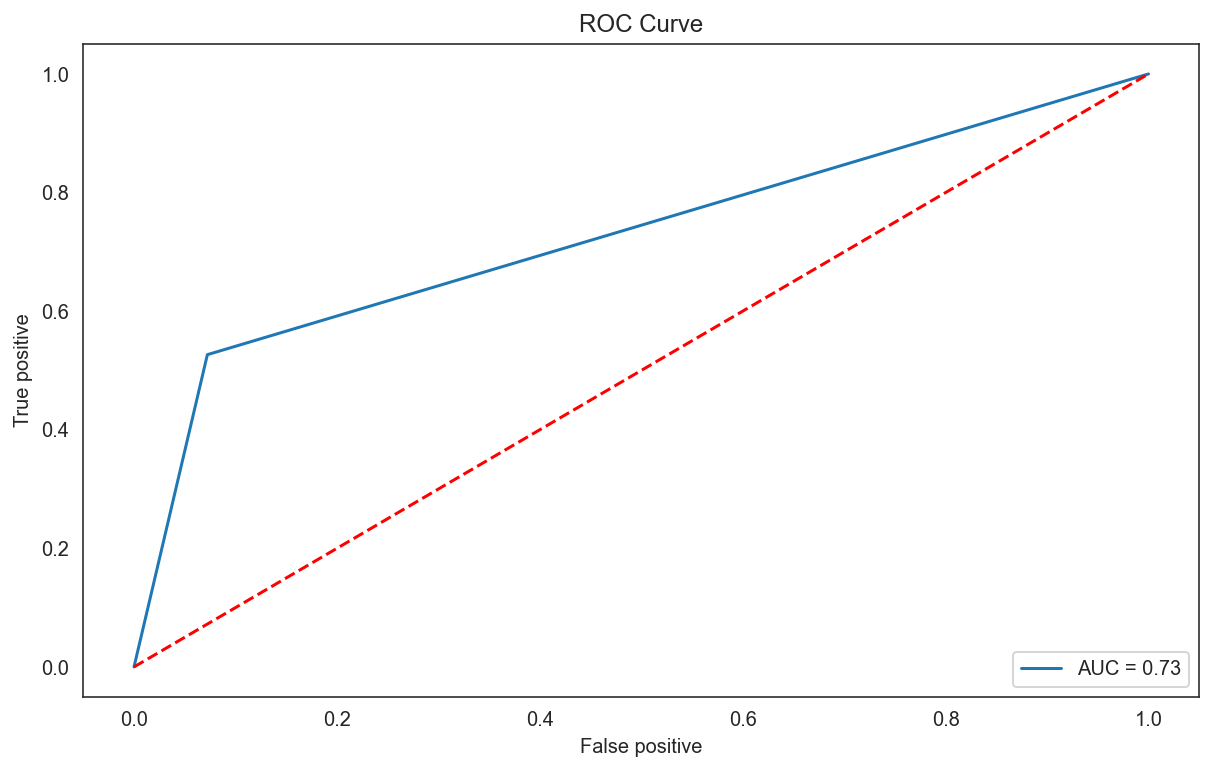

In [138]:
#Plotting ROC Curve
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.ylabel('True positive')
plt.xlabel('False positive')

In [139]:
print(classification_report(y_val, pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95    113957
           1       0.21      0.53      0.30      4151

    accuracy                           0.91    118108
   macro avg       0.60      0.73      0.63    118108
weighted avg       0.95      0.91      0.93    118108



<Figure size 360x324 with 0 Axes>

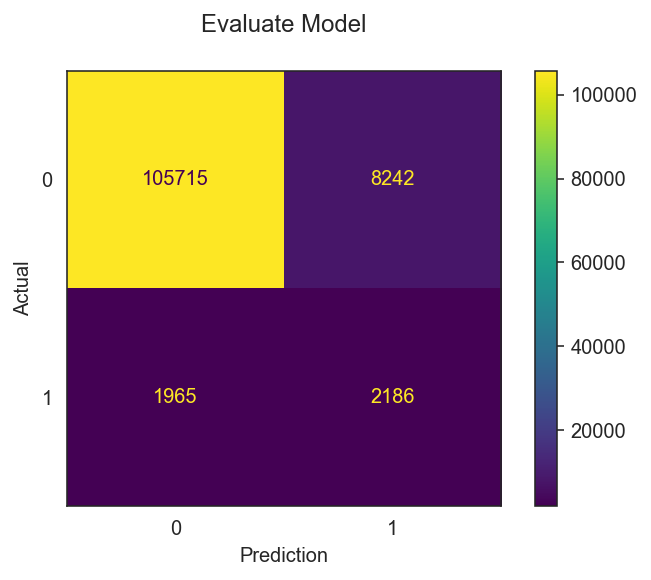

In [140]:
plt.figure(figsize = (5, 4.5))
disp = plot_confusion_matrix(tree, X_val_sc, y_val,cmap = plt.cm.viridis)
plt.title('Evaluate Model\n')
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(disp)

In [141]:
tn, fp, fn, tp = confusion_matrix(y_val,pred_tree).ravel()
print('Correctly Predict that Wnv is Positive (TP):',tp)
print('Correctly Predict that Wnv is Negative (TN):',tn)
print('Incorrectly Predict that Wnv is Positive (FP):',fp)
print('Incorrectly Predict that Wnv is Negative (FN):',fn)

Correctly Predict that Wnv is Positive (TP): 2186
Correctly Predict that Wnv is Negative (TN): 105715
Incorrectly Predict that Wnv is Positive (FP): 8242
Incorrectly Predict that Wnv is Negative (FN): 1965


In [142]:
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.9136
Misclassification rate: 0.0864
Precision: 0.2096
Recall: 0.5266
Specificity: 0.9277


In [143]:
### Find the features importance (Top15)

importance = pd.DataFrame(tree.feature_importances_, index = X_train_pca2.columns, columns = ['coef'])
importance.sort_values(by='coef',ascending=False).head(15)

coef
pca1            0.175753
TransactionAmt  0.133815
pca5            0.065292
card2           0.054716
card1           0.045459
card5           0.040637
pca22           0.032661
pca10           0.022490
pca19           0.017603
pca28           0.015471
pca4            0.014553
pca8            0.014539
pca14           0.012253
pca46           0.012248
pca3            0.011910

In [145]:
### Find the features importance (coef = 0)

importance = pd.DataFrame(tree.feature_importances_, index = X_train_pca2.columns, columns = ['coef'])
importance.sort_values(by='coef')
importance[importance['coef']==0]

Empty DataFrame
Columns: [coef]
Index: []

## Random Forest

In [146]:
clf = RandomForestClassifier(n_estimators=200,min_samples_split=11,min_samples_leaf=7, max_features=2,max_depth= 90,random_state=101)
clf.fit(Xsm_train, ysm_train)

RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=7,
                       min_samples_split=11, n_estimators=200,
                       random_state=101)

In [147]:
pred_proba_clf = clf.predict_proba(X_val_sc)
pred_proba_clf[:20]

array([[0.96112674, 0.03887326],
       [0.94141656, 0.05858344],
       [0.81521189, 0.18478811],
       [0.96195998, 0.03804002],
       [0.91726365, 0.08273635],
       [0.74023514, 0.25976486],
       [0.75880366, 0.24119634],
       [0.79614088, 0.20385912],
       [0.34609988, 0.65390012],
       [0.24585784, 0.75414216],
       [0.96621663, 0.03378337],
       [0.84690606, 0.15309394],
       [0.67992607, 0.32007393],
       [0.69150512, 0.30849488],
       [0.88876746, 0.11123254],
       [0.72814414, 0.27185586],
       [0.95263367, 0.04736633],
       [0.99468954, 0.00531046],
       [0.54473586, 0.45526414],
       [0.9492109 , 0.0507891 ]])

In [148]:
pred_clf = clf.predict(X_val_sc)

In [149]:
pred_proba_clf = pd.DataFrame(pred_proba_clf).reset_index().rename(columns={'index':'Id',0:'NoFraud',1:'Fraud'})
pred_proba_clf['Id'] = [i for i in range(1,len(pred_proba_clf)+1)]
pred_proba_clf = pred_proba_clf.drop(columns=['NoFraud'])

In [150]:
pred_proba_clf.head(10)

Id     Fraud
0   1  0.038873
1   2  0.058583
2   3  0.184788
3   4  0.038040
4   5  0.082736
5   6  0.259765
6   7  0.241196
7   8  0.203859
8   9  0.653900
9  10  0.754142

In [151]:
clf.score(Xsm_train, ysm_train)

0.9884223109317424

In [152]:
clf.score(X_val_sc, y_val)

0.946413452094693

In [153]:
print(f'AUC score = {roc_auc_score(y_val, pred_clf)}')
print(f'f1 score = {f1_score(y_val, pred_clf)}')
print(f'Precision score = {precision_score(y_val, pred_clf)}')
print(f'Recall score = {recall_score(y_val, pred_clf)}')

AUC score = 0.8019629835102421
f1 score = 0.4589210908780029
Precision score = 0.3556851311953353
Recall score = 0.6465911828475066


In [154]:
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_val.ravel(), pred_clf.ravel())
roc_auc = auc(fpr, tpr)

In [155]:
roc_auc

0.8019629835102421

Text(0.5, 0, 'False positive')

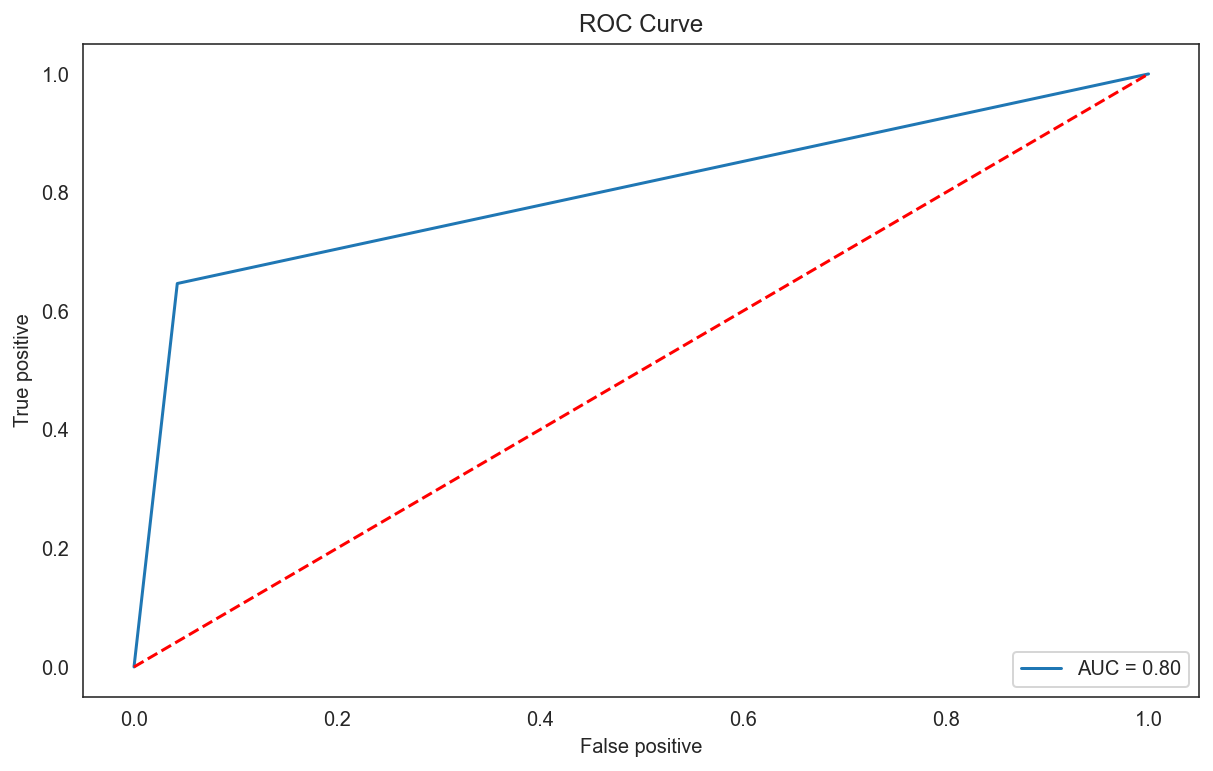

In [156]:
#Plotting ROC Curve
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.ylabel('True positive')
plt.xlabel('False positive')

In [157]:
print(classification_report(y_val, pred_clf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    113957
           1       0.36      0.65      0.46      4151

    accuracy                           0.95    118108
   macro avg       0.67      0.80      0.72    118108
weighted avg       0.96      0.95      0.95    118108



<Figure size 360x324 with 0 Axes>

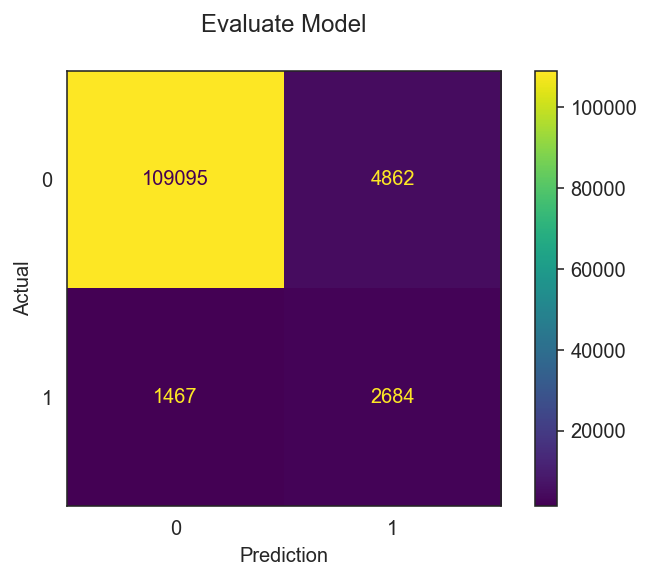

In [158]:
plt.figure(figsize = (5, 4.5))
disp = plot_confusion_matrix(clf, X_val_sc, y_val,cmap = plt.cm.viridis)
plt.title('Evaluate Model\n')
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(disp)

In [159]:
tn, fp, fn, tp = confusion_matrix(y_val,pred_clf).ravel()
print('Correctly Predict that Wnv is Positive (TP):',tp)
print('Correctly Predict that Wnv is Negative (TN):',tn)
print('Incorrectly Predict that Wnv is Positive (FP):',fp)
print('Incorrectly Predict that Wnv is Negative (FN):',fn)

Correctly Predict that Wnv is Positive (TP): 2684
Correctly Predict that Wnv is Negative (TN): 109095
Incorrectly Predict that Wnv is Positive (FP): 4862
Incorrectly Predict that Wnv is Negative (FN): 1467


In [160]:
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.9464
Misclassification rate: 0.0536
Precision: 0.3557
Recall: 0.6466
Specificity: 0.9573


In [161]:
### Find the features importance (Top15)

importance = pd.DataFrame(clf.feature_importances_, index = X_train_pca2.columns, columns = ['coef'])
importance.sort_values(by='coef',ascending=False).head(15)

coef
pca1            0.046994
TransactionAmt  0.030595
pca4            0.028462
pca2            0.028360
pca8            0.027054
pca3            0.026353
pca5            0.025553
card3           0.025175
pca15           0.022799
card2           0.022594
card1           0.021838
pca9            0.021777
pca6            0.021320
pca7            0.021150
pca19           0.020698

In [162]:
### Find the features importance (coef = 0)

importance = pd.DataFrame(clf.feature_importances_, index = X_train_pca2.columns, columns = ['coef'])
importance.sort_values(by='coef')
importance[importance['coef']==0]

Empty DataFrame
Columns: [coef]
Index: []

## Gradient Boosting

In [110]:
gb = GradientBoostingClassifier(n_estimators=200, random_state=101)
gb.fit(Xsm_train, ysm_train)

GradientBoostingClassifier(n_estimators=200, random_state=101)

In [111]:
pred_proba_gb = gb.predict_proba(X_val_sc)
pred_proba_gb[:20]

array([[0.65527055, 0.34472945],
       [0.91065842, 0.08934158],
       [0.73543763, 0.26456237],
       [0.89582229, 0.10417771],
       [0.81333648, 0.18666352],
       [0.64310789, 0.35689211],
       [0.90771442, 0.09228558],
       [0.81823605, 0.18176395],
       [0.64399016, 0.35600984],
       [0.34205421, 0.65794579],
       [0.84352723, 0.15647277],
       [0.98547117, 0.01452883],
       [0.5724651 , 0.4275349 ],
       [0.56134569, 0.43865431],
       [0.85212919, 0.14787081],
       [0.84054978, 0.15945022],
       [0.80091907, 0.19908093],
       [0.98286208, 0.01713792],
       [0.72572444, 0.27427556],
       [0.81104801, 0.18895199]])

In [112]:
pred_gb = gb.predict(X_val_sc)

In [113]:
pred_proba_gb = pd.DataFrame(pred_proba_gb).reset_index().rename(columns={'index':'Id',0:'NoFraud',1:'Fraud'})
pred_proba_gb['Id'] = [i for i in range(1,len(pred_proba_gb)+1)]
pred_proba_gb = pred_proba_gb.drop(columns=['NoFraud'])

In [114]:
pred_proba_gb.head(10)

Id     Fraud
0   1  0.344729
1   2  0.089342
2   3  0.264562
3   4  0.104178
4   5  0.186664
5   6  0.356892
6   7  0.092286
7   8  0.181764
8   9  0.356010
9  10  0.657946

In [115]:
gb.score(Xsm_train, ysm_train)

0.8457689945604492

In [116]:
gb.score(X_val_sc, y_val)

0.8564110813831408

In [117]:
print(f'AUC score = {roc_auc_score(y_val, pred_gb)}')
print(f'f1 score = {f1_score(y_val, pred_gb)}')
print(f'Precision score = {precision_score(y_val, pred_gb)}')
print(f'Recall score = {recall_score(y_val, pred_gb)}')

AUC score = 0.7664648512315588
f1 score = 0.246902615569075
Precision score = 0.15135017421602787
Recall score = 0.669718140207179


In [118]:
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_val.ravel(), pred_gb.ravel())
roc_auc = auc(fpr, tpr)

In [119]:
roc_auc

0.7664648512315588

Text(0.5, 0, 'False positive')

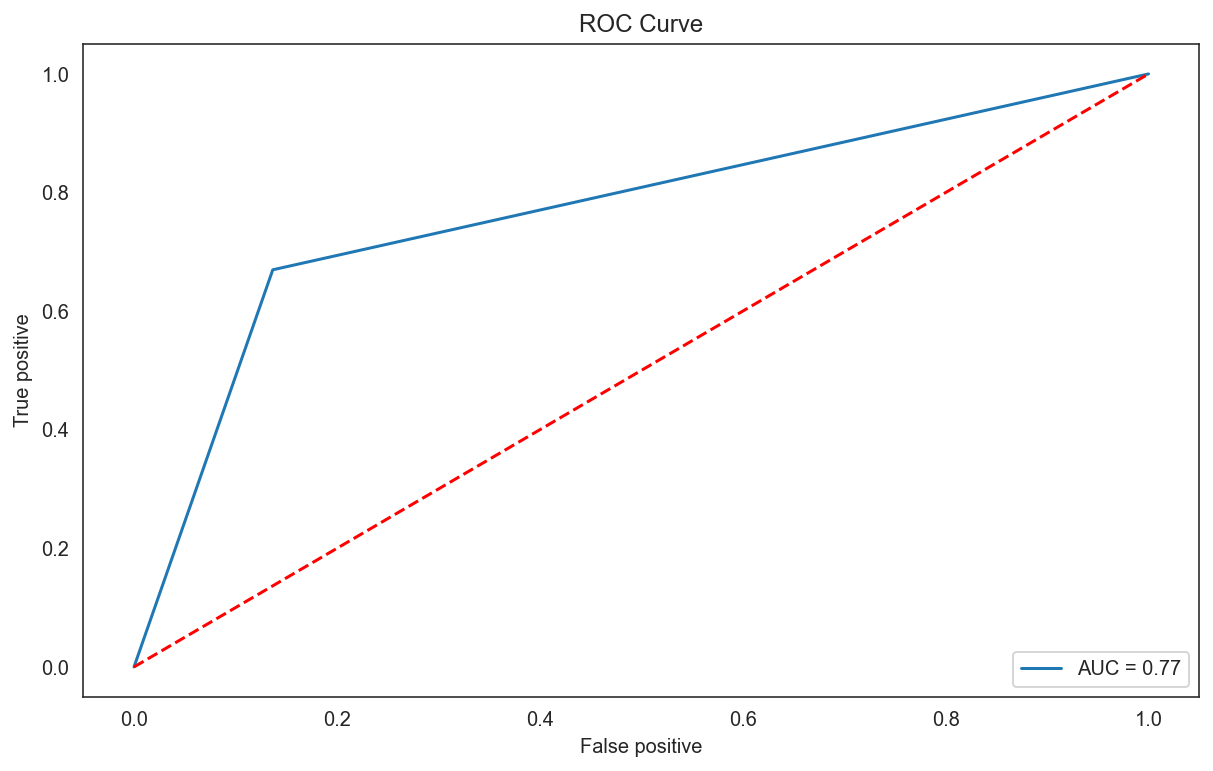

In [120]:
#Plotting ROC Curve
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.ylabel('True positive')
plt.xlabel('False positive')

In [121]:
print(classification_report(y_val, pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92    113957
           1       0.15      0.67      0.25      4151

    accuracy                           0.86    118108
   macro avg       0.57      0.77      0.58    118108
weighted avg       0.96      0.86      0.90    118108



<Figure size 360x324 with 0 Axes>

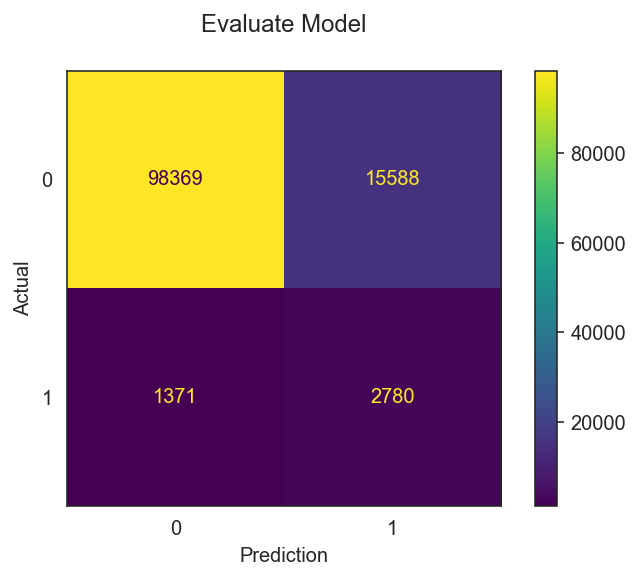

In [122]:
plt.figure(figsize = (5, 4.5))
disp = plot_confusion_matrix(gb, X_val_sc, y_val,cmap = plt.cm.viridis)
plt.title('Evaluate Model\n')
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(disp)

In [123]:
tn, fp, fn, tp = confusion_matrix(y_val,pred_gb).ravel()
print('Correctly Predict that Wnv is Positive (TP):',tp)
print('Correctly Predict that Wnv is Negative (TN):',tn)
print('Incorrectly Predict that Wnv is Positive (FP):',fp)
print('Incorrectly Predict that Wnv is Negative (FN):',fn)

Correctly Predict that Wnv is Positive (TP): 2780
Correctly Predict that Wnv is Negative (TN): 98369
Incorrectly Predict that Wnv is Positive (FP): 15588
Incorrectly Predict that Wnv is Negative (FN): 1371


In [124]:
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.8564
Misclassification rate: 0.1436
Precision: 0.1514
Recall: 0.6697
Specificity: 0.8632


In [125]:
### Find the features importance (Top15)

importance = pd.DataFrame(gb.feature_importances_, index = X_train_pca2.columns, columns = ['coef'])
importance.sort_values(by='coef',ascending=False).head(15)

coef
pca1            0.332523
TransactionAmt  0.118710
card5           0.101298
pca5            0.077193
card2           0.069699
pca19           0.047118
card1           0.042295
pca4            0.022550
pca16           0.022124
card3           0.021801
pca12           0.020077
pca10           0.019476
pca25           0.011267
pca22           0.010153
pca28           0.009983

In [127]:
### Find the features importance (coef = 0)

importance = pd.DataFrame(gb.feature_importances_, index = X_train_pca2.columns, columns = ['coef'])
importance.sort_values(by='coef')
importance[importance['coef']==0]

coef
pca20   0.0
pca41   0.0

# AutoEncoder (Unsupervised)

An autoencoder is a feed-forward multilayer neural network that reproduces the input data on the output layer. By definition then, the number of output units must be the same as the number of input units. The autoencoder is usually trained using the backpropagation algorithm against a loss function, like the mean squared error (MSE).

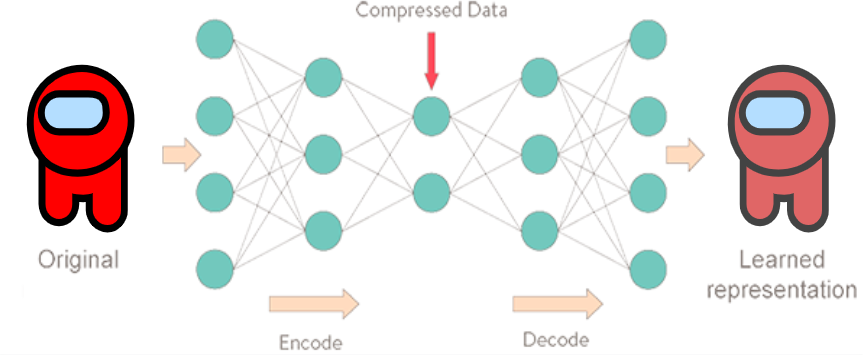

In [23]:
#Split data for training and testing
#Filtering only "Not Fraud" data into the model for training the model with only not fraud data
#The fraud transaction will have higher MSE than not fraud transaction
#Need not to SMOTE for imbalance data

train, test = train_test_split(train_new, test_size = 0.2, random_state = 101)
X_train = train[train['isFraud'] == 0]
X_train = X_train.drop(['isFraud'], axis = 1)
X_val = test.drop(['isFraud'], axis = 1)
y_val = test['isFraud']

In [24]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

In [25]:
print(X_train_sc.shape)
print(X_val_sc.shape)
#print(y_train.shape)
print(y_val.shape)

(455920, 417)
(118108, 417)
(118108,)


In [26]:
#Autoencoder model
lr_rate = 0.01
epoch = 35
batch_size = 8000
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience = 5, mode='auto')
#leaky_relu = LeakyReLU(alpha=0.01)
#adam = Adam(lr=lr_rate, decay=(lr_rate/epoch))

def autoencoder_model(x):
    input_layer = Input(shape = (x.shape[1], ))
    encoder = Dense(x.shape[1] // 2, activation = 'tanh', use_bias = True, activity_regularizer = regularizers.l2(lr_rate))(input_layer)
    #encoder = Dropout(0.05)(encoder)
    encoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
    #encoder = Dense(x.shape[1] // 6, activation = leaky_relu)(encoder)
    #encoder = Dense(x.shape[1] // 8, activation = 'relu')(encoder)
    #decoder = Dense(x.shape[1] // 8, activation = 'relu')(encoder)
    #decoder = Dense(x.shape[1] // 6, activation = leaky_relu)(decoder)
    decoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
    #decoder = Dropout(0.05)(decoder)
    decoder = Dense(x.shape[1] // 2, activation = 'tanh')(decoder)
    output_layer = Dense(x.shape[1], activation = 'linear', use_bias = True)(decoder)
    model = Model(inputs = input_layer, outputs = output_layer)
    return model

In [47]:
#Model compile
model = autoencoder_model(X_train_sc)
model.compile(metrics = ['accuracy'], loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 417)]             0         
_________________________________________________________________
dense_40 (Dense)             (None, 208)               86944     
_________________________________________________________________
dense_41 (Dense)             (None, 104)               21736     
_________________________________________________________________
dense_42 (Dense)             (None, 104)               10920     
_________________________________________________________________
dense_43 (Dense)             (None, 208)               21840     
_________________________________________________________________
dense_44 (Dense)             (None, 417)               87153     
Total params: 228,593
Trainable params: 228,593
Non-trainable params: 0
_____________________________________________________

In [48]:
#Training model
history = model.fit(X_train_sc, X_train_sc, epochs = epoch,
                    batch_size = batch_size, shuffle = True,
                    validation_data = (X_val_sc, X_val_sc), verbose = 1).history #callbacks = [early_stop]

Epoch 1/35
57/57 [==============================] - 6s 80ms/step - loss: 1.2596 - accuracy: 0.0528 - val_loss: 0.9318 - val_accuracy: 0.1407
Epoch 2/35
57/57 [==============================] - 4s 74ms/step - loss: 0.6772 - accuracy: 0.1500 - val_loss: 0.6956 - val_accuracy: 0.2034
Epoch 3/35
57/57 [==============================] - 5s 80ms/step - loss: 0.5044 - accuracy: 0.2309 - val_loss: 0.6004 - val_accuracy: 0.2905
Epoch 4/35
57/57 [==============================] - 5s 80ms/step - loss: 0.4295 - accuracy: 0.3100 - val_loss: 0.5474 - val_accuracy: 0.3479
Epoch 5/35
57/57 [==============================] - 4s 76ms/step - loss: 0.3962 - accuracy: 0.3698 - val_loss: 0.5074 - val_accuracy: 0.4000
Epoch 6/35
57/57 [==============================] - 4s 73ms/step - loss: 0.3309 - accuracy: 0.4135 - val_loss: 0.4787 - val_accuracy: 0.4436
Epoch 7/35
57/57 [==============================] - 4s 73ms/step - loss: 0.3321 - accuracy: 0.4525 - val_loss: 0.4553 - val_accuracy: 0.4721
Epoch 8/35
57

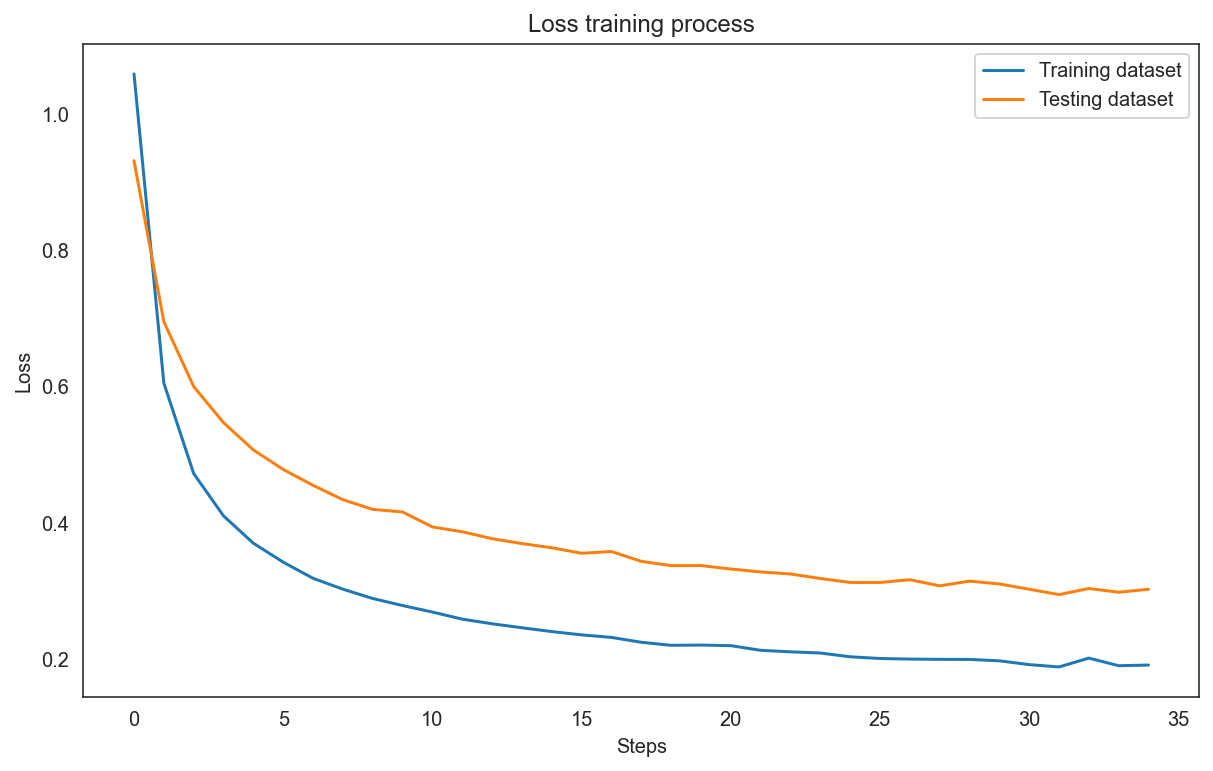

In [49]:
#Model Evaluate (Loss)
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
#plt.grid(color = 'w')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss training process')
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.legend(['Training dataset', 'Testing dataset'], loc = 'upper right')

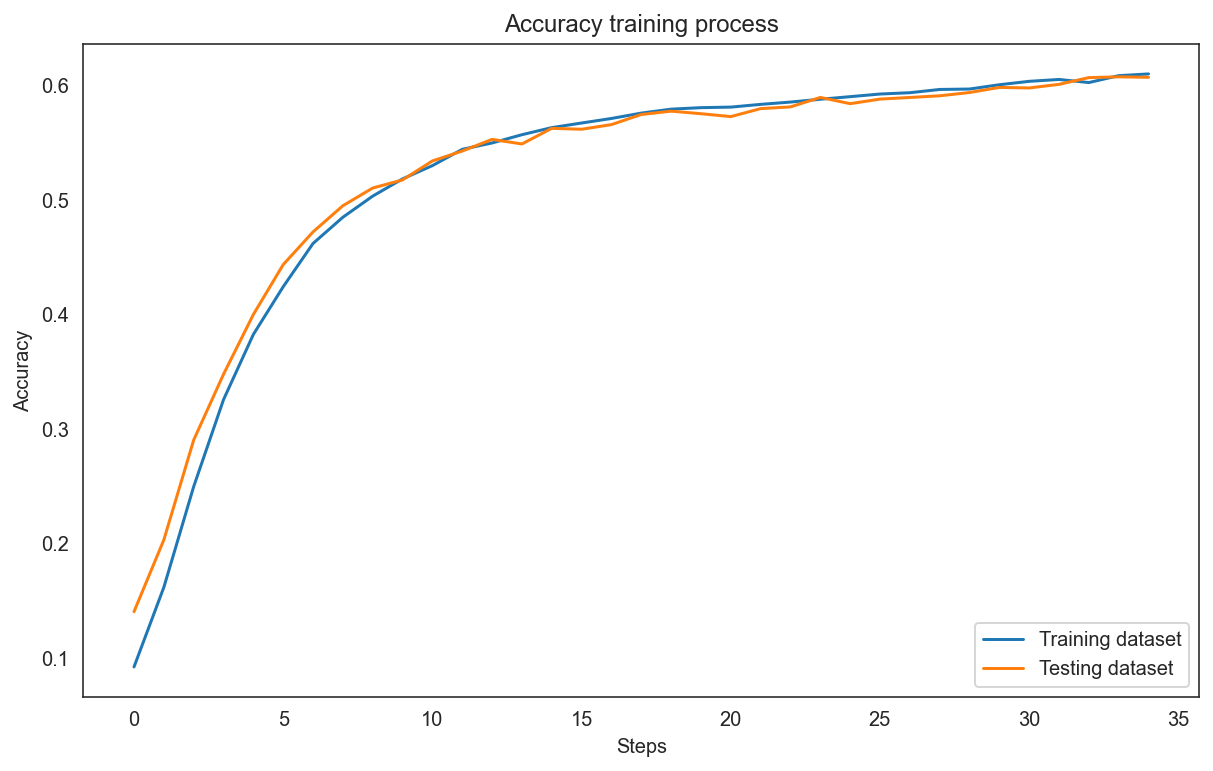

In [52]:
#Model Evaluate (Accuracy)
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
#plt.grid(color = 'w')
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy training process')
plt.ylabel('Accuracy')
plt.xlabel('Steps')
plt.legend(['Training dataset', 'Testing dataset'], loc = 'lower right')

In [53]:
#Reconstruction error
predicts = model.predict(X_val_sc)
re_error = ((X_val_sc - predicts) ** 2).mean(axis = 1) # Calculate MSE
re_error = np.stack((y_val, re_error), axis = -1)
print(re_error)

[[0.         0.08187938]
 [0.         0.05918377]
 [0.         0.09309925]
 ...
 [0.         0.2695079 ]
 [0.         0.0977695 ]
 [0.         0.05412292]]


In [54]:
mse = pd.DataFrame(re_error[:,1]).rename(columns={0:'MSE'})
mse = mse.reset_index()
mse

index       MSE
0            0  0.081879
1            1  0.059184
2            2  0.093099
3            3  0.011750
4            4  0.007847
...        ...       ...
118103  118103  0.112212
118104  118104  0.004300
118105  118105  0.269508
118106  118106  0.097769
118107  118107  0.054123

[118108 rows x 2 columns]

In [55]:
### Find the fraud data from outlier (Percentile > 99.9%)

threshold = mse.MSE.quantile(0.999)
threshold

22.52242667041616

In [354]:
mse['isFraud'] = mse['MSE'].apply(lambda x: 'Fraud' if x > threshold else 'NotFraud')
mse['isFraud_num'] = mse['MSE'].apply(lambda x: 1 if x > threshold else 0)
mse

index       MSE   isFraud  isFraud_num    Answer
0            0  0.080510  NotFraud            0  NotFraud
1            1  0.057186  NotFraud            0  NotFraud
2            2  0.080778  NotFraud            0  NotFraud
3            3  0.013044  NotFraud            0  NotFraud
4            4  0.007369  NotFraud            0  NotFraud
...        ...       ...       ...          ...       ...
118103  118103  0.104008  NotFraud            0  NotFraud
118104  118104  0.004849  NotFraud            0  NotFraud
118105  118105  0.256063  NotFraud            0  NotFraud
118106  118106  0.099773  NotFraud            0  NotFraud
118107  118107  0.053498  NotFraud            0  NotFraud

[118108 rows x 5 columns]

In [355]:
X_val_cate = X_val[['TransactionAmt','ProductCD_C','ProductCD_H','ProductCD_R',
       'ProductCD_S','ProductCD_W','card4_american express',
       'card4_discover','card4_mastercard','card4_visa',]]

X_val_cate = X_val_cate.reset_index(drop=True).reset_index()
X_val_cate.head()

index  TransactionAmt  ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  \
0      0           15.00            0            0            0            1   
1      1           25.95            0            0            0            0   
2      2           44.00            0            0            0            0   
3      3           88.50            0            0            0            0   
4      4           97.00            0            0            0            0   

   ProductCD_W  card4_american express  card4_discover  card4_mastercard  \
0            0                       0               0                 0   
1            1                       0               0                 0   
2            1                       0               0                 1   
3            1                       0               0                 1   
4            1                       0               0                 0   

   card4_visa  
0           1  
1           1  
2           0  
3           0  
4           1

In [356]:
mse['Answer'] = y_val.to_frame('isFraud').reset_index(drop=True)
mse['Answer'] = mse['Answer'].apply(lambda x: 'Fraud' if x == 1 else 'NotFraud')
mse

index       MSE   isFraud  isFraud_num    Answer
0            0  0.080510  NotFraud            0  NotFraud
1            1  0.057186  NotFraud            0  NotFraud
2            2  0.080778  NotFraud            0  NotFraud
3            3  0.013044  NotFraud            0  NotFraud
4            4  0.007369  NotFraud            0  NotFraud
...        ...       ...       ...          ...       ...
118103  118103  0.104008  NotFraud            0  NotFraud
118104  118104  0.004849  NotFraud            0  NotFraud
118105  118105  0.256063  NotFraud            0  NotFraud
118106  118106  0.099773  NotFraud            0  NotFraud
118107  118107  0.053498  NotFraud            0  NotFraud

[118108 rows x 5 columns]

In [357]:
mse_2 = pd.merge(mse, X_val_cate,on='index')
mse_2

index       MSE   isFraud  isFraud_num    Answer  TransactionAmt  \
0            0  0.080510  NotFraud            0  NotFraud           15.00   
1            1  0.057186  NotFraud            0  NotFraud           25.95   
2            2  0.080778  NotFraud            0  NotFraud           44.00   
3            3  0.013044  NotFraud            0  NotFraud           88.50   
4            4  0.007369  NotFraud            0  NotFraud           97.00   
...        ...       ...       ...          ...       ...             ...   
118103  118103  0.104008  NotFraud            0  NotFraud           87.95   
118104  118104  0.004849  NotFraud            0  NotFraud           56.95   
118105  118105  0.256063  NotFraud            0  NotFraud          107.95   
118106  118106  0.099773  NotFraud            0  NotFraud          445.00   
118107  118107  0.053498  NotFraud            0  NotFraud           82.95   

        ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  \
0                 0            0            0            1            0   
1                 0            0            0            0            1   
2                 0            0            0            0            1   
3                 0            0            0            0            1   
4                 0            0            0            0            1   
...             ...          ...          ...          ...          ...   
118103            0            0            0            0            1   
118104            0            0            0            0            1   
118105            0            0            0            0            1   
118106            0            0            0            0            1   
118107            0            0            0            0            1   

        card4_american express  card4_discover  card4_mastercard  card4_visa  
0                            0               0                 0           1  
1                            0               0                 0           1  
2                            0               0                 1           0  
3                            0               0                 1           0  
4                            0               0                 0           1  
...                        ...             ...               ...         ...  
118103                       0               0                 0           1  
118104                       0               0                 0           1  
118105                       0               0                 1           0  
118106                       0               0                 0           1  
118107                       0               0                 0           1  

[118108 rows x 15 columns]

In [358]:
### Check %correct from prediction each categorials

mse_2['ProductCD'] = (mse_2.iloc[:, 6:11] == 1).idxmax(1)
mse_2['ProductCD'] = mse_2['ProductCD'].map(lambda x:x[10:])
mse_2['Card4'] = (mse_2.iloc[:, 11:] == 1).idxmax(1)
mse_2['Card4'] = mse_2['Card4'].map(lambda x:x[6:])
mse_2 = mse_2.drop(columns=['ProductCD_C','ProductCD_H','ProductCD_R','ProductCD_S','ProductCD_W','card4_american express','card4_discover','card4_mastercard','card4_visa'])
mse_2['Answer_isFraud_num'] = mse_2['Answer'].map(lambda x: 1 if x =='Fraud' else 0)
mse_2

index       MSE   isFraud  isFraud_num    Answer  TransactionAmt  \
0            0  0.080510  NotFraud            0  NotFraud           15.00   
1            1  0.057186  NotFraud            0  NotFraud           25.95   
2            2  0.080778  NotFraud            0  NotFraud           44.00   
3            3  0.013044  NotFraud            0  NotFraud           88.50   
4            4  0.007369  NotFraud            0  NotFraud           97.00   
...        ...       ...       ...          ...       ...             ...   
118103  118103  0.104008  NotFraud            0  NotFraud           87.95   
118104  118104  0.004849  NotFraud            0  NotFraud           56.95   
118105  118105  0.256063  NotFraud            0  NotFraud          107.95   
118106  118106  0.099773  NotFraud            0  NotFraud          445.00   
118107  118107  0.053498  NotFraud            0  NotFraud           82.95   

       ProductCD       Card4  Answer_isFraud_num  
0              S        visa                   0  
1              W        visa                   0  
2              W  mastercard                   0  
3              W  mastercard                   0  
4              W        visa                   0  
...          ...         ...                 ...  
118103         W        visa                   0  
118104         W        visa                   0  
118105         W  mastercard                   0  
118106         W        visa                   0  
118107         W        visa                   0  

[118108 rows x 9 columns]

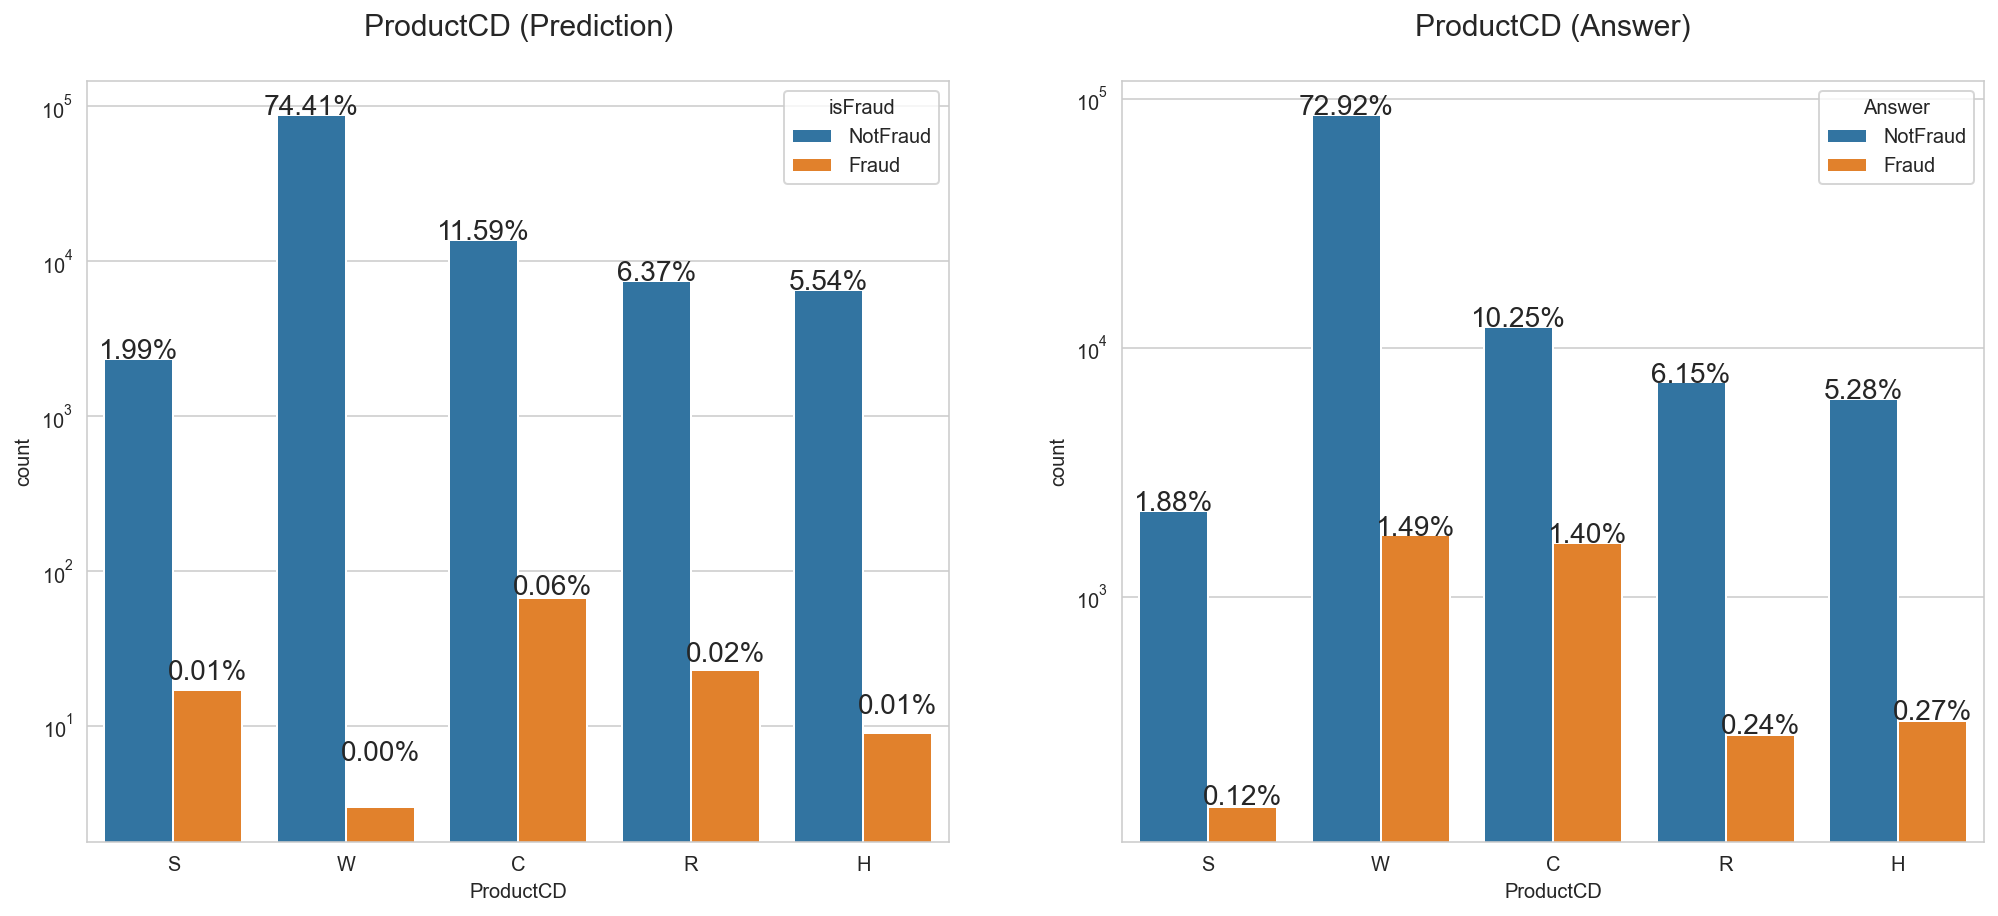

In [359]:
### Plot the comparison between prediction and answer of ProductCD
### Need to adjust threshold before plot graph

sns.set_style('whitegrid')
fig, (p1, p2) = plt.subplots(ncols=2, figsize=(17,7))
total = len(mse_2)
p1 = sns.countplot(x='ProductCD', hue='isFraud', data = mse_2, ax = p1)
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14)
p1.set_title('ProductCD (Prediction)\n', fontsize=15)

p2 = sns.countplot(x='ProductCD', hue='Answer', data = mse_2, ax = p2)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14)
    
p2.set_title('ProductCD (Answer)\n', fontsize=15)
p1.set_yscale('log')
p2.set_yscale('log')

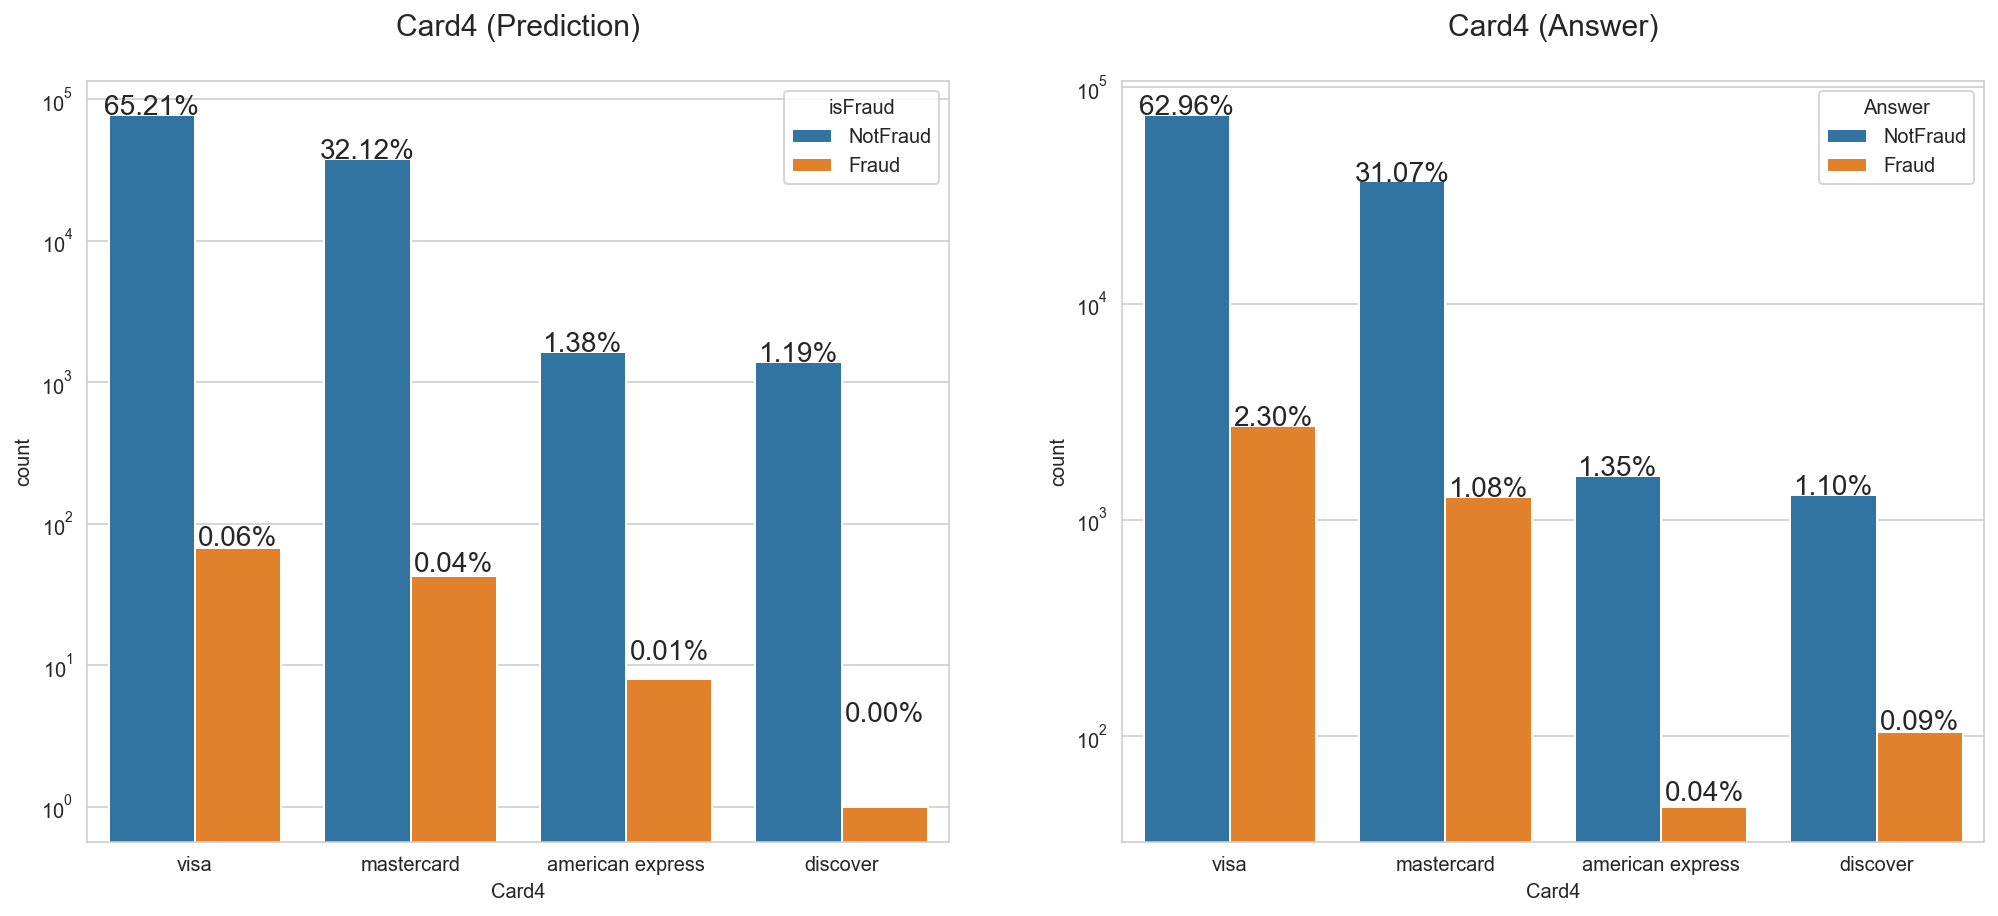

In [360]:
### Plot the comparison between prediction and answer of Card 4
### Need to adjust threshold before plot graph

sns.set_style('whitegrid')
fig, (p1, p2) = plt.subplots(ncols=2, figsize=(17,7))


total = len(mse_2)
p1 = sns.countplot(x='Card4', hue='isFraud', data = mse_2, ax = p1)
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14)
p1.set_title('Card4 (Prediction)\n', fontsize=15)

p2 = sns.countplot(x='Card4', hue='Answer', data = mse_2, ax = p2)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14)
    
p2.set_title('Card4 (Answer)\n', fontsize=15)
p1.set_yscale('log')
p2.set_yscale('log')

In [361]:
### Prediction

mse_prod = pd.crosstab(mse_2['ProductCD'], mse_2['isFraud'], normalize = 'index')*100
mse_prod = mse_prod.reset_index()
mse_prod

isFraud ProductCD     Fraud   NotFraud
0               C  0.486954  99.513046
1               H  0.137384  99.862616
2               R  0.304918  99.695082
3               S  0.719729  99.280271
4               W  0.003413  99.996587

In [362]:
### Answer

mse_prod_ans = pd.crosstab(mse_2['ProductCD'], mse_2['Answer'], normalize = 'index')*100
mse_prod_ans = mse_prod_ans.rename(columns={'NotFraud':'Ans_NoFraud', 'Fraud':'Ans_Fraud'})
mse_prod_ans = mse_prod_ans.reset_index()
mse_prod_ans

Answer ProductCD  Ans_Fraud  Ans_NoFraud
0              C  11.984883    88.015117
1              H   4.854221    95.145779
2              R   3.685536    96.314464
3              S   6.054191    93.945809
4              W   2.005848    97.994152

In [363]:
### Prediction vs Answer

check_prod = pd.merge(mse_prod, mse_prod_ans, on='ProductCD')
check_prod

ProductCD     Fraud   NotFraud  Ans_Fraud  Ans_NoFraud
0         C  0.486954  99.513046  11.984883    88.015117
1         H  0.137384  99.862616   4.854221    95.145779
2         R  0.304918  99.695082   3.685536    96.314464
3         S  0.719729  99.280271   6.054191    93.945809
4         W  0.003413  99.996587   2.005848    97.994152

In [158]:
mse['isFraud'].value_counts(normalize=True)*100

NotFraud    99.899245
Fraud        0.100755
Name: isFraud, dtype: float64

Text(0.5, 0, 'False positive')

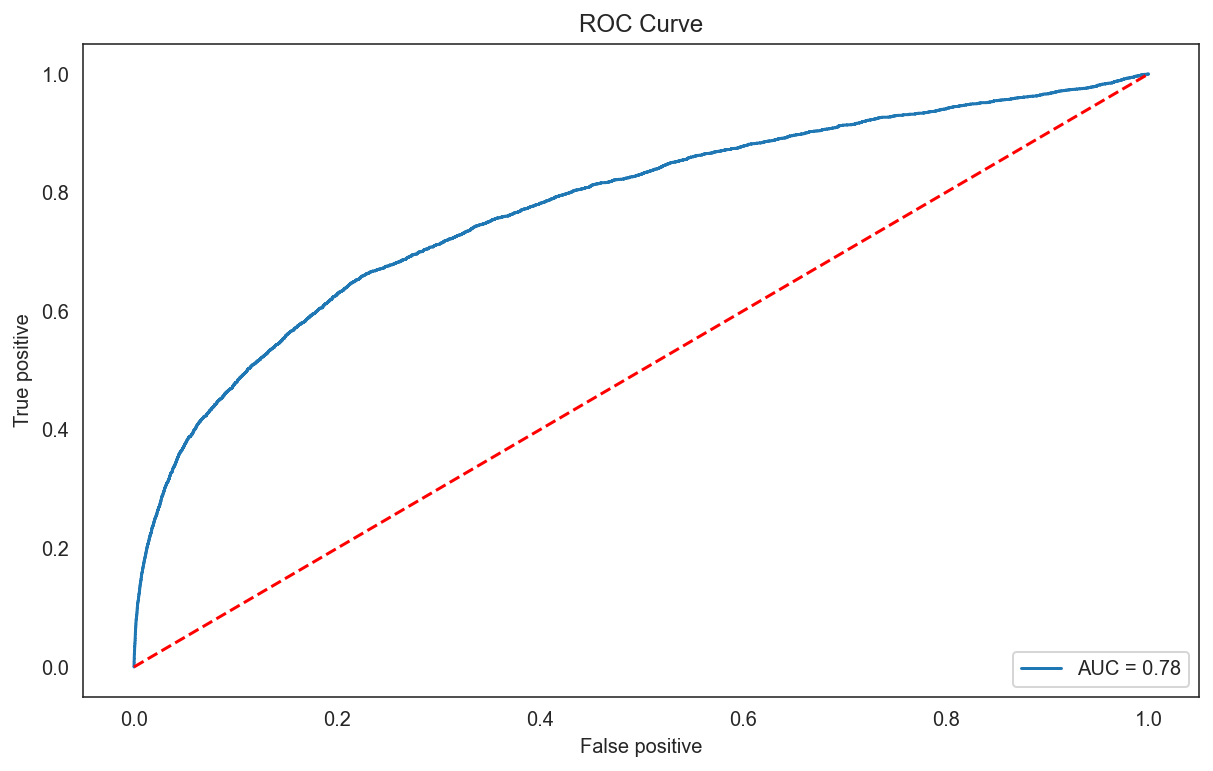

In [159]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(re_error[:,0], re_error[:,1])
roc_auc = auc(fpr, tpr)

#Plotting ROC Curve
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.ylabel('True positive')
plt.xlabel('False positive')

In [ ]:
plt.figure(figsize=(6,5))
d1 = sns.countplot(x='DeviceType',data = device1, hue='isFraud', color = '#ee7106')
#plt.yscale("log")
plt.ylabel('Count')
d2 = d1.twinx()
d2 = sns.pointplot(x='DeviceType', y ='Fraud',data = device11, color = '#33374d', order=['mobile','desktop'])
plt.title('Device type\n',fontsize=16)
plt.xlabel('DeviceType')
plt.ylabel('Ratio of Fraud (%)')

Text(0.5, 17.800000000000004, 'Prediction')

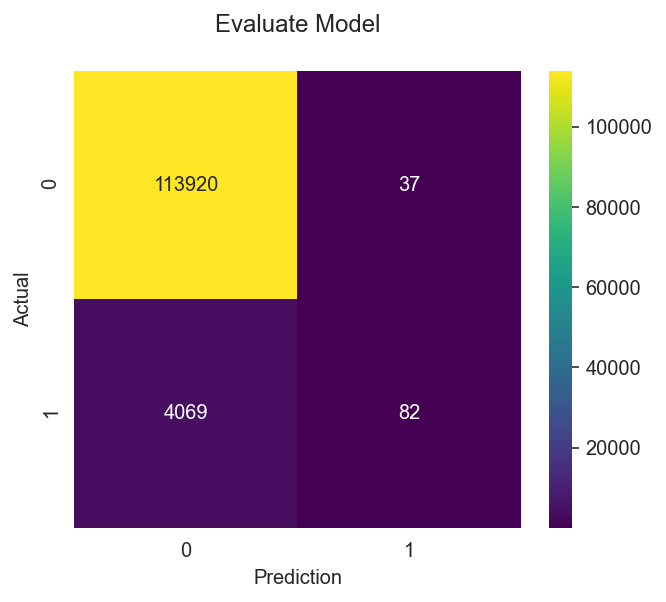

In [160]:
#Confusion matrix

thres = np.round(threshold,2)
y_predict = [1 if e > thres else 0 for e in re_error[:,1]]
matrix = confusion_matrix(re_error[:,0], y_predict)

#Plotting confusion matrix
plt.figure(figsize = (5, 4.2))
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = plt.cm.viridis);
plt.title("Evaluate Model\n")
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [161]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113957
           1       0.69      0.02      0.04      4151

    accuracy                           0.97    118108
   macro avg       0.83      0.51      0.51    118108
weighted avg       0.96      0.97      0.95    118108



In [162]:
tn, fp, fn, tp = matrix.ravel()
print('Correctly Predict that Wnv is Positive (TP):',tp)
print('Correctly Predict that Wnv is Negative (TN):',tn)
print('Incorrectly Predict that Wnv is Positive (FP):',fp)
print('Incorrectly Predict that Wnv is Negative (FN):',fn)

Correctly Predict that Wnv is Positive (TP): 82
Correctly Predict that Wnv is Negative (TN): 113920
Incorrectly Predict that Wnv is Positive (FP): 37
Incorrectly Predict that Wnv is Negative (FN): 4069


In [163]:
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.9652
Misclassification rate: 0.0348
Precision: 0.6891
Recall: 0.0198
Specificity: 0.9997


Text(0.5, 0, 'Observation')

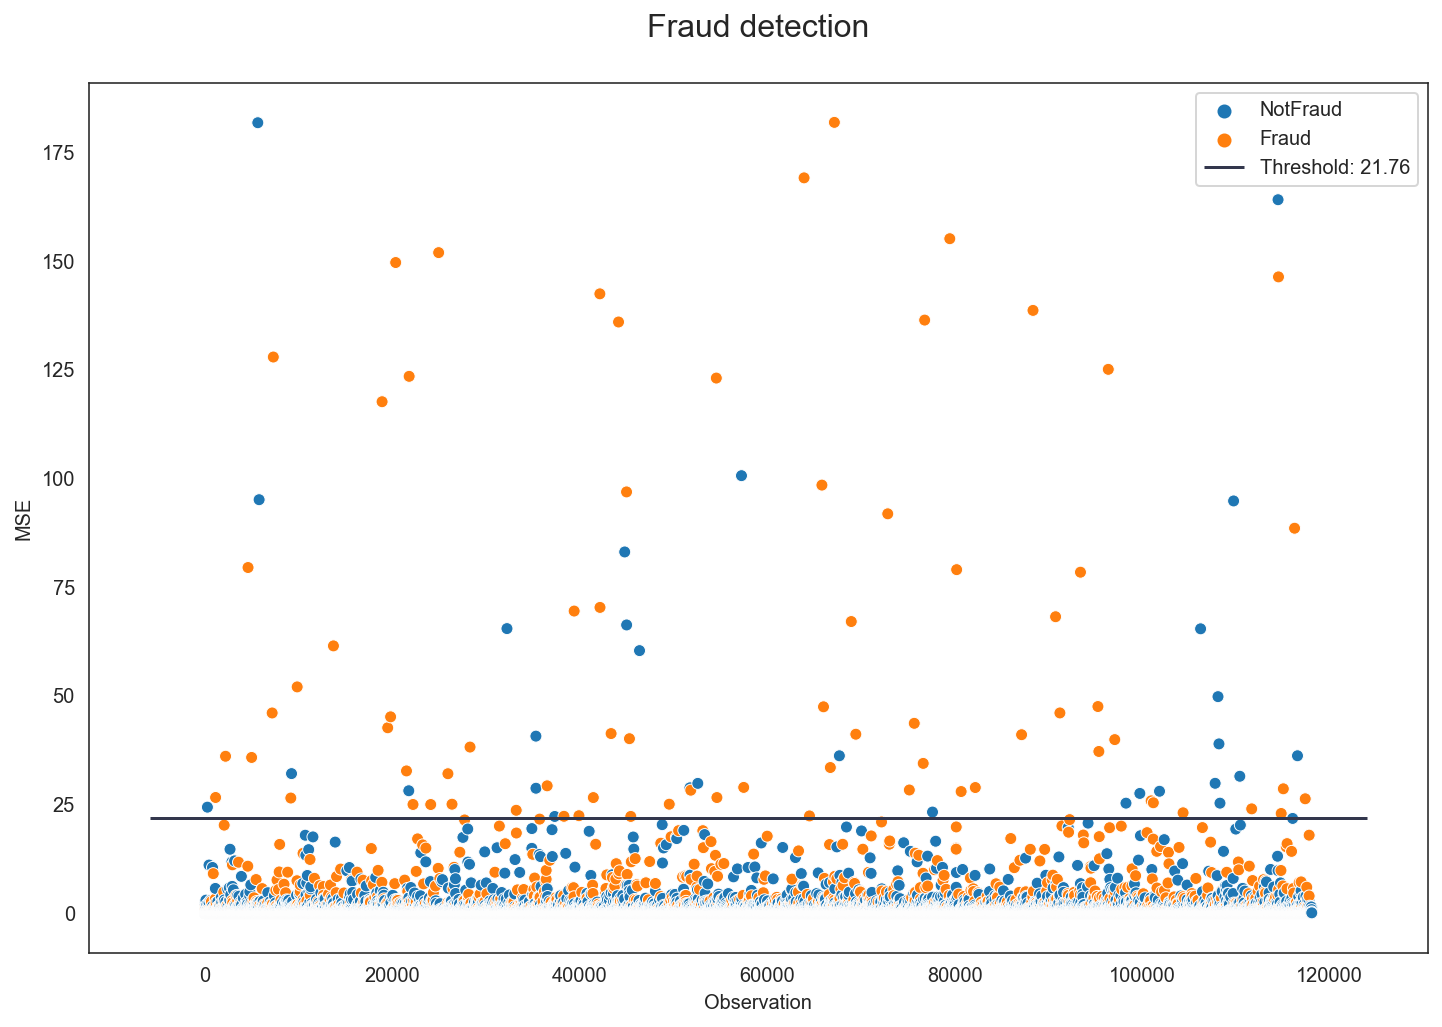

In [164]:
#Prediction
plt.figure(figsize = (12,8))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
#plt.grid(color = 'w')
#plt.plot(re_error[:,1], marker = 'o', ms = 4, c = '#ee7106', linestyle = 'None')
sns.scatterplot(x = mse['index'], y = mse[mse['MSE'] < 200]['MSE'], data = mse, color = '#ee7106', hue='Answer')
ax.hlines(thres, ax.get_xlim()[0], ax.get_xlim()[1], colors = '#33374d', zorder = 100, label = f'Threshold: {thres}')
ax.legend()
plt.title("Fraud detection\n",fontsize=16)
plt.ylabel('MSE')
plt.xlabel('Observation')

In [165]:
### Evaluate model with different threshold

acc = []
miscl = []
prec = []
rec = []
spec = []
thre = []

for i in list(range(800,999,1)):
    threshold = mse.MSE.quantile(i/1000)
    thres = np.round(threshold,2)
    
    y_predict = [1 if e > thres else 0 for e in re_error[:,1]]
    matrix = confusion_matrix(re_error[:,0], y_predict)
    tn, fp, fn, tp = matrix.ravel()
    
    acc.append(round((tp+tn)/(tp+fp+tn+fn),4)*100)
    miscl.append(round((fp+fn)/(tp+fp+tn+fn),4)*100)
    prec.append(round(tp/(tp+fp),4)*100)
    rec.append(round(tp/(tp+fn),4)*100)
    spec.append(round(tn/(tn+fp),4)*100)
    thre.append(i/10)
    
acc_df = pd.DataFrame(acc)
miscl_df = pd.DataFrame(miscl)
prec_df = pd.DataFrame(prec)
rec_df = pd.DataFrame(rec)
spec_df = pd.DataFrame(spec)

In [166]:
# Accuracy
acc_df['thres'] = thre
acc_df.rename(columns={0:'acc'}, inplace = True)

# Misclassification
miscl_df['thres'] = thre
miscl_df.rename(columns={0:'miscl'}, inplace = True)

# Precision
prec_df['thres'] = thre
prec_df.rename(columns={0:'prec'}, inplace = True)

# Recall
rec_df['thres'] = thre
rec_df.rename(columns={0:'rec'}, inplace = True)

# Specificity
spec_df['thres'] = thre
spec_df.rename(columns={0:'spec'}, inplace = True)

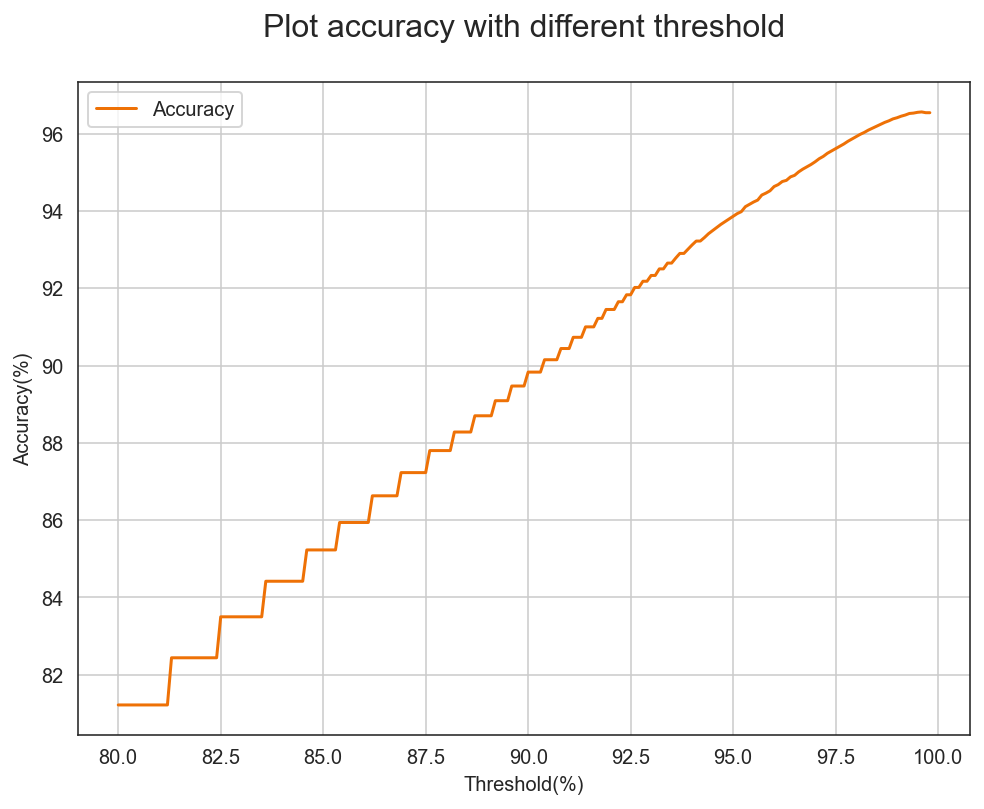

In [167]:
### Plot accuracy with different threshold

plt.figure(figsize=(8,6))
plt.plot(thre, acc, label = 'Accuracy', color = '#ee7106')
plt.title('Plot accuracy with different threshold\n', fontsize=16)
plt.xlabel('Threshold(%)')
plt.ylabel('Accuracy(%)')
plt.grid()
plt.legend()

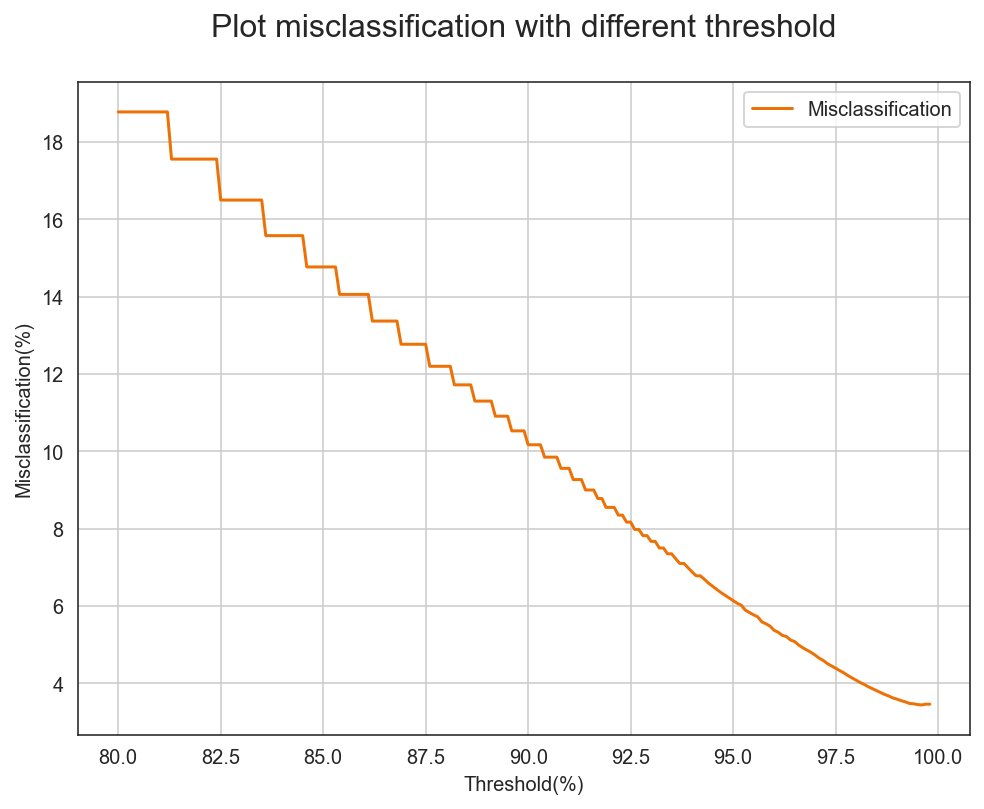

In [168]:
### Plot misclassification with different threshold

plt.figure(figsize=(8,6))
plt.plot(thre, miscl, label = 'Misclassification', color = '#ee7106')
plt.title('Plot misclassification with different threshold\n', fontsize=16)
plt.xlabel('Threshold(%)')
plt.ylabel('Misclassification(%)')
plt.grid()
plt.legend()

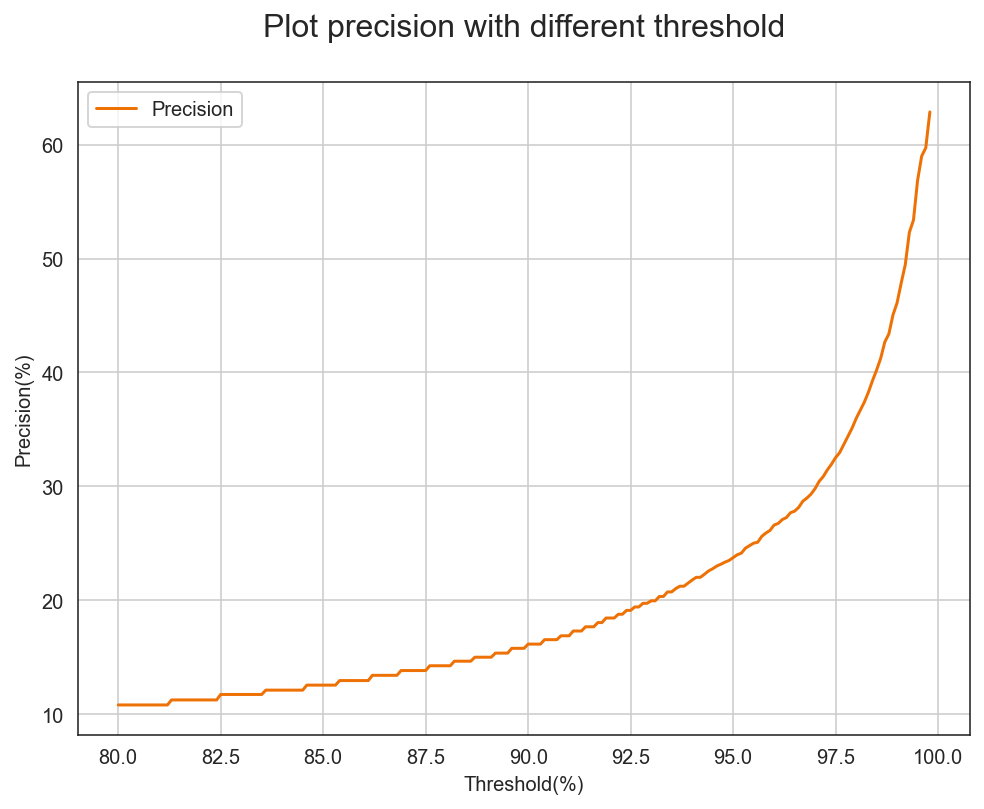

In [169]:
### Plot precision with different threshold

plt.figure(figsize=(8,6))
plt.plot(thre, prec, label = 'Precision', color = '#ee7106')
plt.title('Plot precision with different threshold\n', fontsize=16)
plt.xlabel('Threshold(%)')
plt.ylabel('Precision(%)')
plt.grid()
plt.legend()

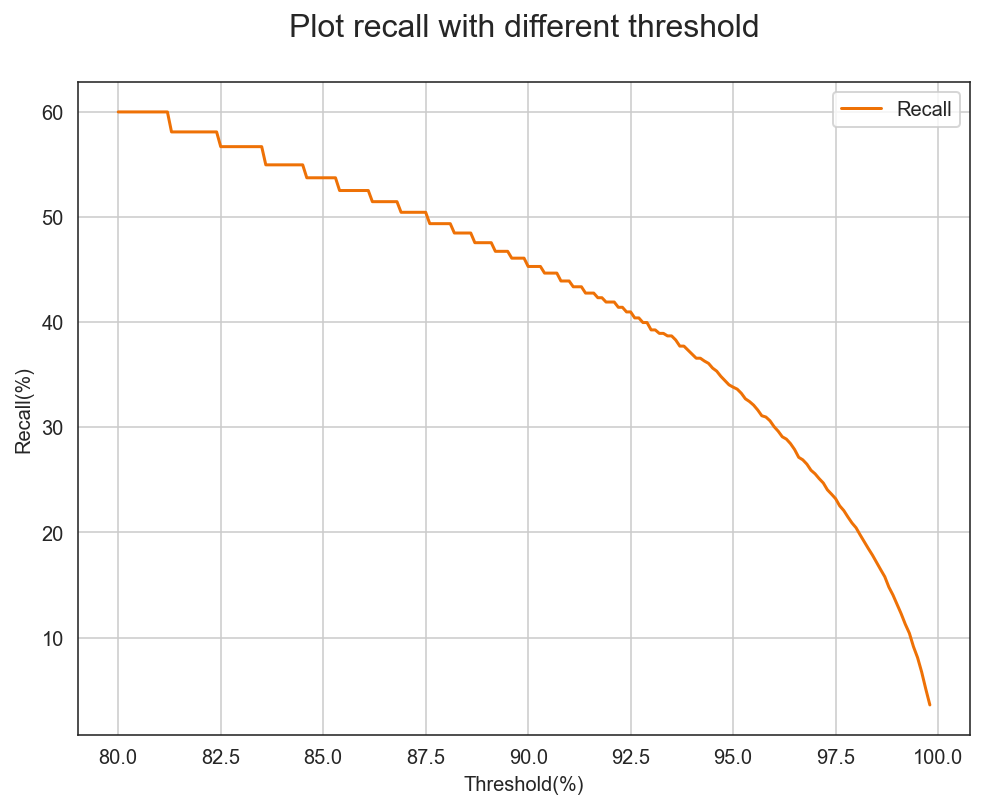

In [170]:
### Plot recall with different threshold

plt.figure(figsize=(8,6))
plt.plot(thre, rec, label = 'Recall', color = '#ee7106')
plt.title('Plot recall with different threshold\n', fontsize=16)
plt.xlabel('Threshold(%)')
plt.ylabel('Recall(%)')
plt.grid()
plt.legend()

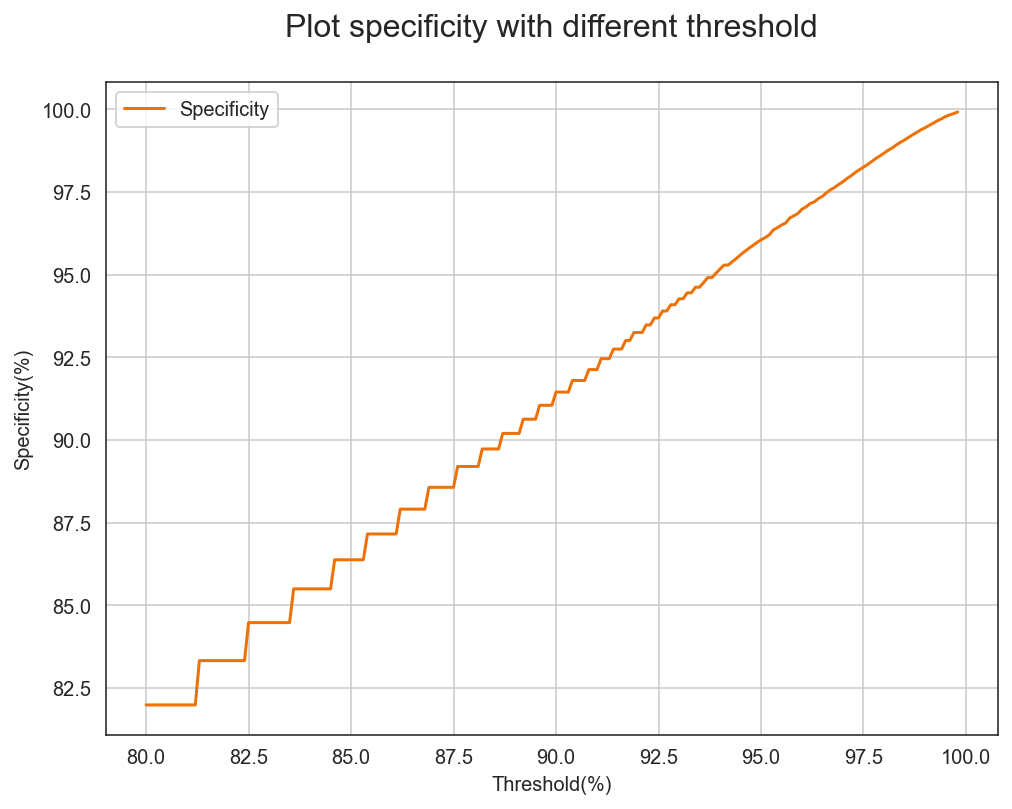

In [171]:
### Plot specificity with different threshold

plt.figure(figsize=(8,6))
plt.plot(thre, spec, label = 'Specificity', color = '#ee7106')
plt.title('Plot specificity with different threshold\n', fontsize=16)
plt.xlabel('Threshold(%)')
plt.ylabel('Specificity(%)')
plt.grid()
plt.legend()

# Prediction with Test Set

In [22]:
X_train = train_new.drop(columns= ['isFraud'])
y_train = train_new['isFraud']

In [23]:
X_test = test_new

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(590540, 417)
(590540,)
(506691, 417)


In [25]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [26]:
y_train.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [27]:
sm = SMOTE()

Xsm_train, ysm_train = sm.fit_resample(X_train_sc, y_train)

In [28]:
ysm_train.value_counts()

0    569877
1    569877
Name: isFraud, dtype: int64

In [29]:
print(Xsm_train.shape)
print(ysm_train.shape)
print(X_test_sc.shape)

(1139754, 417)
(1139754,)
(506691, 417)


In [30]:
### PCA

columns_pca = [i for i in X_train.columns][5:]

In [37]:
columns_pca

['addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V

In [38]:
X_train_pca1 = pd.DataFrame(Xsm_train, columns=X_train.columns)
X_test_pca1 = pd.DataFrame(X_test_sc, columns=X_train.columns)

In [39]:
X_train_pca1

TransactionAmt     card1     card2     card3     card5     addr1  \
0             -0.278167  0.821695 -0.261218 -0.281425 -1.396380  0.243321   
1             -0.443327 -1.457558  0.268534 -0.281425 -2.368254  0.347543   
2             -0.317889 -1.068263  0.817433 -0.281425 -0.813255  0.399654   
3             -0.355521  1.679858  1.308889 -0.281425 -2.003802  1.921291   
4             -0.355521 -1.102133  0.970614 -0.281425 -2.368254  1.337649   
...                 ...       ...       ...       ...       ...       ...   
1139749       -0.317889 -1.183629  0.294899 -0.281425 -2.207141  1.551983   
1139750       -0.091483  0.680587  0.657785 -0.281425  0.644557 -0.185373   
1139751        0.423831  0.397244  1.325070 -0.281425  0.644557  0.926976   
1139752       -0.408098  0.050756 -1.180571 -0.281425 -0.870829 -0.286758   
1139753       -0.353026 -1.553778  1.168473  2.809740 -1.517864  0.076566   

            addr2     dist1     dist2        C1  ...  card4_mastercard  \
0        0.069833 -0.118444 -0.099221 -0.098020  ...         -0.686646   
1        0.069833 -0.196550 -0.099221 -0.098020  ...          1.456354   
2        0.069833  0.983253 -0.099221 -0.098020  ...         -0.686646   
3        0.069833 -0.196550 -0.099221 -0.090533  ...          1.456354   
4        0.069833 -0.196550 -0.099221 -0.098020  ...          1.456354   
...           ...       ...       ...       ...  ...               ...   
1139749  0.069833 -0.177113 -0.099221 -0.098020  ...          1.456354   
1139750  0.069833 -0.196550 -0.099221 -0.098020  ...         -0.686646   
1139751  0.069833 -0.196550 -0.099221 -0.071187  ...         -0.686646   
1139752  0.069833 -0.196550 -0.099221 -0.098020  ...          0.391241   
1139753  0.069833 -0.196550 -0.099221  0.105288  ...         -0.686646   

         card4_visa  P_emaildomain_Google  P_emaildomain_Microsoft  \
0         -1.375509              0.909154                -0.334658   
1         -1.375509              0.909154                -0.334658   
2          0.727004             -1.099924                 2.988123   
3         -1.375509             -1.099924                -0.334658   
4         -1.375509              0.909154                -0.334658   
...             ...                   ...                      ...   
1139749   -1.375509              0.909154                -0.334658   
1139750    0.727004              0.909154                -0.334658   
1139751    0.727004              0.909154                -0.334658   
1139752   -0.330520              0.909154                -0.334658   
1139753    0.727004              0.909154                -0.334658   

         P_emaildomain_Others  P_emaildomain_Yahoo  \
0                   -0.267954            -0.459389   
1                   -0.267954            -0.459389   
2                   -0.267954            -0.459389   
3                   -0.267954             2.176802   
4                   -0.267954            -0.459389   
...                       ...                  ...   
1139749             -0.267954            -0.459389   
1139750             -0.267954            -0.459389   
1139751             -0.267954            -0.459389   
1139752             -0.267954            -0.459389   
1139753             -0.267954            -0.459389   

         P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                          -0.258532              -0.224307   
1                          -0.258532              -0.224307   
2                          -0.258532              -0.224307   
3                          -0.258532              -0.224307   
4                          -0.258532              -0.224307   
...                              ...                    ...   
1139749                    -0.258532              -0.224307   
1139750                    -0.258532              -0.224307   
1139751                    -0.258532              -0.224307   
1139752                    -0.258532              -0.224307   
1139753     

In [40]:
X_test_pca1

TransactionAmt     card1     card2     card3     card5     addr1  \
0            -0.430993  0.104111 -1.601553 -0.281425  0.644557 -1.267894   
1            -0.359702 -1.148040 -1.601553 -0.281425  0.644557  0.076566   
2             0.150412 -1.106417  1.353567 -0.281425  0.644557  1.879602   
3             0.626866  0.222450 -0.012298 -0.281425 -0.813255 -0.903118   
4            -0.280467  1.656599  0.574896 -0.281425 -2.003802 -0.288210   
...                ...       ...       ...       ...       ...       ...   
506686       -0.168706  0.802516  0.083440  2.809740  0.595963 -0.079766   
506687       -0.513685 -1.376149  0.294064  2.809740  0.595963  0.076566   
506688       -0.359702  1.379726  0.817433 -0.281425  0.644557  0.368387   
506689        0.280031  1.371565  0.983379 -0.281425  0.595963 -1.194939   
506690       -0.462787 -0.854028 -1.237748 -0.811339 -1.274896  0.076566   

            addr2      dist1     dist2        C1  ...  card4_mastercard  \
0        0.069833  -0.192439 -0.147699 -0.060586  ...         -0.686646   
1        0.069833  -0.180106 -0.147699 -0.083047  ...         -0.686646   
2        0.069833  10.635438 -0.147699 -0.090533  ...         -0.686646   
3        0.069833  -0.126666 -0.147699 -0.068073  ...         -0.686646   
4        0.069833  -0.171885 -0.147699 -0.060586  ...          1.456354   
...           ...        ...       ...       ...  ...               ...   
506686 -10.571409  -0.196550 -0.147699 -0.098020  ...          1.456354   
506687   0.069833  -0.196550  0.939600 -0.098020  ...          1.456354   
506688   0.069833  -0.196550 -0.147699 -0.098020  ...         -0.686646   
506689   0.069833  -0.196550 -0.147699 -0.098020  ...          1.456354   
506690   0.069833  -0.196550 -0.147699 -0.098020  ...         -0.686646   

        card4_visa  P_emaildomain_Google  P_emaildomain_Microsoft  \
0         0.727004              0.909154                -0.334658   
1         0.727004             -1.099924                -0.334658   
2         0.727004             -1.099924                 2.988123   
3         0.727004              0.909154                -0.334658   
4        -1.375509              0.909154                -0.334658   
...            ...                   ...                      ...   
506686   -1.375509              0.909154                -0.334658   
506687   -1.375509             -1.099924                 2.988123   
506688    0.727004             -1.099924                 2.988123   
506689   -1.375509             -1.099924                 2.988123   
506690    0.727004             -1.099924                 2.988123   

        P_emaildomain_Others  P_emaildomain_Yahoo  \
0                  -0.267954            -0.459389   
1                  -0.267954            -0.459389   
2                  -0.267954            -0.459389   
3                  -0.267954            -0.459389   
4                  -0.267954            -0.459389   
...                      ...                  ...   
506686             -0.267954            -0.459389   
506687             -0.267954            -0.459389   
506688             -0.267954            -0.459389   
506689             -0.267954            -0.459389   
506690             -0.267954            -0.459389   

        P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                         -0.258532              -0.224307   
1                         -0.258532               4.458167   
2                         -0.258532              -0.224307   
3                         -0.258532              -0.224307   
4                         -0.258532              -0.224307   
...                             ...                    ...   
506686                    -0.258532              -0.224307   
506687                    -0.258532              -0.224307   
506688                    -0.258532              -0.224307   
506689                    -0.258532              -0.224307   
506690                    -0.258532           

In [49]:
X_train_pca = X_train_pca1[columns_pca]
X_test_pca = X_test_pca1[columns_pca]

In [50]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1139754, 412)
(506691, 412)


In [45]:
### From Cumulative Explained Varience = 95% --> n_components = 100

pca_test = PCA(n_components=100,random_state=1)
X_train_pca2 = pca_test.fit_transform(X_train_pca)
X_test_pca2 = pca_test.transform(X_test_pca)

In [51]:
column_pca = ['pca'+str(i) for i in range(1,101)]

X_train_pca2 = pd.DataFrame(X_train_pca2, columns = column_pca)
X_test_pca2 = pd.DataFrame(X_test_pca2, columns = column_pca)

X_train_pca2.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -5.168149  1.947495 -2.173144  2.035411 -0.862588  0.106714 -0.116062   
1 -4.663237  1.242848 -1.563226  1.048525 -1.010458  0.079683 -0.240870   
2 -5.049395  1.805481 -2.108706  1.894329 -0.988183  0.017870 -0.132284   
3 -5.265086  1.906415 -2.345718  2.294848  1.240508  0.029046 -0.211739   
4 -6.462964 -4.402288 -4.188535  2.675455  1.779489  3.061857  2.817031   

       pca8      pca9     pca10  ...     pca91     pca92     pca93     pca94  \
0 -0.036887 -0.432237  0.380586  ... -0.259097 -0.251717  0.259177 -0.565674   
1  0.319001 -1.078011  0.241411  ... -0.096594  0.088386  0.146100  0.026566   
2  0.096232 -0.614116  0.094826  ... -0.477714  0.159454 -0.595245  0.062089   
3 -0.185126 -0.810030 -0.512200  ... -0.170852 -0.555837  0.584910  0.217534   
4  3.498390  3.053316  3.505191  ... -1.156449  0.089620 -0.555090  0.222423   

      pca95     pca96     pca97     pca98     pca99    pca100  
0 -0.418899 -0.566498 -0.455492  0.497229 -0.103680  0.423191  
1  0.038082  0.085958 -0.026409  0.192850 -0.078191  0.021684  
2 -0.184506 -0.318370 -0.542446  1.227641 -0.057506 -0.008664  
3  1.114951  0.641829  1.329617 -0.317038 -0.761889  0.118480  
4  1.072130 -0.602623  1.576413  0.827148 -0.042359  0.531667  

[5 rows x 100 columns]

In [52]:
print(X_train_pca2.shape)
print(X_test_pca2.shape)

(1139754, 100)
(506691, 100)


In [53]:
X_train_pca11 = X_train_pca1.drop(columns = columns_pca)
X_test_pca11 = X_test_pca1.reset_index(drop=True).drop(columns = columns_pca)

In [54]:
X_train_pca2 = pd.concat([X_train_pca11, X_train_pca2],axis=1)
X_test_pca2 = pd.concat([X_test_pca11, X_test_pca2],axis=1)

In [55]:
X_test_pca2

TransactionAmt     card1     card2     card3     card5      pca1  \
0            -0.430993  0.104111 -1.601553 -0.281425  0.644557 -5.258015   
1            -0.359702 -1.148040 -1.601553 -0.281425  0.644557 -5.149159   
2             0.150412 -1.106417  1.353567 -0.281425  0.644557 -4.491849   
3             0.626866  0.222450 -0.012298 -0.281425 -0.813255 -3.852367   
4            -0.280467  1.656599  0.574896 -0.281425 -2.003802 -5.394759   
...                ...       ...       ...       ...       ...       ...   
506686       -0.168706  0.802516  0.083440  2.809740  0.595963 -1.283229   
506687       -0.513685 -1.376149  0.294064  2.809740  0.595963  2.689059   
506688       -0.359702  1.379726  0.817433 -0.281425  0.644557 -4.939247   
506689        0.280031  1.371565  0.983379 -0.281425  0.595963 -4.929228   
506690       -0.462787 -0.854028 -1.237748 -0.811339 -1.274896  1.923788   

            pca2      pca3       pca4      pca5  ...     pca91     pca92  \
0       1.742747 -2.229656   2.154109 -1.064997  ... -0.184639  5.041647   
1       1.766042 -2.070023   1.954230 -0.594436  ...  0.023796  5.384592   
2       1.208527 -1.066673   2.783242 -0.292302  ... -1.384591  5.163826   
3       1.128128 -3.382587   2.620822 -1.104797  ...  0.132065  4.661001   
4       2.008922 -2.401855   2.328331 -0.343953  ...  0.282346  5.346876   
...          ...       ...        ...       ...  ...       ...       ...   
506686 -2.818773  2.801801  -5.210977 -1.217639  ...  1.242086  4.961481   
506687 -7.106408  6.743196 -10.923120 -0.552502  ...  0.548126  5.088209   
506688  1.747539 -1.838904   1.639575 -0.922105  ... -0.195973  5.106439   
506689  1.733345 -1.826593   1.625323 -0.892912  ... -0.300630  5.168919   
506690 -6.471455  7.402519 -10.519869 -0.905193  ... -0.303360  4.917068   

           pca93     pca94     pca95     pca96     pca97     pca98     pca99  \
0      -3.304960 -1.572514  1.650325 -1.555951 -0.009794  0.126153 -1.178190   
1      -2.466678 -0.557427  1.099874 -1.589131 -0.215971  1.209689 -1.667530   
2      -3.466018 -0.928069  1.161341 -2.028842  0.519424  2.760863 -1.433349   
3      -2.697843 -1.334296  1.841393 -1.132916  0.172516  1.362341 -1.729792   
4      -3.577137 -1.560413  1.081967 -1.039569  0.677469  0.937078 -1.210657   
...          ...       ...       ...       ...       ...       ...       ...   
506686 -3.282149 -2.734812  2.142752 -1.903973  2.153575  0.156681 -2.473738   
506687 -4.384699 -1.031747  1.698857 -1.100618  1.091858  2.266995 -1.720704   
506688 -3.563677 -1.123033  1.478658 -1.846026 -0.455187  1.609115 -1.552465   
506689 -3.615653 -1.156529  1.509170 -1.940033 -0.474714  1.409719 -1.362911   
506690 -2.764236 -1.116388  1.795924 -1.729768  0.009509  2.862480 -0.742028   

          pca100  
0       1.506913  
1       1.356711  
2       0.482192  
3       1.399257  
4       1.504932  
...          ...  
506686  2.223976  
506687  1.245123  
506688  1.856344  
506689  1.781941  
506690  2.619551  

[506691 rows x 105 columns]

In [56]:
print(X_train_pca2.shape)
print(X_test_pca2.shape)

(1139754, 105)
(506691, 105)


In [57]:
Xsm_train = X_train_pca2
X_test_sc = X_test_pca2

## Decision Tree

In [71]:
tree2 = DecisionTreeClassifier(random_state=101)
tree2.fit(Xsm_train, ysm_train)

DecisionTreeClassifier(random_state=101)

In [89]:
pred_proba_tree2 = tree2.predict_proba(X_test_sc)
pred_proba_tree2[:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [78]:
pred_tree2 = tree2.predict(X_test_sc)

In [90]:
pred_proba_tree2 = pd.DataFrame(pred_proba_tree2).reset_index().rename(columns={'index':'TransactionID',0:'NoFraud',1:'isFraud'})
pred_proba_tree2['TransactionID'] = test['TransactionID']
pred_proba_tree2 = pred_proba_tree2.drop(columns=['NoFraud'])

In [91]:
pred_proba_tree2.head(10)

TransactionID  isFraud
0        3663549      0.0
1        3663550      0.0
2        3663551      0.0
3        3663552      0.0
4        3663553      0.0
5        3663554      0.0
6        3663555      0.0
7        3663556      0.0
8        3663557      0.0
9        3663558      0.0

In [86]:
tree2.score(Xsm_train, ysm_train)

0.9999578856490084

In [ ]:
#tree2.score(X_test_sc, y_test)

In [92]:
pred_proba_tree2.to_csv('fraud_tree_1.csv',index=False)

## Random Forest

In [58]:
clf2 = RandomForestClassifier(n_estimators=200,min_samples_split=11,min_samples_leaf=7, max_features=2,max_depth= 90,random_state=101)
clf2.fit(Xsm_train, ysm_train)

RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=7,
                       min_samples_split=11, n_estimators=200,
                       random_state=101)

In [59]:
pred_proba_clf2 = clf2.predict_proba(X_test_sc)
pred_proba_clf2[:20]

array([[0.67692426, 0.32307574],
       [0.71876833, 0.28123167],
       [0.70170767, 0.29829233],
       [0.60335998, 0.39664002],
       [0.6115664 , 0.3884336 ],
       [0.687088  , 0.312912  ],
       [0.64696093, 0.35303907],
       [0.57910684, 0.42089316],
       [0.71143106, 0.28856894],
       [0.61738675, 0.38261325],
       [0.58743289, 0.41256711],
       [0.62174817, 0.37825183],
       [0.58864887, 0.41135113],
       [0.58765069, 0.41234931],
       [0.61845291, 0.38154709],
       [0.56391172, 0.43608828],
       [0.7174734 , 0.2825266 ],
       [0.67974571, 0.32025429],
       [0.6351696 , 0.3648304 ],
       [0.61075808, 0.38924192]])

In [60]:
pred_clf2 = clf2.predict(X_test_sc)

In [61]:
pred_proba_clf2 = pd.DataFrame(pred_proba_clf2).reset_index().rename(columns={'index':'TransactionID',0:'NoFraud',1:'isFraud'})
pred_proba_clf2['TransactionID'] = test['TransactionID']
pred_proba_clf2 = pred_proba_clf2.drop(columns=['NoFraud'])

In [62]:
pred_proba_clf2.head(10)

TransactionID   isFraud
0        3663549  0.323076
1        3663550  0.281232
2        3663551  0.298292
3        3663552  0.396640
4        3663553  0.388434
5        3663554  0.312912
6        3663555  0.353039
7        3663556  0.420893
8        3663557  0.288569
9        3663558  0.382613

In [64]:
clf2.score(Xsm_train, ysm_train)

0.9902926420964524

In [ ]:
#clf2.score(X_test_sc, y_test)

In [65]:
pred_proba_clf2.to_csv('fraud_clf_2.csv',index=False)

## Gradient Boosting

In [66]:
gb2 = GradientBoostingClassifier(n_estimators=50, random_state=101)
gb2.fit(Xsm_train, ysm_train)

GradientBoostingClassifier(n_estimators=200, random_state=101)

In [67]:
pred_proba_gb2 = gb2.predict_proba(X_test_sc)
pred_proba_gb2[:20]

array([[0.88524548, 0.11475452],
       [0.81531799, 0.18468201],
       [0.42306089, 0.57693911],
       [0.60063652, 0.39936348],
       [0.55091564, 0.44908436],
       [0.75923854, 0.24076146],
       [0.37177778, 0.62822222],
       [0.39071113, 0.60928887],
       [0.9399335 , 0.0600665 ],
       [0.66807204, 0.33192796],
       [0.66725129, 0.33274871],
       [0.67083198, 0.32916802],
       [0.70475854, 0.29524146],
       [0.78995154, 0.21004846],
       [0.76884756, 0.23115244],
       [0.81737012, 0.18262988],
       [0.79082853, 0.20917147],
       [0.82447019, 0.17552981],
       [0.70452922, 0.29547078],
       [0.4612407 , 0.5387593 ]])

In [68]:
pred_gb2 = gb2.predict(X_test_sc)

In [69]:
pred_proba_gb2 = pd.DataFrame(pred_proba_gb2).reset_index().rename(columns={'index':'TransactionID',0:'NoFraud',1:'isFraud'})
pred_proba_gb2['TransactionID'] = test['TransactionID']
pred_proba_gb2 = pred_proba_gb2.drop(columns=['NoFraud'])

In [70]:
pred_proba_gb2.head(10)

TransactionID   isFraud
0        3663549  0.114755
1        3663550  0.184682
2        3663551  0.576939
3        3663552  0.399363
4        3663553  0.449084
5        3663554  0.240761
6        3663555  0.628222
7        3663556  0.609289
8        3663557  0.060067
9        3663558  0.331928

In [71]:
gb2.score(Xsm_train, ysm_train)

0.8464598501080057

In [ ]:
#gb2.score(X_test_sc, y_test)

In [72]:
pred_proba_gb2.to_csv('fraud_gb_2.csv',index=False)

## AutoEncoder

In [83]:
#Split data for training and testing
#Filtering only "Not Fraud" data into the model for training the model with only not fraud data
#The fraud transaction will have higher MSE than not fraud transaction
#Need not to SMOTE for imbalance data

X_train = train_new[train_new['isFraud'] == 0]
X_train = X_train.drop(['isFraud'], axis = 1)
X_test = test_new
#y_test = test_new['isFraud']

In [84]:
print(X_train.shape)
#print(y_train.shape)
print(X_test.shape)

(569877, 417)
(506691, 417)


In [85]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [86]:
print(X_train_sc.shape)
#print(y_train.shape)
print(X_test_sc.shape)

(569877, 417)
(506691, 417)


In [87]:
#Autoencoder model
lr_rate = 0.01
epoch = 35
batch_size = 8000
early_stop = EarlyStopping(monitor='loss', min_delta=0, patience = 5, mode='auto')
#adam = Adam(lr=lr_rate, decay=(lr_rate/epoch))

def autoencoder_model(x):
    input_layer = Input(shape = (x.shape[1], ))
    encoder = Dense(x.shape[1] // 2, activation = 'tanh',use_bias = True, activity_regularizer = regularizers.l2(lr_rate))(input_layer)
    #encoder = Dropout(0.05)(encoder)
    encoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
    decoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
    #decoder = Dropout(0.05)(decoder)
    decoder = Dense(x.shape[1] // 2, activation = 'tanh')(decoder)
    output_layer = Dense(x.shape[1], activation = 'linear', use_bias = True)(decoder)
    model = Model(inputs = input_layer, outputs = output_layer)
    return model

In [88]:
#Model compile (train)
model_train = autoencoder_model(X_train_sc)
model_train.compile(metrics = ['accuracy'], loss = 'mean_squared_error', optimizer = 'adam')
model_train.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 417)]             0         
_________________________________________________________________
dense_60 (Dense)             (None, 208)               86944     
_________________________________________________________________
dense_61 (Dense)             (None, 104)               21736     
_________________________________________________________________
dense_62 (Dense)             (None, 104)               10920     
_________________________________________________________________
dense_63 (Dense)             (None, 208)               21840     
_________________________________________________________________
dense_64 (Dense)             (None, 417)               87153     
Total params: 228,593
Trainable params: 228,593
Non-trainable params: 0
____________________________________________________

In [89]:
#Training model
history_train = model_train.fit(X_train_sc, X_train_sc, epochs = epoch,
                    batch_size = batch_size, shuffle = True,
                    validation_data = (X_val_sc, X_val_sc),
                    verbose = 1).history

Epoch 1/35
72/72 [==============================] - 7s 93ms/step - loss: 1.2165 - accuracy: 0.0500 - val_loss: 0.8407 - val_accuracy: 0.1416
Epoch 2/35
72/72 [==============================] - 6s 88ms/step - loss: 0.5999 - accuracy: 0.1755 - val_loss: 0.6362 - val_accuracy: 0.2740
Epoch 3/35
72/72 [==============================] - 6s 82ms/step - loss: 0.4494 - accuracy: 0.2948 - val_loss: 0.5555 - val_accuracy: 0.3681
Epoch 4/35
72/72 [==============================] - 6s 82ms/step - loss: 0.3807 - accuracy: 0.3898 - val_loss: 0.5059 - val_accuracy: 0.4403
Epoch 5/35
72/72 [==============================] - 6s 88ms/step - loss: 0.3450 - accuracy: 0.4484 - val_loss: 0.4735 - val_accuracy: 0.4674
Epoch 6/35
72/72 [==============================] - 7s 91ms/step - loss: 0.2975 - accuracy: 0.4760 - val_loss: 0.4449 - val_accuracy: 0.4875
Epoch 7/35
72/72 [==============================] - 6s 83ms/step - loss: 0.3010 - accuracy: 0.4967 - val_loss: 0.4277 - val_accuracy: 0.5047
Epoch 8/35
72

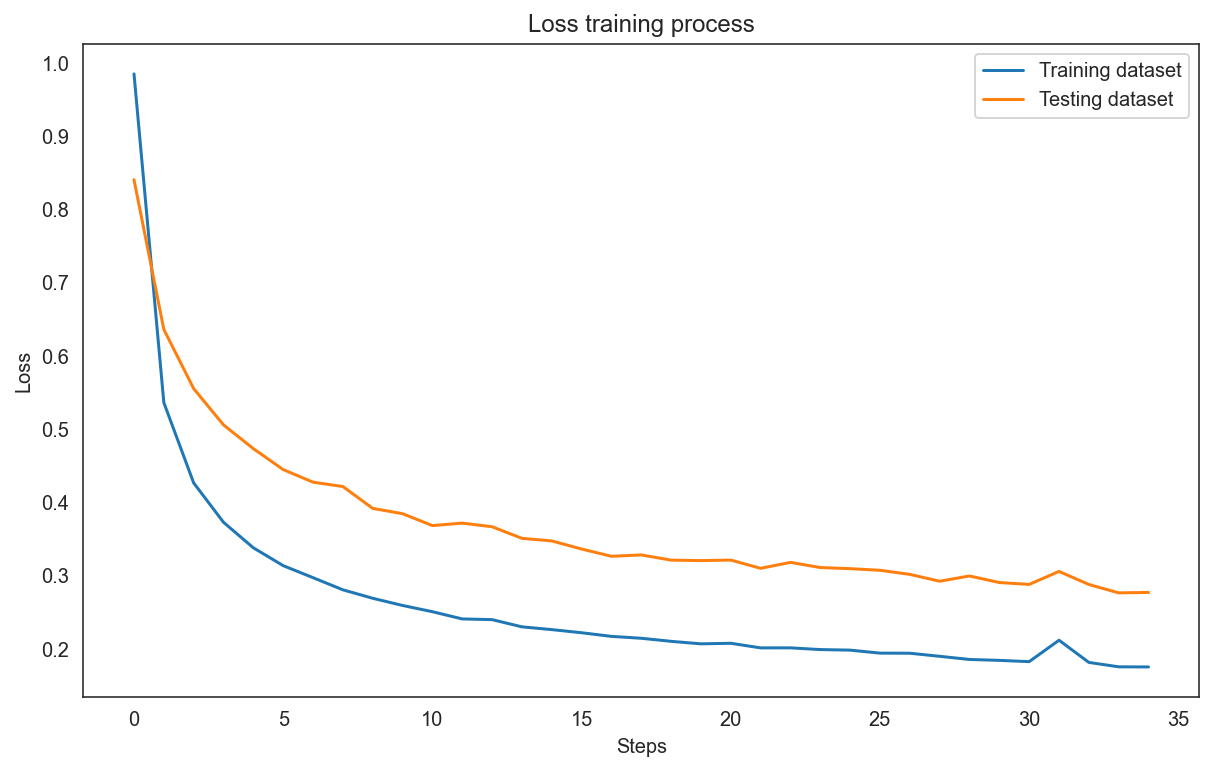

In [90]:
#Model Evaluate (Loss)
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
#plt.grid(color = 'w')
plt.plot(history_train['loss'])
plt.plot(history_train['val_loss'])
plt.title('Loss training process')
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.legend(['Training dataset', 'Testing dataset'], loc = 'upper right')

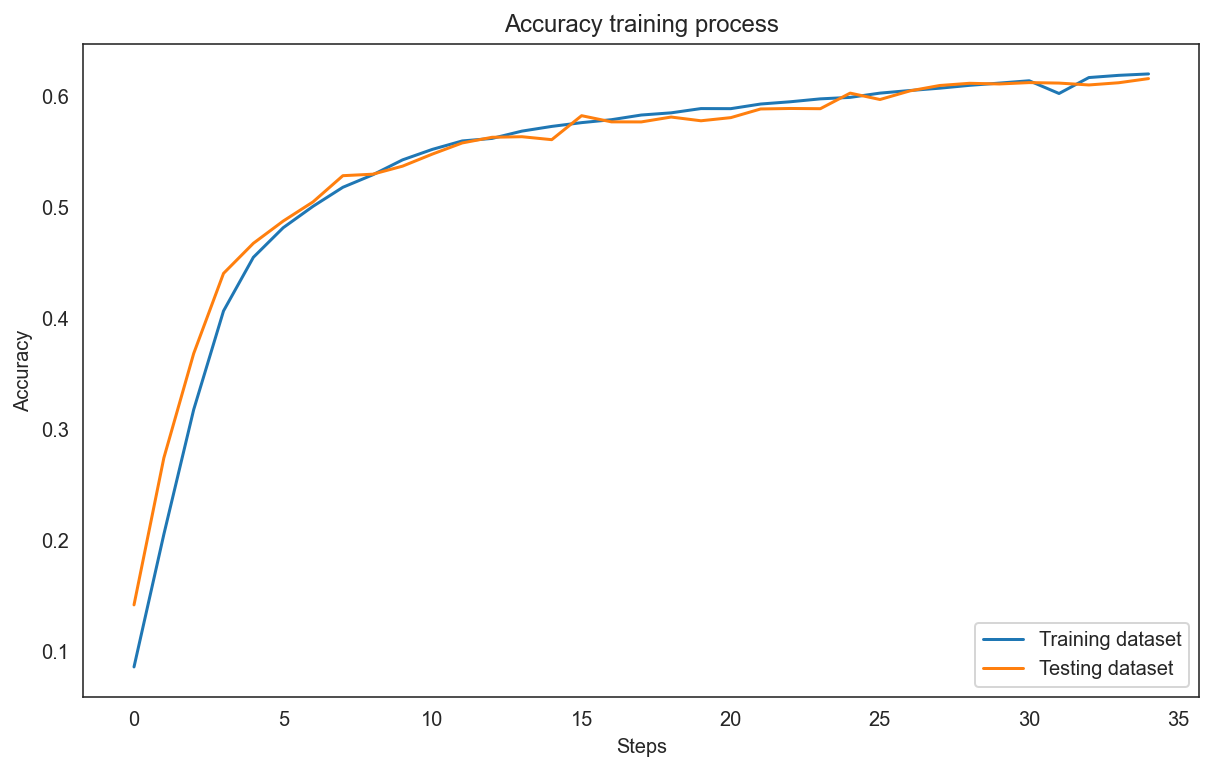

In [91]:
#Model Evaluate (Accuracy)
plt.figure(figsize = (10,6))
ax = plt.axes()
#ax.set_facecolor('#dfe3e6')
#plt.grid(color = 'w')
plt.plot(history_train['accuracy'])
plt.plot(history_train['val_accuracy'])
plt.title('Accuracy training process')
plt.ylabel('Accuracy')
plt.xlabel('Steps')
plt.legend(['Training dataset', 'Testing dataset'], loc = 'lower right')

In [92]:
pred_proba_autoend = model_train.predict(X_test_sc, batch_size=8000)

In [109]:
#Reconstruction error
re_error_test = ((X_test_sc - pred_proba_autoend) ** 2).mean(axis = 1)
#re_error = np.stack((y_val, re_error), axis = -1)
print(re_error_test)

[0.98044971 0.9079455  0.97353691 ... 0.83356705 0.84201473 1.09233373]


In [131]:
pred_proba_autoend_df = pd.DataFrame(re_error_test).reset_index().rename(columns={'index':'TransactionID',0:'MSE'})
pred_proba_autoend_df['TransactionID'] = test['TransactionID']
pred_proba_autoend_df

TransactionID       MSE
0             3663549  0.980450
1             3663550  0.907946
2             3663551  0.973537
3             3663552  0.995318
4             3663553  1.001838
...               ...       ...
506686        4170235  0.897888
506687        4170236  1.010251
506688        4170237  0.833567
506689        4170238  0.842015
506690        4170239  1.092334

[506691 rows x 2 columns]

In [132]:
### Choose the threshold

threshold = pred_proba_autoend_df.MSE.quantile(0.95)
threshold

2.3866360636884307

In [136]:
pred_proba_autoend_df['isFraud'] = rankdata(re_error_test, method = 'dense')
pred_proba_autoend_df['isFraud'] = pred_proba_autoend_df['isFraud']/pred_proba_autoend_df['isFraud'].max()
pred_proba_autoend_df

TransactionID       MSE   isFraud
0             3663549  0.980450  0.444073
1             3663550  0.907946  0.169107
2             3663551  0.973537  0.421505
3             3663552  0.995318  0.489239
4             3663553  1.001838  0.507328
...               ...       ...       ...
506686        4170235  0.897888  0.142918
506687        4170236  1.010251  0.529799
506688        4170237  0.833567  0.006029
506689        4170238  0.842015  0.014106
506690        4170239  1.092334  0.697278

[506691 rows x 3 columns]

<AxesSubplot:ylabel='Density'>

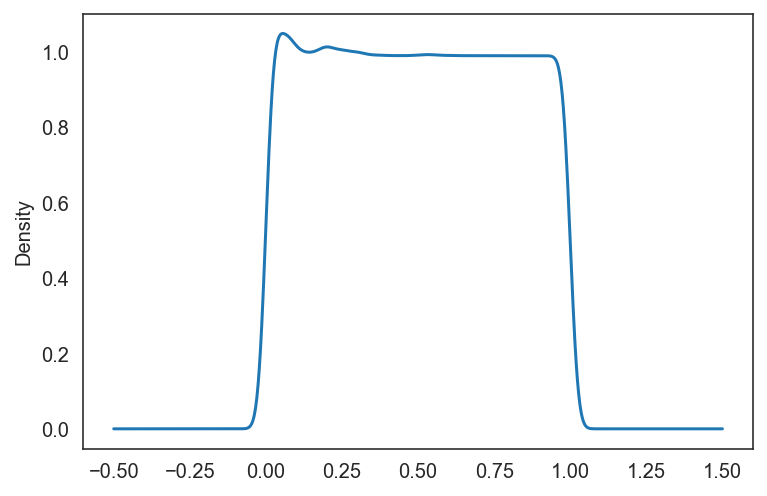

In [116]:
pred_proba_autoend_df.isFraud.plot(kind='kde')

In [113]:
pred_proba_autoend_df = pred_proba_autoend_df.drop(columns= ['MSE'])
pred_proba_autoend_df

TransactionID   isFraud
0             3663549  0.444073
1             3663550  0.169107
2             3663551  0.421505
3             3663552  0.489239
4             3663553  0.507328
...               ...       ...
506686        4170235  0.142918
506687        4170236  0.529799
506688        4170237  0.006029
506689        4170238  0.014106
506690        4170239  0.697278

[506691 rows x 2 columns]

In [115]:
pred_proba_autoend_df.to_csv('fraud_autoend_11.csv',index=False)

# Conclusion
___________________________________________________________________________________________________________________________

1. Fraudulent transactions spend a little money but many times.
2. The transaction with product C, Discovery card, credit card, Microsoft email and use a mobile have more chance to be a fraudulent transactions.
3. The best model to predict probability of fraud or not fraud is Gradient Boosting.
4. Each company has the different criteria to detect fraud so, we can adjust the suitable threshold from the model’s prediction.
5. Transaction payment amount, Card1 , Card2, Card3, and Card5 are the important features for prediction fraudulent transaction.